<h1 align="center" style="margin-bottom: 20px;">Machine Learning 2024-25</h1>
<h3 align="center" style="margin-top: 20px; margin-bottom: 20px;">To Grant or Not to Grant: Deciding on Compensation Benefits</h3>
<h5 align="center" style="margin-top: 20px; margin-bottom: 0px;">Notebook 1: Exploration of dataset</h5>

### Group 38 - Members:
- Ana Marta Azinheira  - 20240496@novaims.unl.pt
- Braulio Damba - 20240007@novaims.unl.pt
- Catarina Ribeirinha - 20240507@novaims.unl.pt
- Marco Galão  - r20201545@novaims.unl.pt
- Rodrigo Sardinha - 20211627@novaims.unl.pt

# 1. Imports <a id="imports"></a>

## 1.1. Import the Libraries <a class="anchor" id="import_libraries"></a>

In [596]:
# General Libraries
import pandas as pd
import numpy as np
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization Settings
%config InlineBackend.figure_format = 'retina'
sns.set()

# Omit Warnings
import warnings
warnings.filterwarnings("ignore")

## 1.2. Import the Datasets <a class="anchor" id="import_datasets"></a>

In [598]:
df = pd.read_csv('../data/train_data.csv', sep=',')

In [600]:
df.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')

In [470]:
#importing the test dataset
df_test = pd.read_csv('../data/test_data.csv', sep=',')

In [471]:
df_test.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Number of Dependents'],
      dtype='object')

In [474]:
#importing the sample submission dataset
df_sample_submission = pd.read_csv('../data/sample_submission.csv', sep=',')

In [476]:
df_sample_submission.columns

Index(['Claim Identifier', 'Claim Injury Type'], dtype='object')

In [478]:
df[["Agreement Reached", "WCB Decision", "Claim Injury Type"]].head()

Agreement Reached      WCB Decision Claim Injury Type
0                0.0  Not Work Related       2. NON-COMP
1                1.0  Not Work Related      4. TEMPORARY
2                0.0  Not Work Related      4. TEMPORARY
3                NaN               NaN               NaN
4                0.0  Not Work Related       2. NON-COMP

# 2. Exploration <a id="exploration"></a>

## 2.1. Exploration of the Dataset <a class="anchor" id="dataset_exploration"></a>

In [480]:
df.shape

(593471, 33)

In [482]:
#checking the data types of the variables of the training dataset and if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [484]:
#getting the main descriptive statistics only for the numerical variables

df.describe().round(2).T

count         mean           std  \
Age at Injury                       574026.0        42.11  1.426000e+01   
Average Weekly Wage                 545375.0       491.09  6.092920e+03   
Birth Year                          544948.0      1886.77  4.146400e+02   
Claim Identifier                    593471.0  23667598.79  1.079271e+08   
IME-4 Count                         132803.0         3.21  2.830000e+00   
Industry Code                       564068.0        58.65  1.964000e+01   
OIICS Nature of Injury Description       0.0          NaN           NaN   
WCIO Cause of Injury Code           558386.0        54.38  2.587000e+01   
WCIO Nature of Injury Code          558369.0        41.01  2.221000e+01   
WCIO Part Of Body Code              556944.0        39.74  2.237000e+01   
Agreement Reached                   574026.0         0.05  2.100000e-01   
Number of Dependents                574026.0         3.01  2.000000e+00   

                                          min        25%        50%  \
Age at Injury                             0.0       31.0       42.0   
Average Weekly Wage                       0.0        0.0        0.0   
Birth Year                                0.0     1965.0     1977.0   
Claim Identifier                    5393066.0  5593414.5  5791212.0   
IME-4 Count                               1.0        1.0        2.0   
Industry Code                            11.0       45.0       61.0   
OIICS Nature of Injury Description        NaN        NaN        NaN   
WCIO Cause of Injury Code                 1.0       31.0       56.0   
WCIO Nature of Injury Code                1.0       16.0       49.0   
WCIO Part Of Body Code                   -9.0       33.0       38.0   
Agreement Reached                         0.0        0.0        0.0   
Number of Dependents                      0.0        1.0        3.0   

                                          75%          max  
Age at Injury                            54.0        117.0  
Average Weekly Wage                     841.0    2828079.0  
Birth Year                             1989.0       2018.0  
Claim Identifier                    5991000.5  999891667.0  
IME-4 Count                               4.0         73.0  
Industry Code                            71.0         92.0  
OIICS Nature of Injury Description        NaN          NaN  
WCIO Cause of Injury Code                75.0         99.0  
WCIO Nature of Injury Code               52.0         91.0  
WCIO Part Of Body Code                   53.0         99.0  
Agreement Reached                         0.0          1.0  
Number of Dependents                      5.0          6.0

In [486]:
# getting the main descriptive statistics for the remaining cathegorical variables

df.describe(include = ['object']).T

count unique  \
Accident Date                      570337   5539   
Alternative Dispute Resolution     574026      3   
Assembly Date                      593471   1096   
Attorney/Representative            574026      2   
C-2 Date                           559466   2475   
C-3 Date                           187245   1648   
Carrier Name                       574026   2046   
Carrier Type                       574026      8   
Claim Injury Type                  574026      8   
County of Injury                   574026     63   
COVID-19 Indicator                 574026      2   
District Name                      574026      8   
First Hearing Date                 150798   1094   
Gender                             574026      4   
Industry Code Description          564068     20   
Medical Fee Region                 574026      5   
WCIO Cause of Injury Description   558386     74   
WCIO Nature of Injury Description  558369     56   
WCIO Part Of Body Description      556944     54   
Zip Code                           545389  10060   
WCB Decision                       574026      1   

                                                                 top    freq  
Accident Date                                             2020-03-01    1245  
Alternative Dispute Resolution                                     N  571412  
Assembly Date                                             2020-03-06    1422  
Attorney/Representative                                            N  392291  
C-2 Date                                                  2021-05-11    1847  
C-3 Date                                                  2021-04-21     350  
Carrier Name                                    STATE INSURANCE FUND  111144  
Carrier Type                                             1A. PRIVATE  285368  
Claim Injury Type                                        2. NON-COMP  291078  
County of Injury                                             SUFFOLK   60430  
COVID-19 Indicator                                                 N  546505  
District Name                                                    NYC  270779  
First Hearing Date                                        2022-04-15     440  
Gender                                                             M  335218  
Industry Code Description          HEALTH CARE AND SOCIAL ASSISTANCE  114339  
Medical Fee Region                                                IV  265981  
WCIO Cause of Injury Description                             LIFTING   46610  
WCIO Nature of Injury Description                     STRAIN OR TEAR  153373  
WCIO Part Of Body Description                        LOWER BACK AREA   51862  
Zip Code                                                       11236    3302  
WCB Decision                                        Not Work Related  574026

- As the OIICS Nature of Injury Description column is full of missing values, we decided not to explore this variable and will drop it in the preparation section.

## 2.2. Univariate Analysis <a id="univariate_analysis"></a>

### 2.2.2. Plotting for univariate analysis

In [488]:
def plot_distribution_and_boxplot(data, feature):
  
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Distribution and Boxplot of {feature}', fontsize=16)

    sns.histplot(data[feature], bins=30, kde=True, ax=axes[0])
    sns.dark_palette("#ADD8E6", reverse=True, as_cmap=True)
    axes[0].set_title(f'Distribution of {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Frequency')

    for line in axes[0].get_lines():  
        line.set_linewidth(2)  
        line.set_color("darkblue") 

    sns.boxplot(x=data[feature], ax=axes[1])
    sns.dark_palette("#69d", reverse=True, as_cmap=True)
    axes[1].set_title(f'Boxplot of {feature}')
    axes[1].set_xlabel(feature)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [490]:
def describe_features(data, feature): 
    stats = data[feature].describe().to_frame().T
    stats['missing'] = data[feature].isnull().sum()
    stats['missing%'] = (stats['missing'] / len(data)) * 100
    stats['zeros'] = (data[feature] == 0).sum()
    stats['zeros%'] = (stats['zeros'] / len(data)) * 100

    display(stats)

In [492]:
def plot_categorical_distribution(data, feature):
   
    original_value_counts = data[feature].value_counts()
    mode_value = original_value_counts.idxmax()
    mode_frequency = original_value_counts.max()
    missing_count = data[feature].isnull().sum()
    total_count = len(data)

    data_copy = data.copy()

    if len(original_value_counts) > 15:
        top_categories = original_value_counts.index[:15]

        data_copy[feature] = data_copy[feature].apply(lambda x: x if x in top_categories else 'Other')

        sorted_feature = data_copy[feature].value_counts().index
    else:
        sorted_feature = original_value_counts.index

    data_copy[feature] = pd.Categorical(data_copy[feature], categories=sorted_feature, ordered=True)

    plt.figure(figsize=(10, 6))
    plt.title(f'Distribution of {feature}', fontsize=16)

    blue_palette = ["#ADD8E6", "#87CEEB", "#6495ED", "#1E90FF", "#4169E1"]

    ax = sns.countplot(data=data_copy, x=feature, hue=feature, palette=blue_palette, edgecolor="black", order=sorted_feature, legend=False)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=90)

    total = len(data_copy[feature].dropna())
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        ax.annotate(percentage,
                    (p.get_x() + p.get_width() / 2., count),
                    ha = 'center', va = 'bottom',
                    fontsize=10,
                    color='black',
                    xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

    stats = pd.DataFrame({
        "Count": [total_count - missing_count],
        "Unique": [original_value_counts.nunique()],
        "Top (Mode)": [mode_value],
        "Frequency of Top": [mode_frequency],
        "Missing": [missing_count],
        "Missing %": [(missing_count / total_count) * 100],
    })

    display(stats)

In [494]:
def plot_timeseries(df, date_column):

    df_copy = df.copy()

    df_copy[date_column] = pd.to_datetime(df_copy[date_column], errors='coerce')

    plot_df = df_copy.dropna(subset=[date_column]).copy()

    plot_df['Year'] = plot_df[date_column].dt.year
    plot_df['Month'] = plot_df[date_column].dt.month

    plot_df['Year-Month'] = plot_df['Year'].astype(str) + '-' + plot_df['Month'].astype(str).str.zfill(2)
    counts_by_year_month = plot_df.groupby('Year-Month')['Year-Month'].count().reset_index(name='Count')

    counts_by_year_month['Year-Month'] = pd.to_datetime(counts_by_year_month['Year-Month'], format='%Y-%m')

    fig, ax = plt.subplots(figsize=(12, 8))  
    ax.plot(counts_by_year_month['Year-Month'], counts_by_year_month['Count'], color="skyblue", marker='o', markersize=3)
    ax.set_title(f'Time Series of {date_column} by Year and Month', fontsize=16)
    ax.set_xlabel('Year-Month', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

## Accident Date

**Observations on Accident Date**:

* Accident date is null when the claim starts being processed.
* 23134 missing values (3.9%). 
* Minimum is 1961-09-06: There can be recent claims related to very old accidents.
* Maximum is 2023-09-29: The data is inconsistent since the claims were treated from 2020 to 2022 which should not be related to an accident happening after that period.
* Most frequent value is 2020-03-01

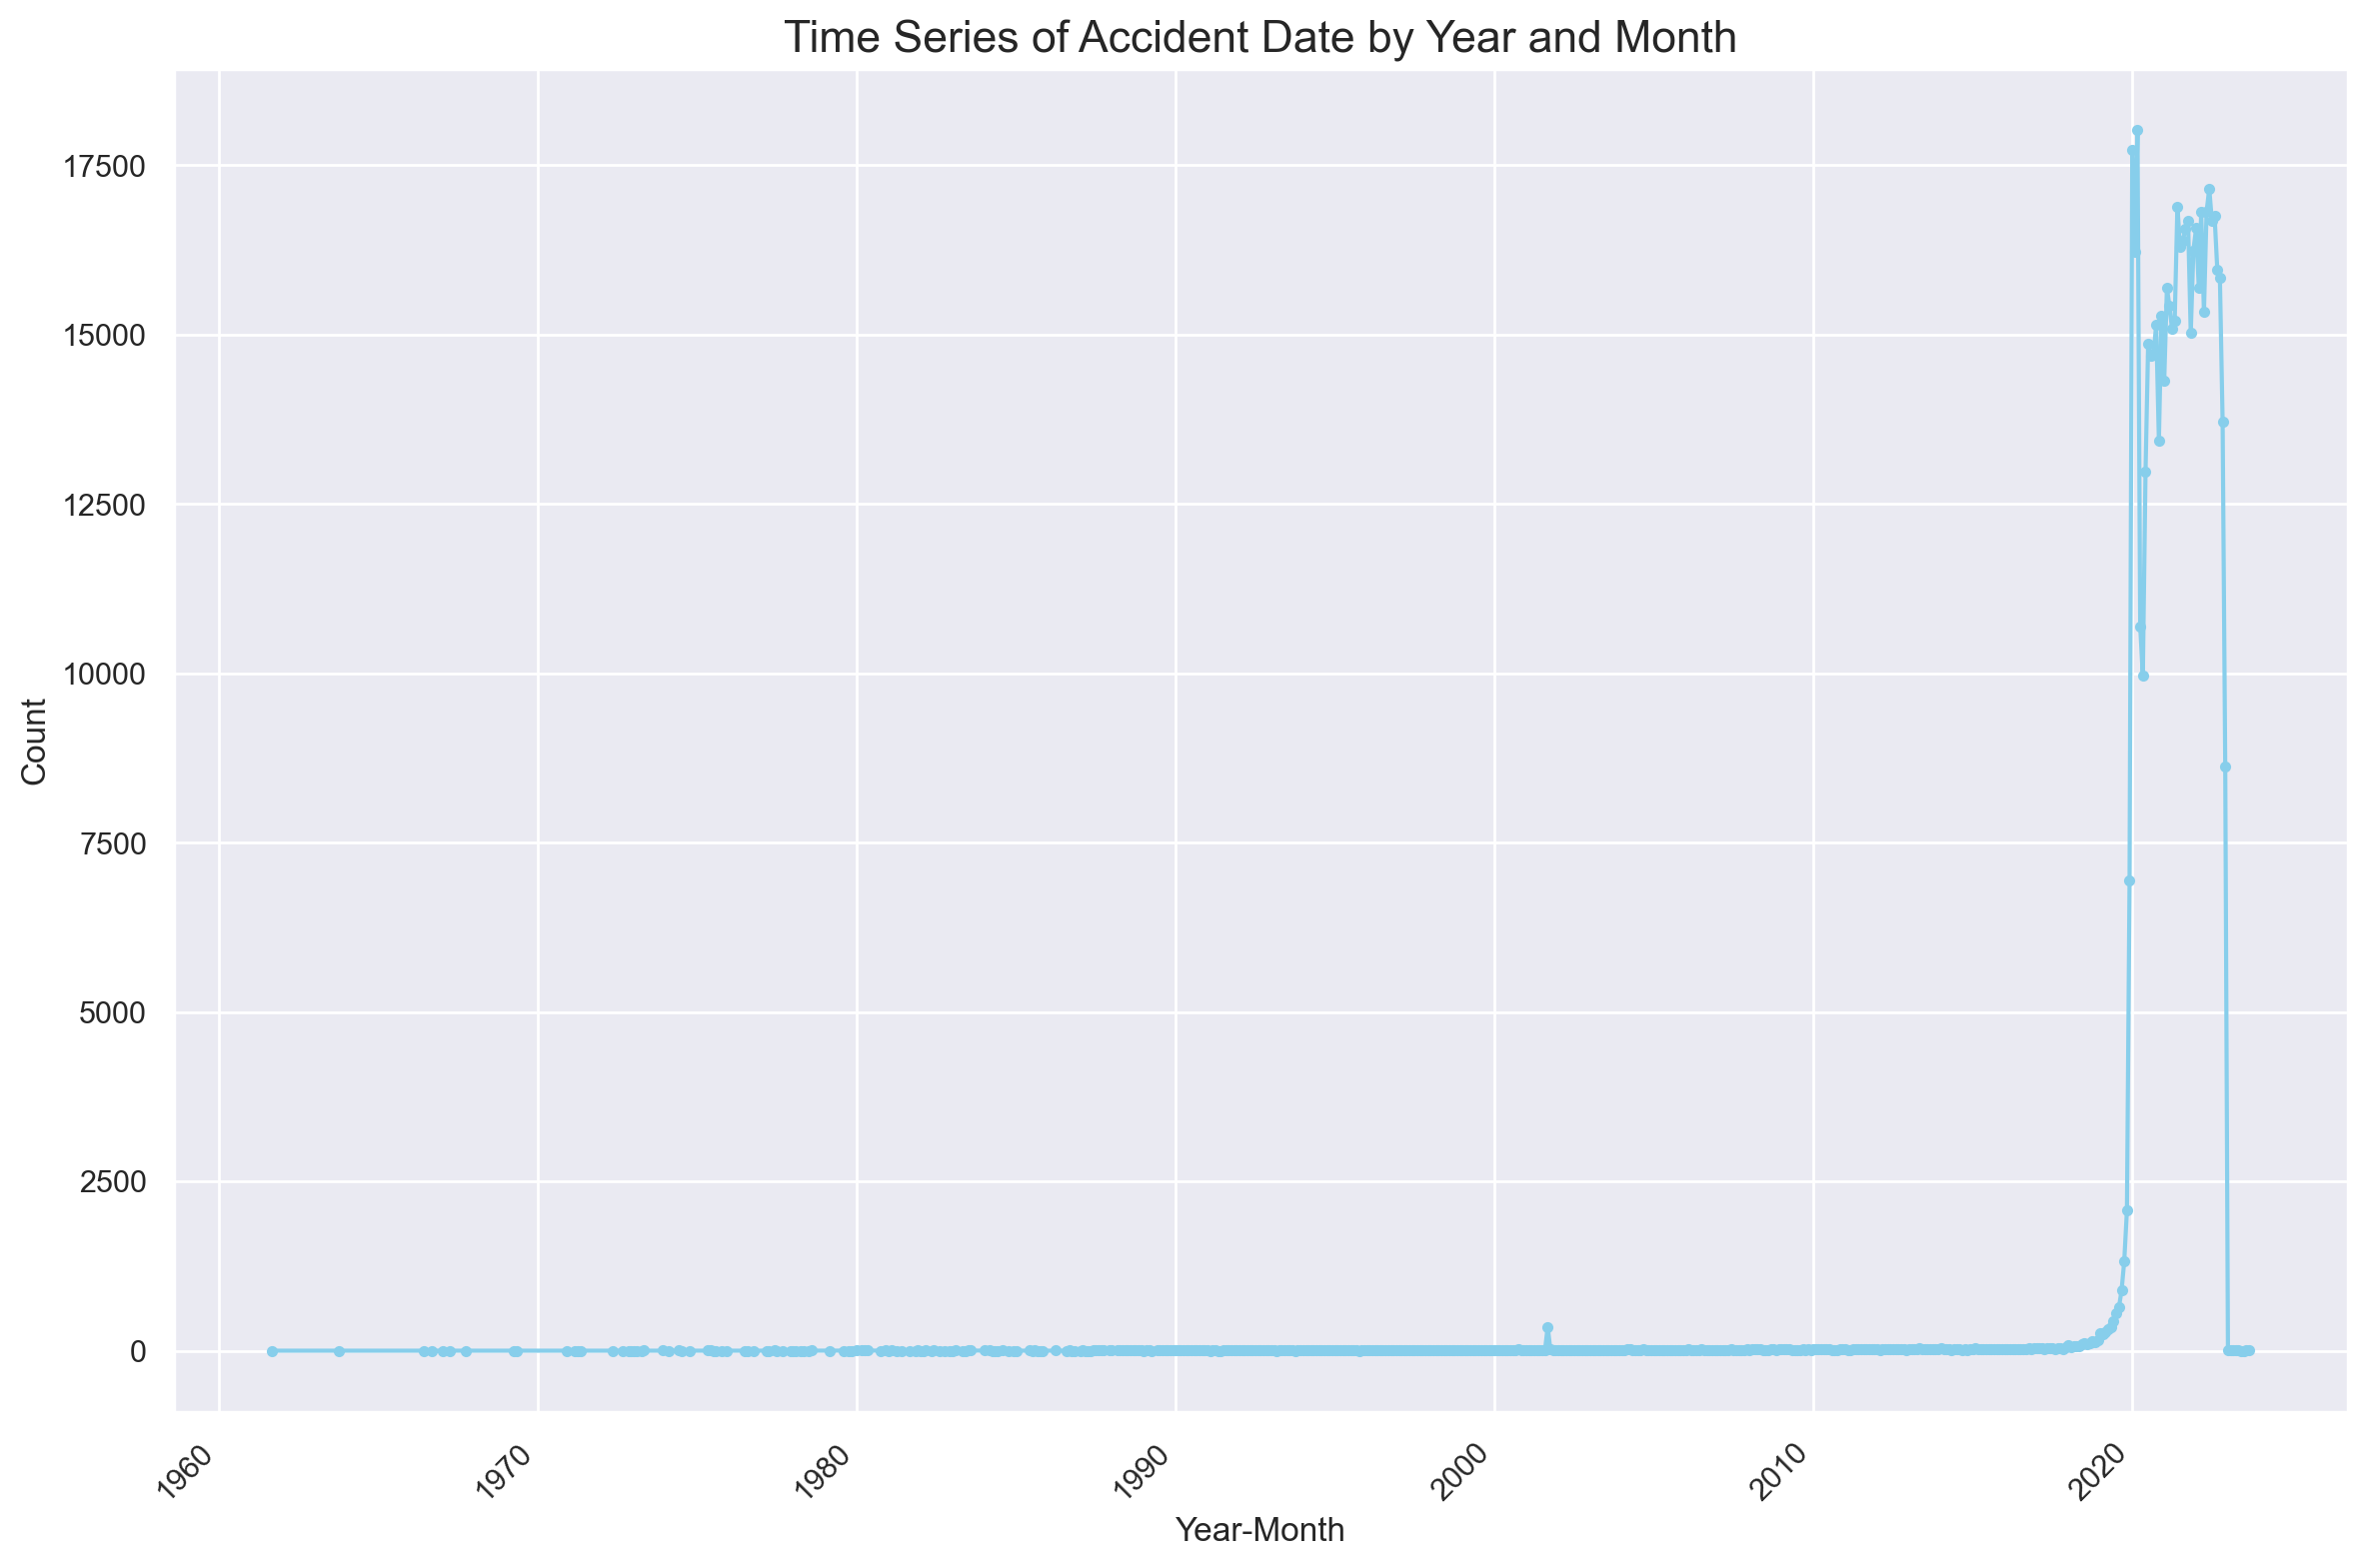

In [498]:
plot_timeseries(df, 'Accident Date')

In [500]:
describe_features(df, 'Accident Date')

count unique         top  freq  missing  missing%  zeros  \
Accident Date  570337   5539  2020-03-01  1245    23134  3.898084      0   

               zeros%  
Accident Date     0.0

## Age at Injury

**Observations on Age at Injury**:
* 19445 missing values (3.28%)
* Minimum is 0: there cannot be people with 0 years old working
* Maximum is 117: there cannot be people with that age still working
* We have big extremes values that will be handled in the pre-processing
* The mean is 42 years old
* Distribution more or less follows a normal distribution

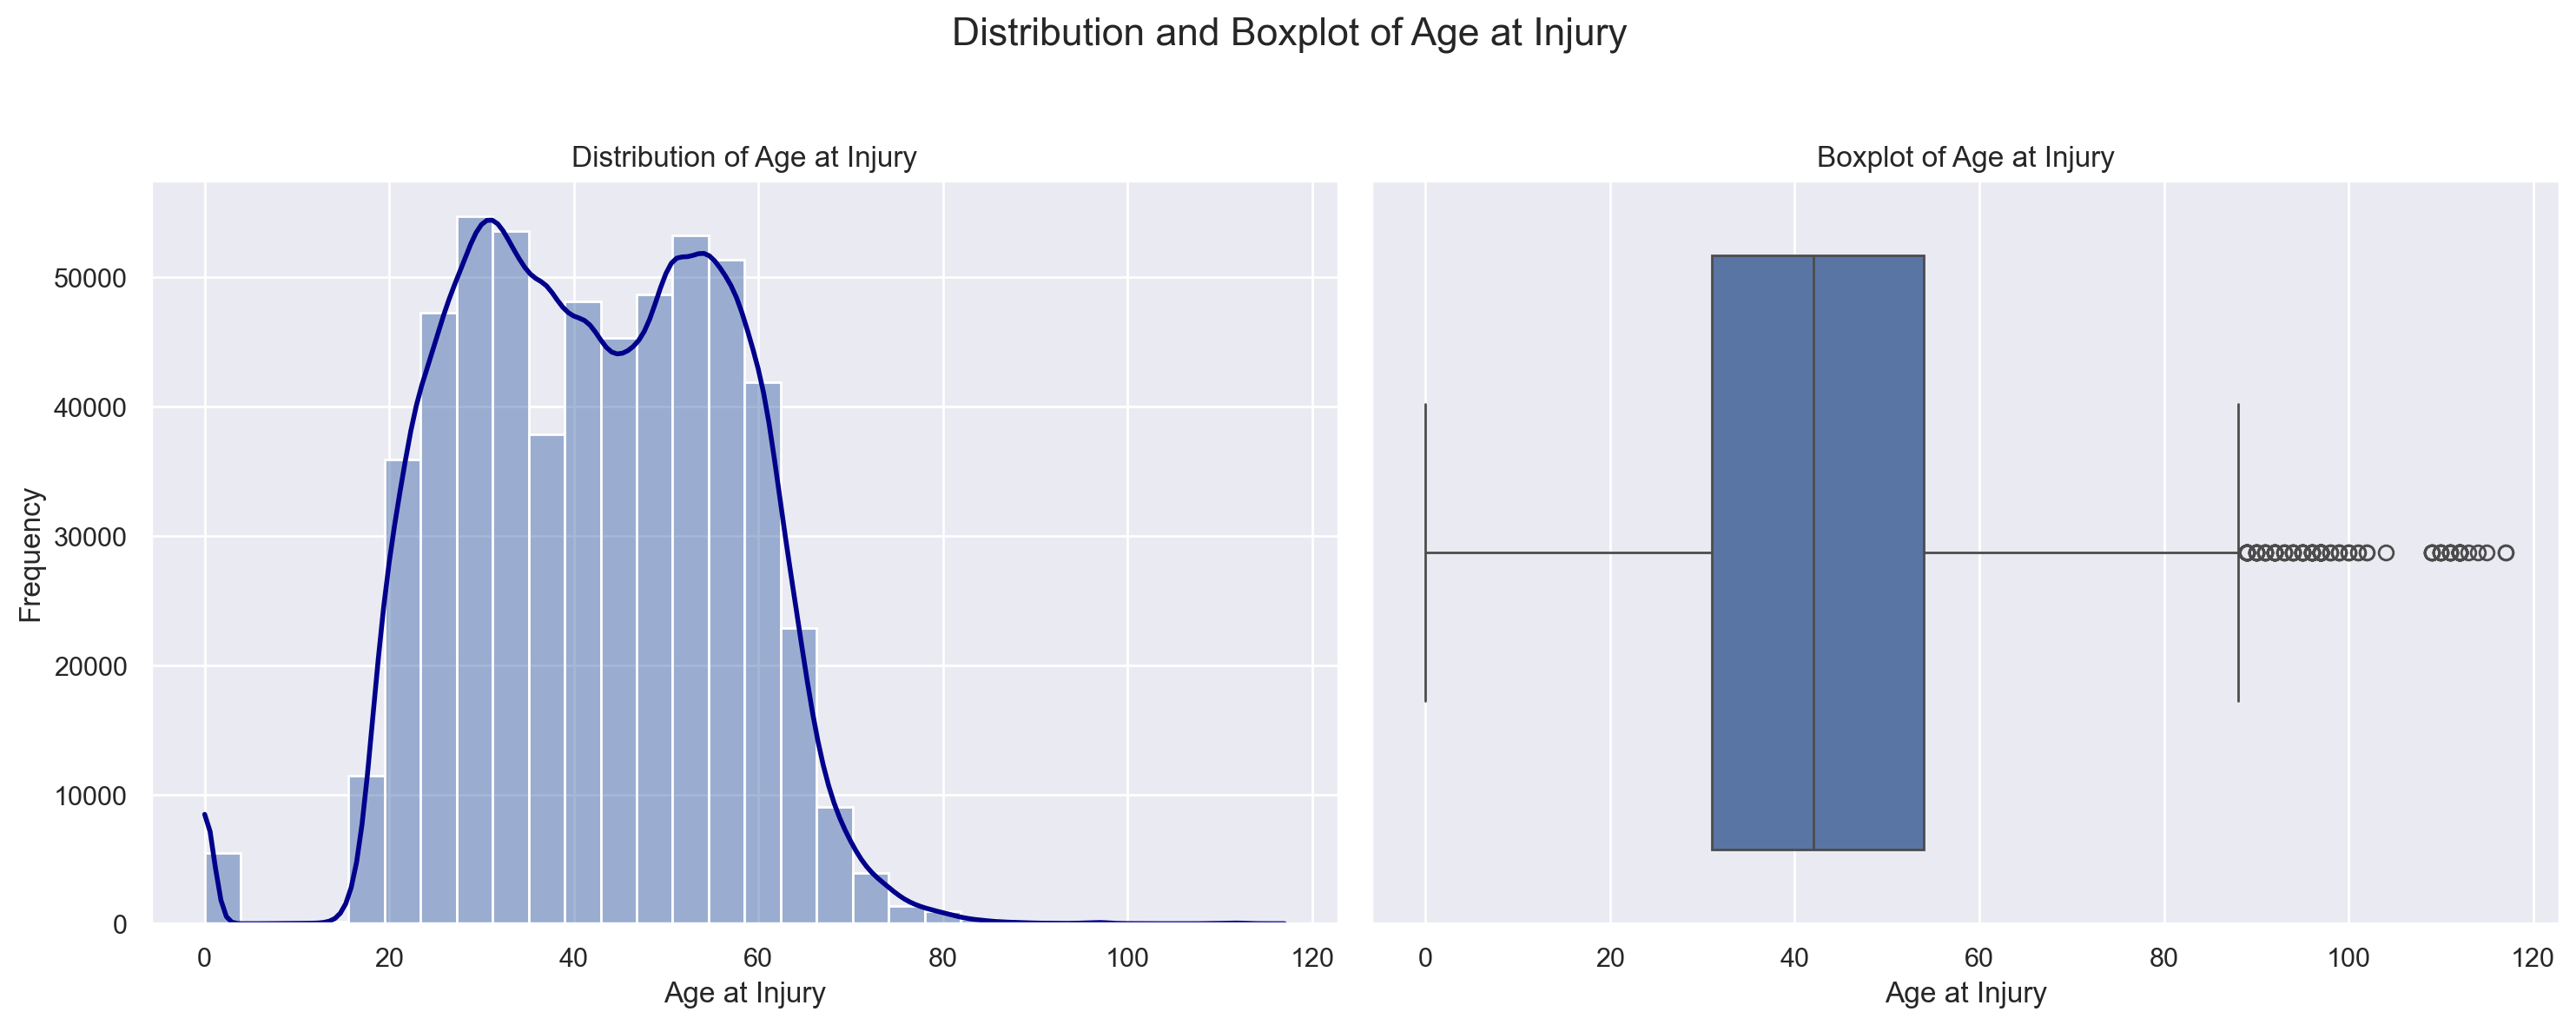

In [502]:
plot_distribution_and_boxplot(df, 'Age at Injury')

In [503]:
describe_features(df, 'Age at Injury')

count      mean        std  min   25%   50%   75%    max  \
Age at Injury  574026.0  42.11427  14.256432  0.0  31.0  42.0  54.0  117.0   

               missing  missing%  zeros    zeros%  
Age at Injury    19445  3.276487   5464  0.920685

## Alternative Dispute Resolution

**Observations on Alternative Dispute Resolution**:
* Only with 3 unique values: Y, N and U
* Imbalanced: 99.5% are 0 (N) and 0.5% values are 1 (Y). None value are U (Unknown).
* 19445 missing values (3.28%)

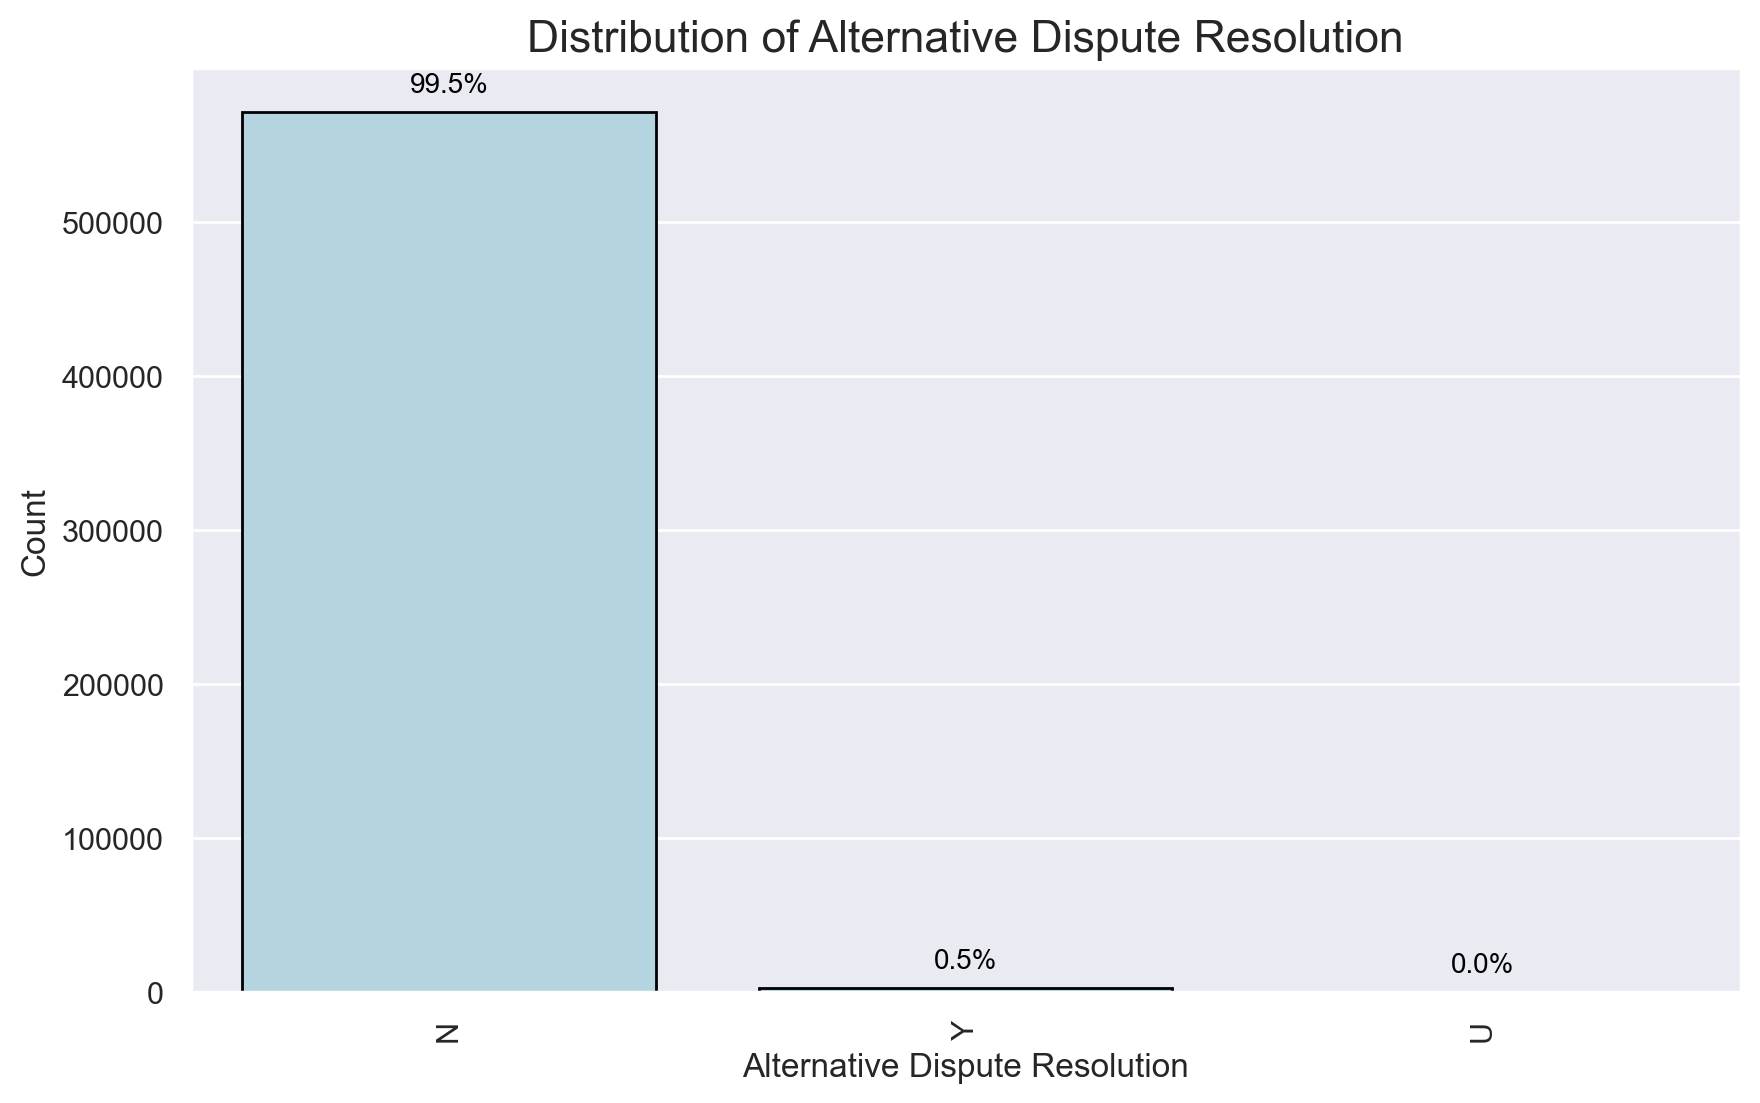

Count  Unique Top (Mode)  Frequency of Top  Missing  Missing %
0  574026       3          N            571412    19445   3.276487

In [506]:
plot_categorical_distribution(df, 'Alternative Dispute Resolution')

## **Assembly Date**

**Observations on Assembly Date**:
* No missing values - every accident is associated with a corresponding assembly date
* No zeros
* Minimum Date: 2020-01-01
* Maximum Date: 2022-12-31
* Most Frequent date:  2020-03-06

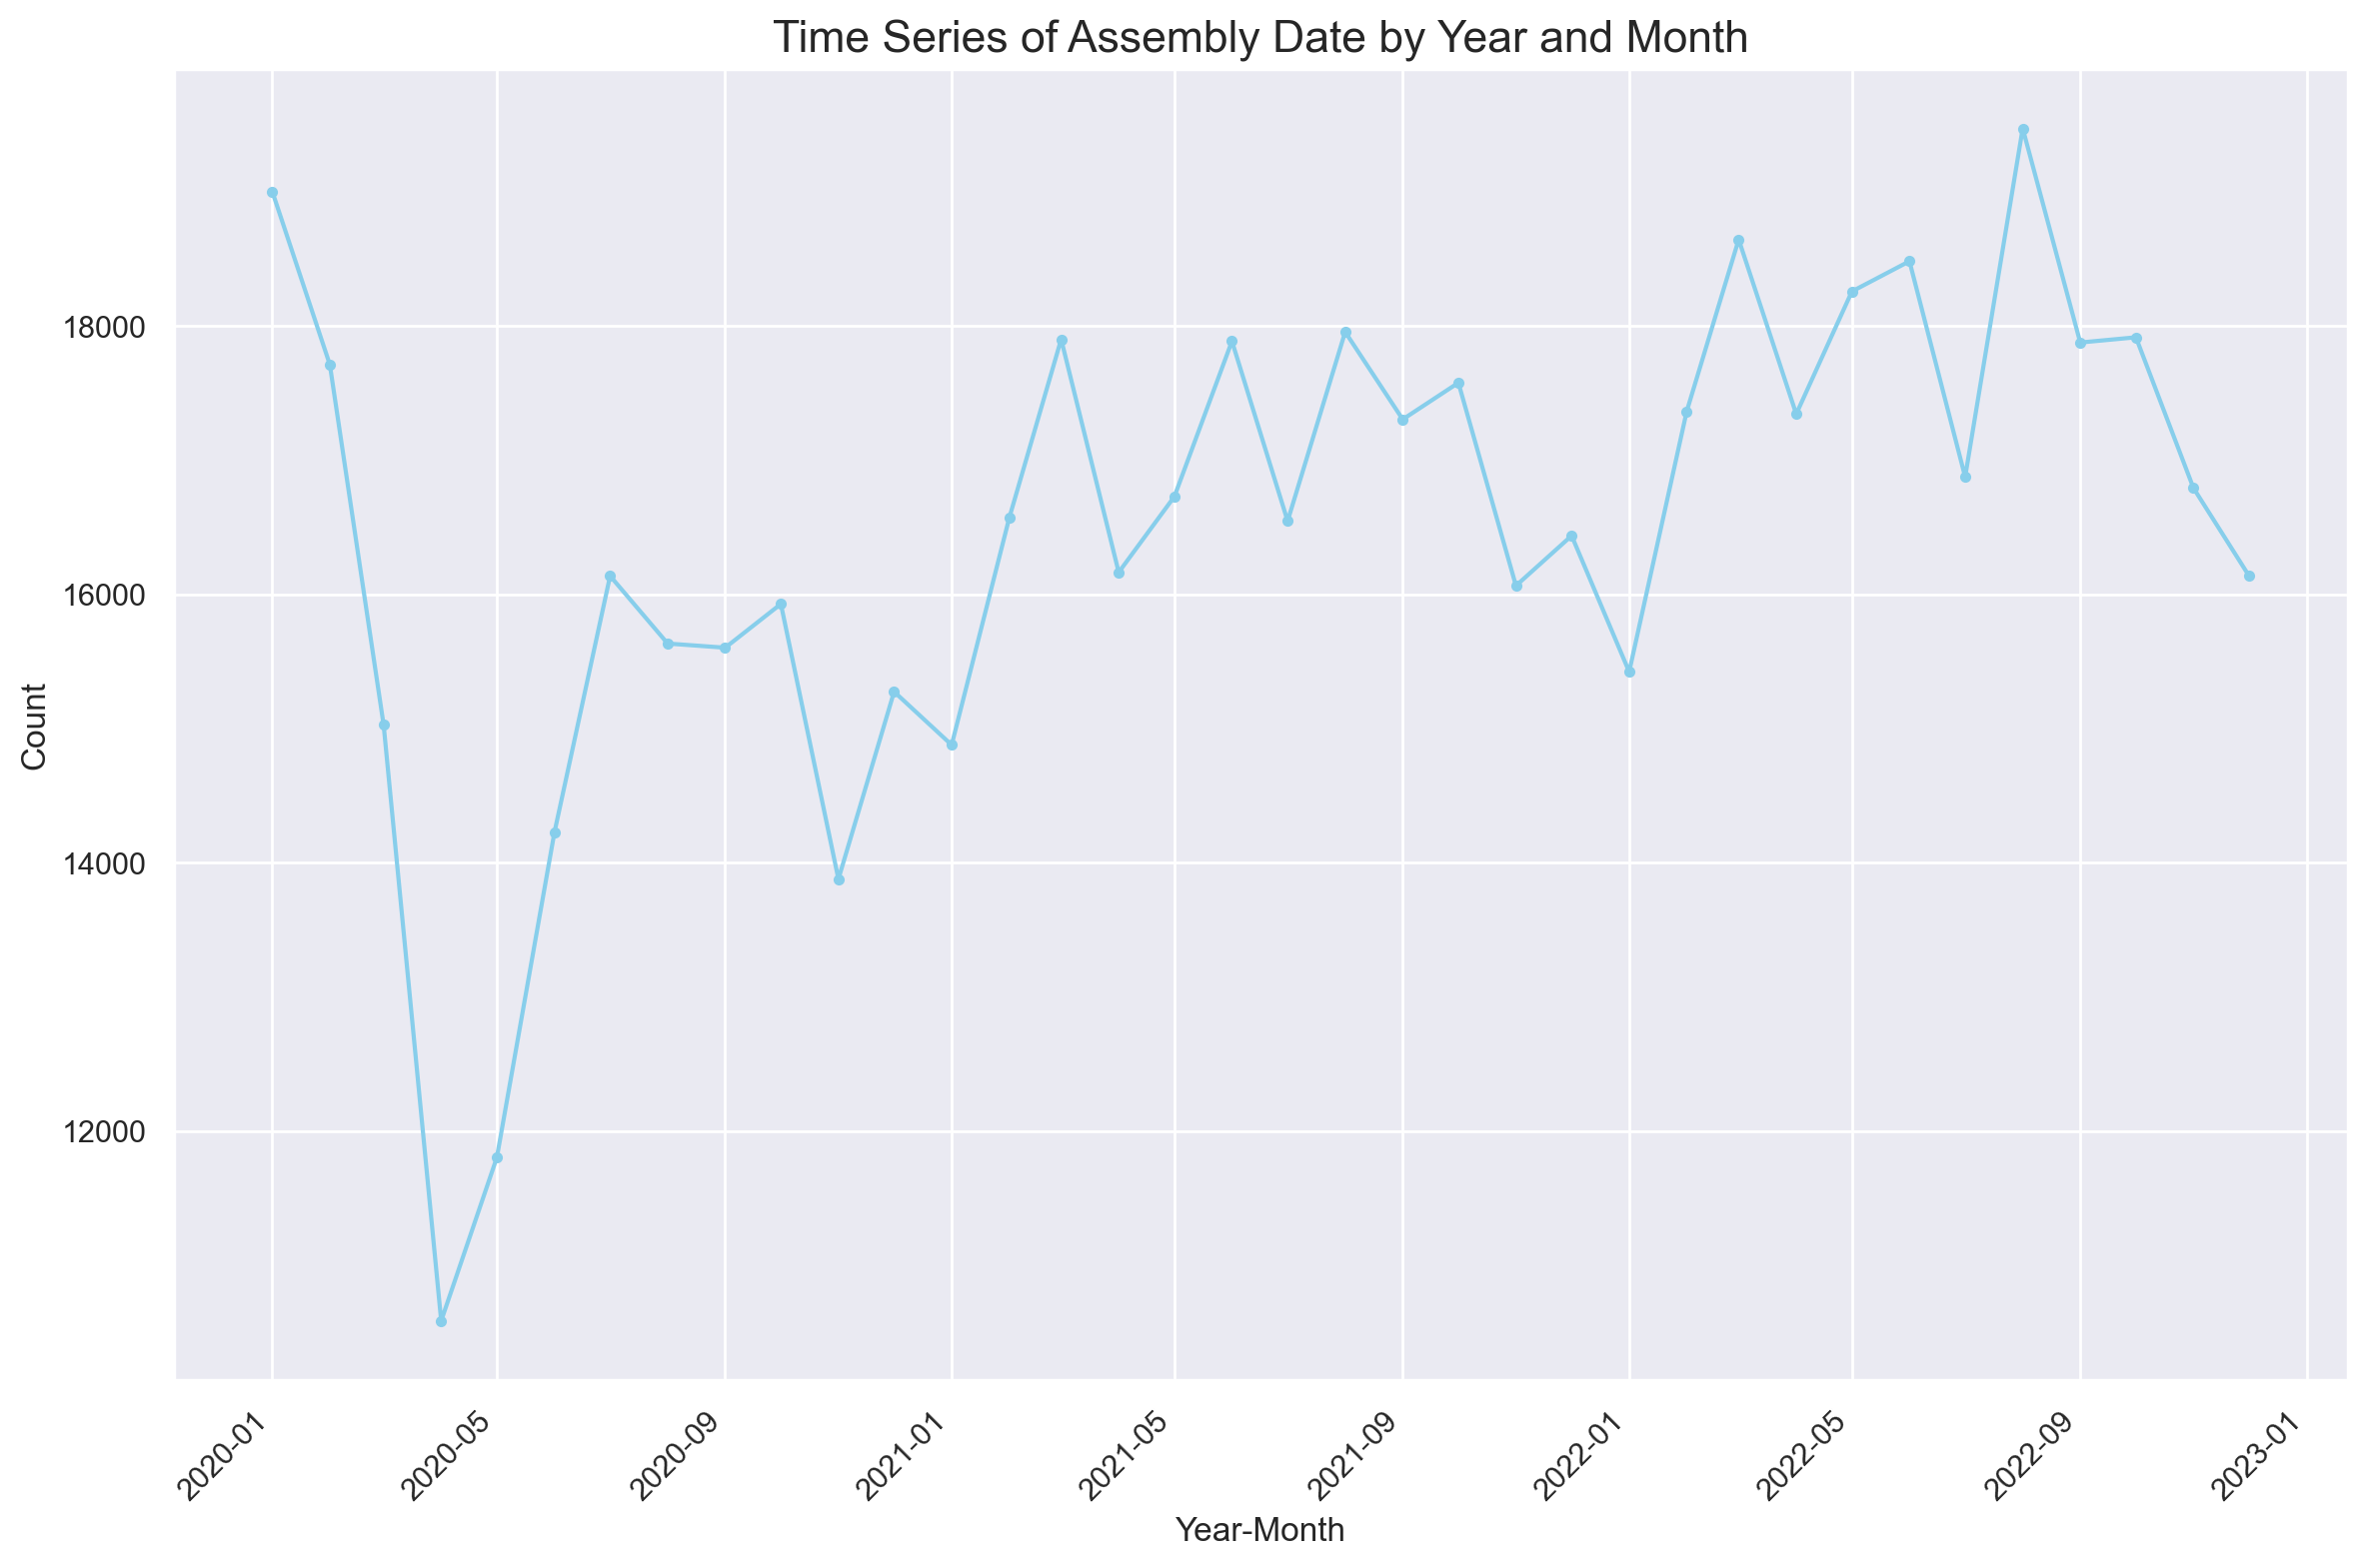

In [510]:
plot_timeseries(df, 'Assembly Date')

In [512]:
describe_features(df, 'Assembly Date')

count unique         top  freq  missing  missing%  zeros  \
Assembly Date  593471   1096  2020-03-06  1422        0       0.0      0   

               zeros%  
Assembly Date     0.0

## **Attorney/Representative**

**Observations on Attorney/Representative:**
* 19445 missing values (3,28%)
* 2 unique Attorney/Representative
* Most Frequent: N (0)

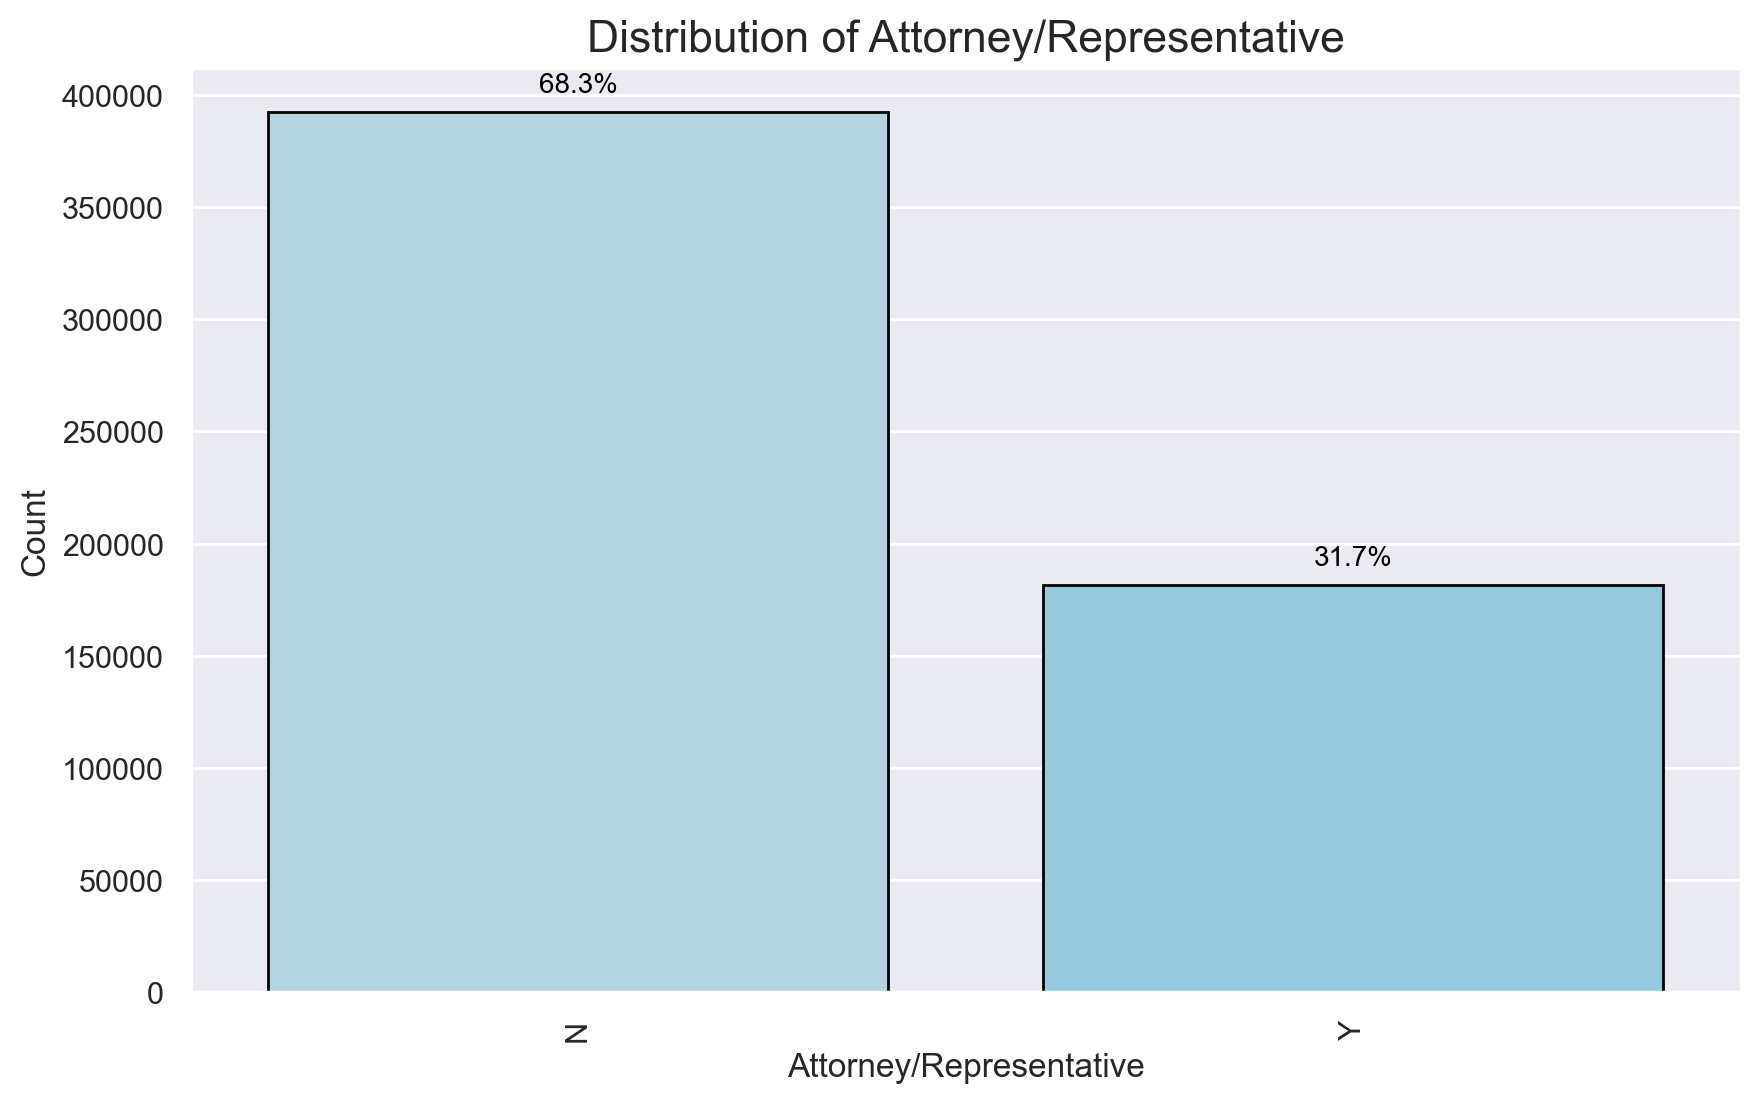

Count  Unique Top (Mode)  Frequency of Top  Missing  Missing %
0  574026       2          N            392291    19445   3.276487

In [514]:
plot_categorical_distribution(df, 'Attorney/Representative')

## **Average Weekly Wage**

**Observations on Average Weekly Wage:**
* 48096 missing values (8,10%)
* 335450 zeros (56.52%)
* Minimum: 0 - following the description, these values seem correct: an individual could be a volunteer, may not have worked during the period or had a wage of zero for other reasons (e.g., leave of absence or unemployment)
* Maximum: 2828079 - there is a huge gap between others
* Mean: 491 - even though there are people with zeros, we can notice others with a very high average

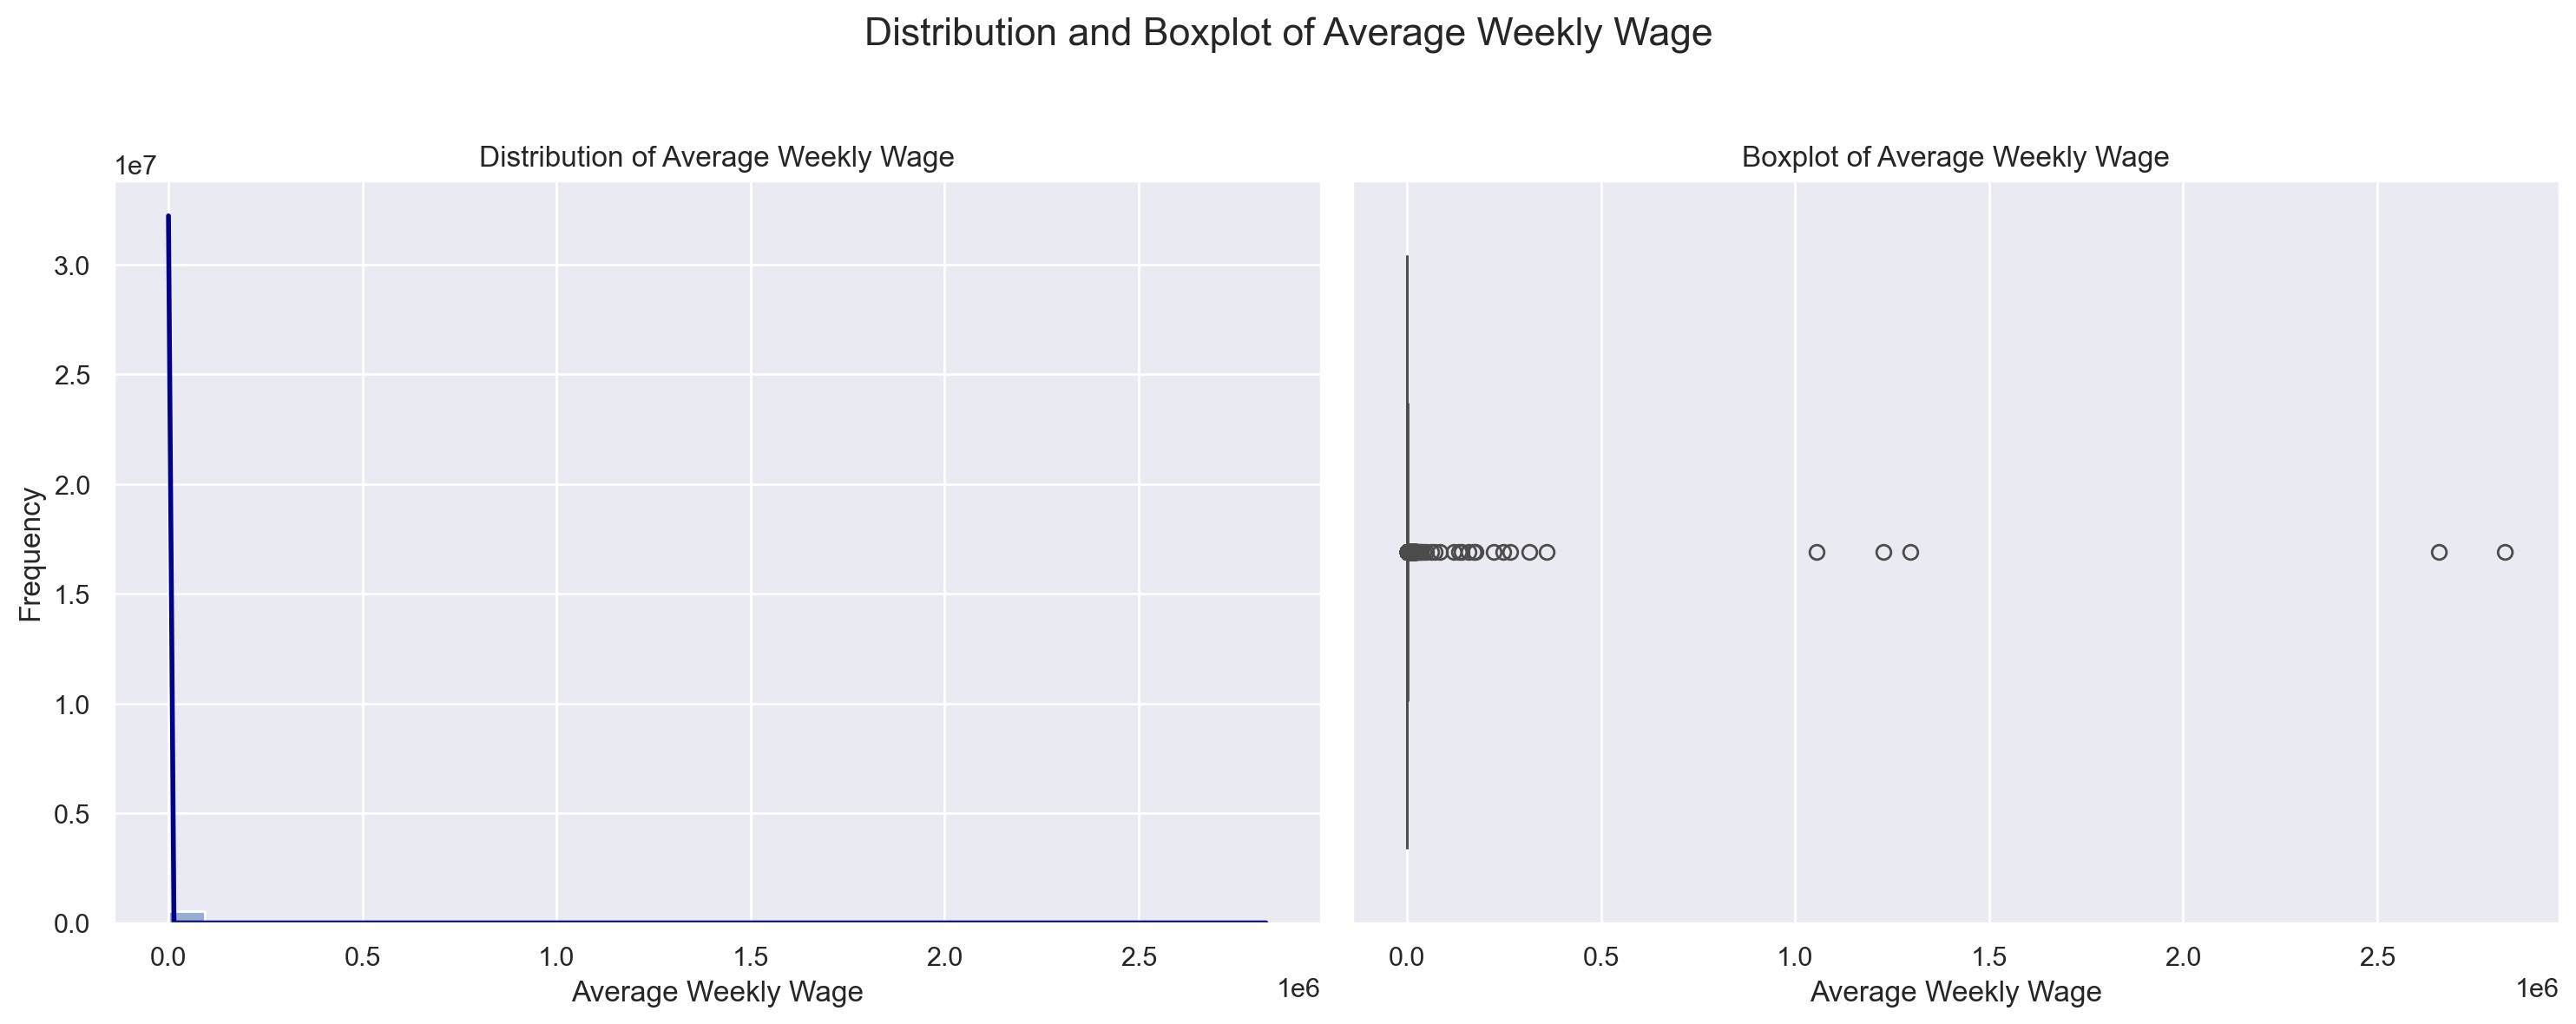

In [516]:
plot_distribution_and_boxplot(df, 'Average Weekly Wage')

In [518]:
describe_features(df, 'Average Weekly Wage')

count        mean         std  min  25%  50%    75%  \
Average Weekly Wage  545375.0  491.088321  6092.91812  0.0  0.0  0.0  841.0   

                           max  missing  missing%   zeros     zeros%  
Average Weekly Wage  2828079.0    48096  8.104187  335450  56.523402

## **Birth Year**

**Observations on Birth Year:**
* 48523 missing values (8,18%)
* 25081 zeros (4.22%)
* Minimum: 0 - it makes no sense that someone was born this year, and there are 25,081 values like this
* Maximum: 2018 - if we consider that the values are only up to 2022, this doesn’t make sense
* Mean: 1887 - this year doesn't make sense, but we can assume this is because we have extreme values (boxplot)

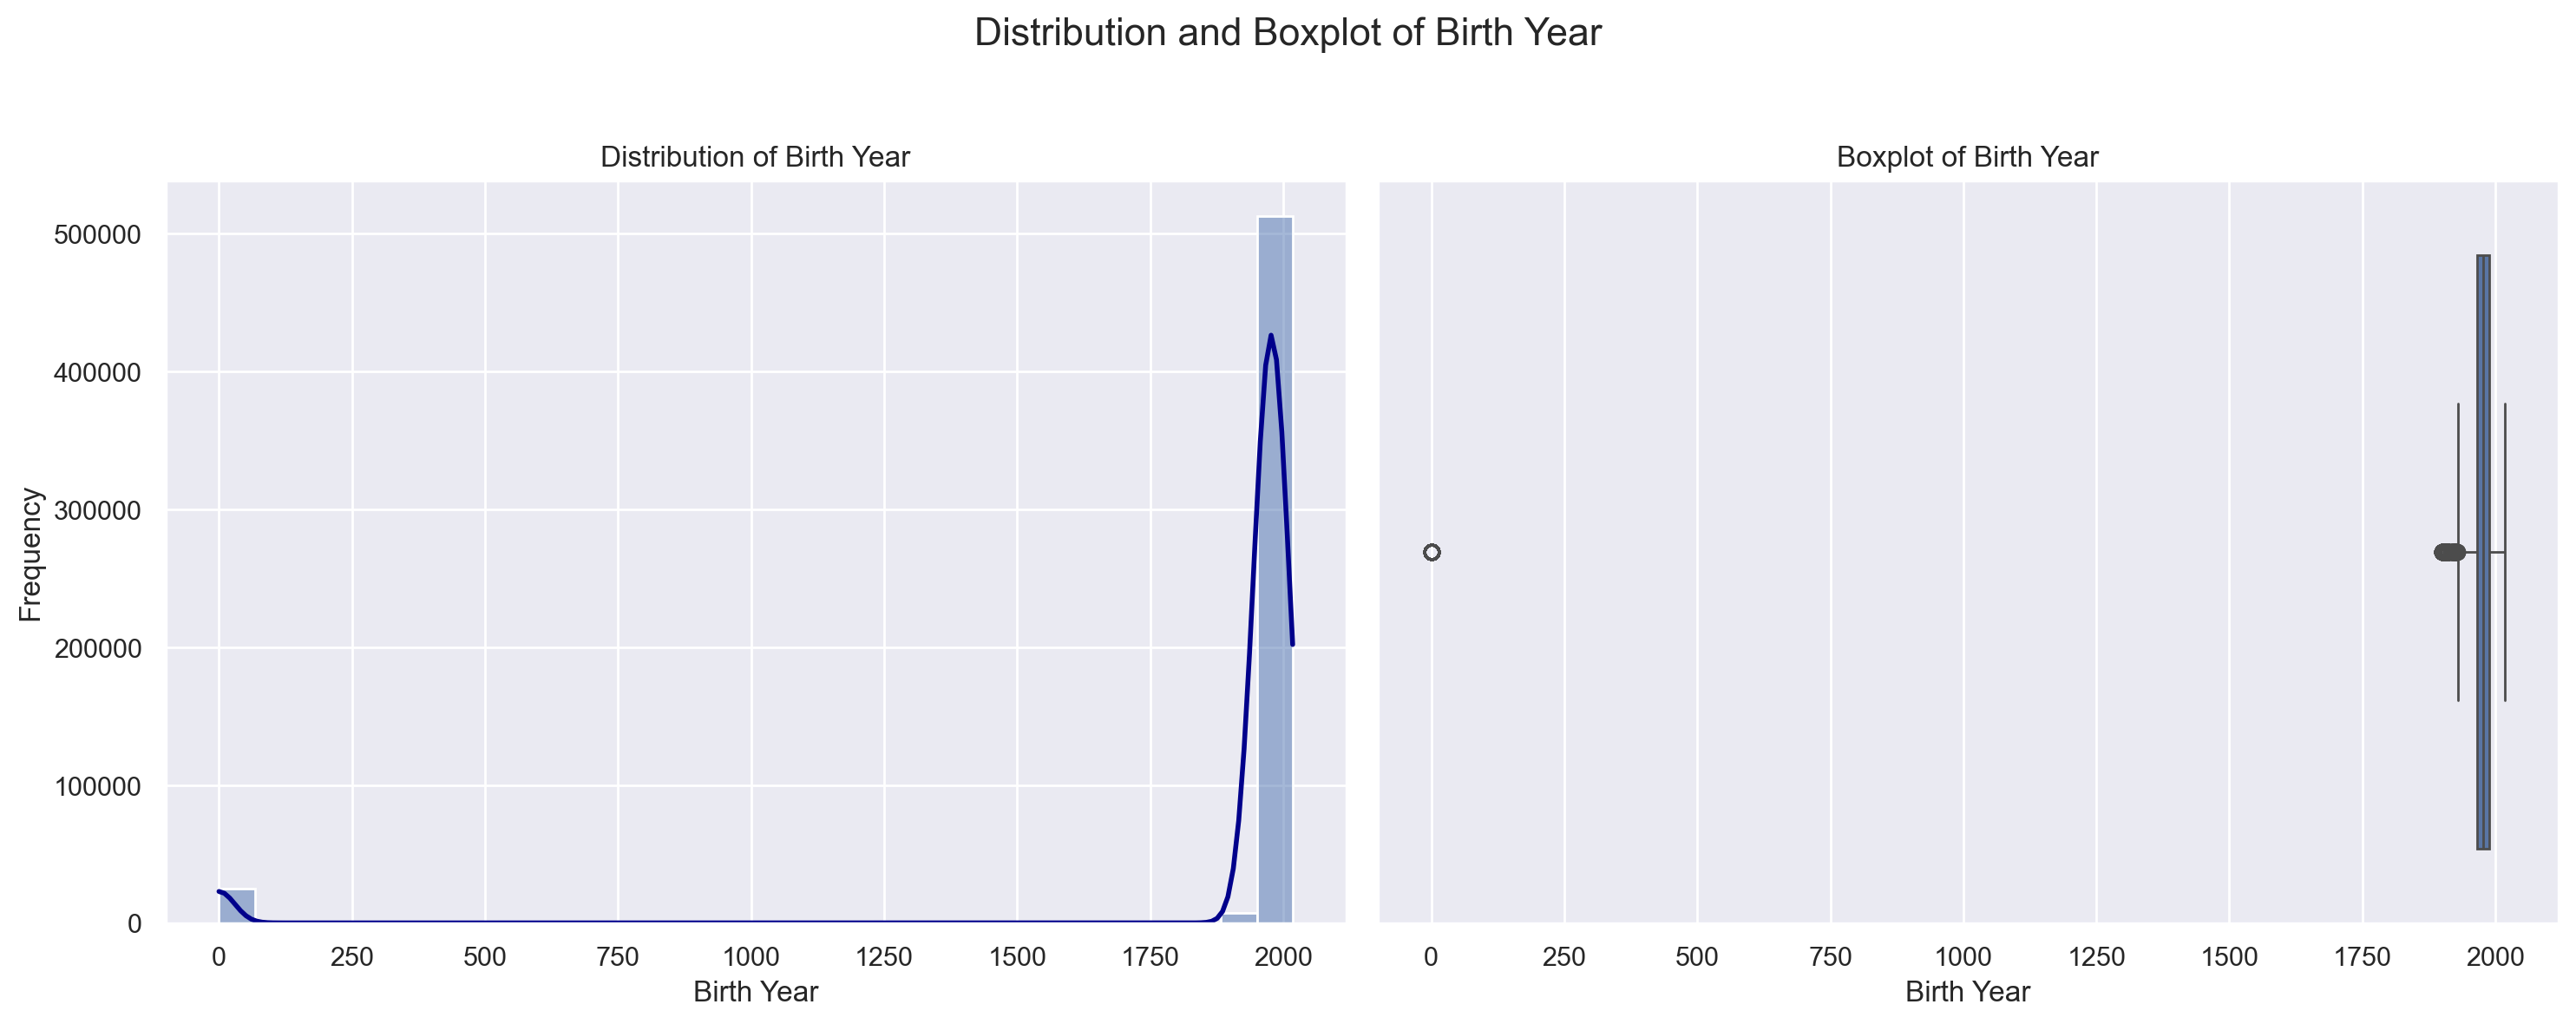

In [520]:
plot_distribution_and_boxplot(df, 'Birth Year')

In [522]:
describe_features(df,'Birth Year')

count         mean         std  min     25%     50%     75%  \
Birth Year  544948.0  1886.767604  414.644423  0.0  1965.0  1977.0  1989.0   

               max  missing  missing%  zeros    zeros%  
Birth Year  2018.0    48523  8.176137  25081  4.226154

## **C-2 Date**

**Observations on C-2 Date:**
* 34005 missing values (5,73%)
* No zeros
* Minimum Date: 1996-01-12, in line with the Accident Dates, it always happens afterwards
* Maximum Date: 2024-06-01
* Most frequent date: 2021-05-11

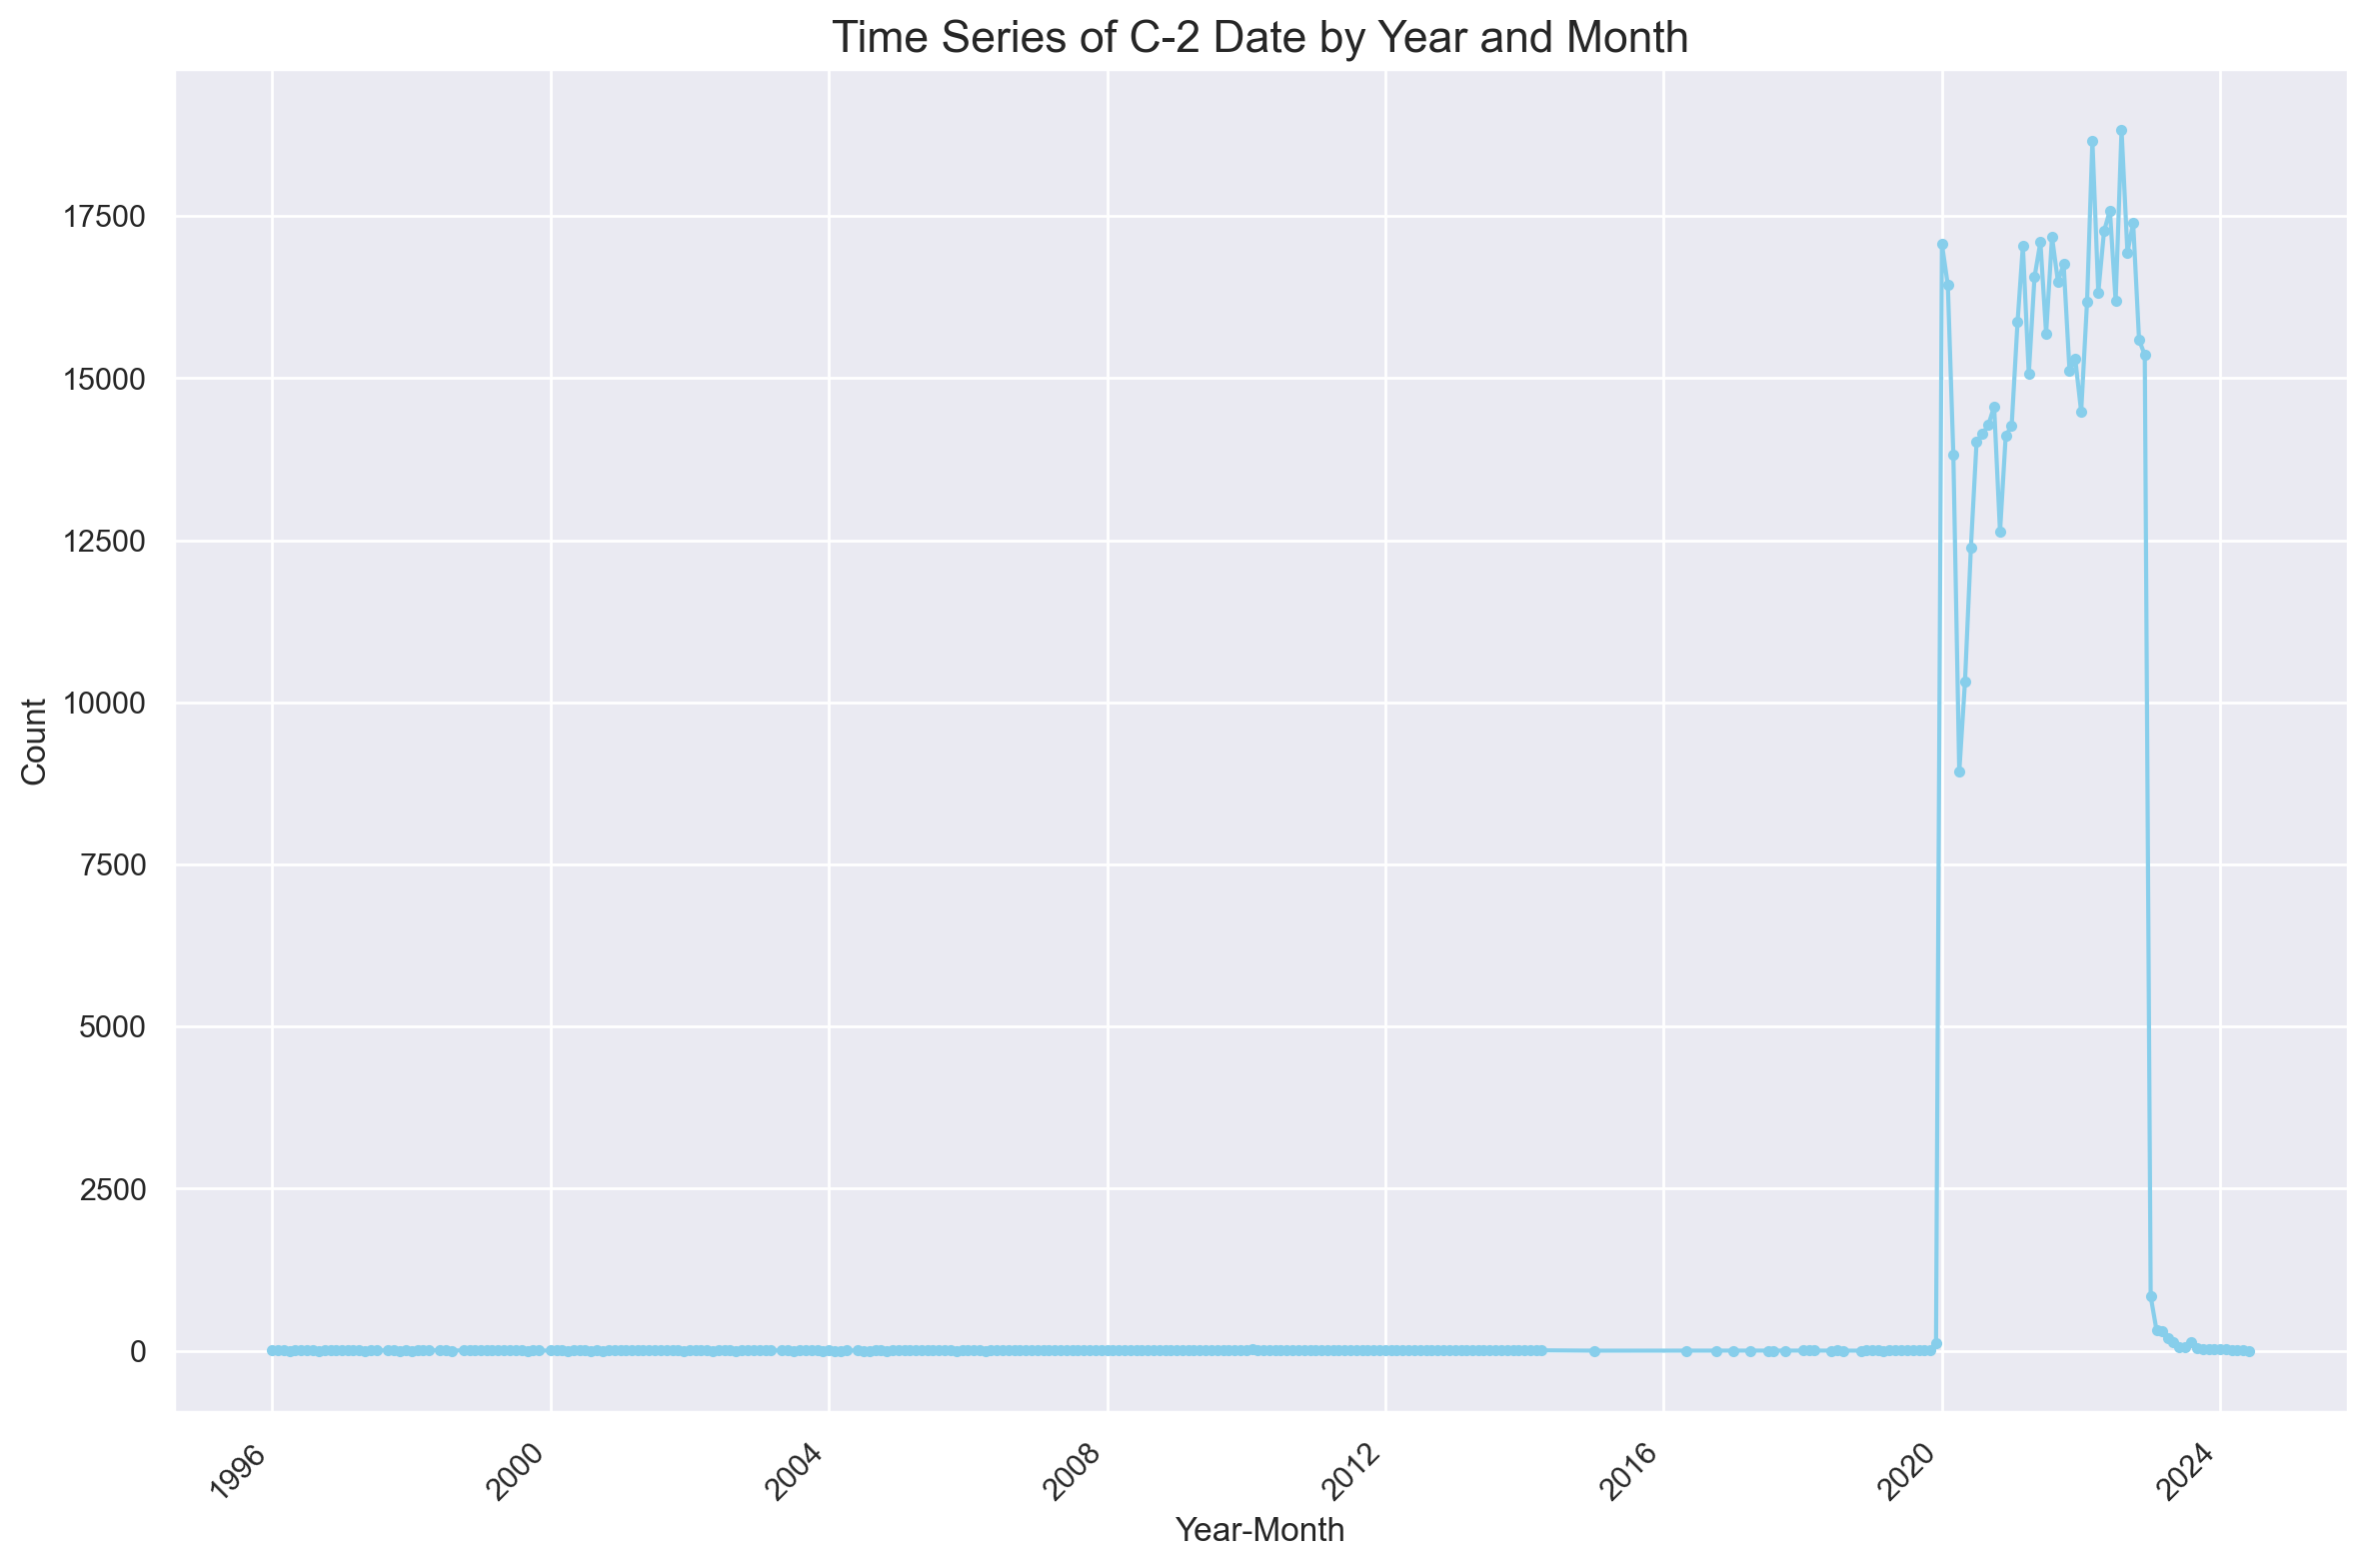

In [526]:
plot_timeseries(df, 'C-2 Date')

In [528]:
describe_features(df, 'C-2 Date')

count unique         top  freq  missing  missing%  zeros  zeros%
C-2 Date  559466   2475  2021-05-11  1847    34005   5.72985      0     0.0

## **C-3 Date**

**Observations on C-3 Date:**
* 406226 missing values (68,45%)
* Minimum Date: 1992-11-13
* Maximum Date: 2024-05-31

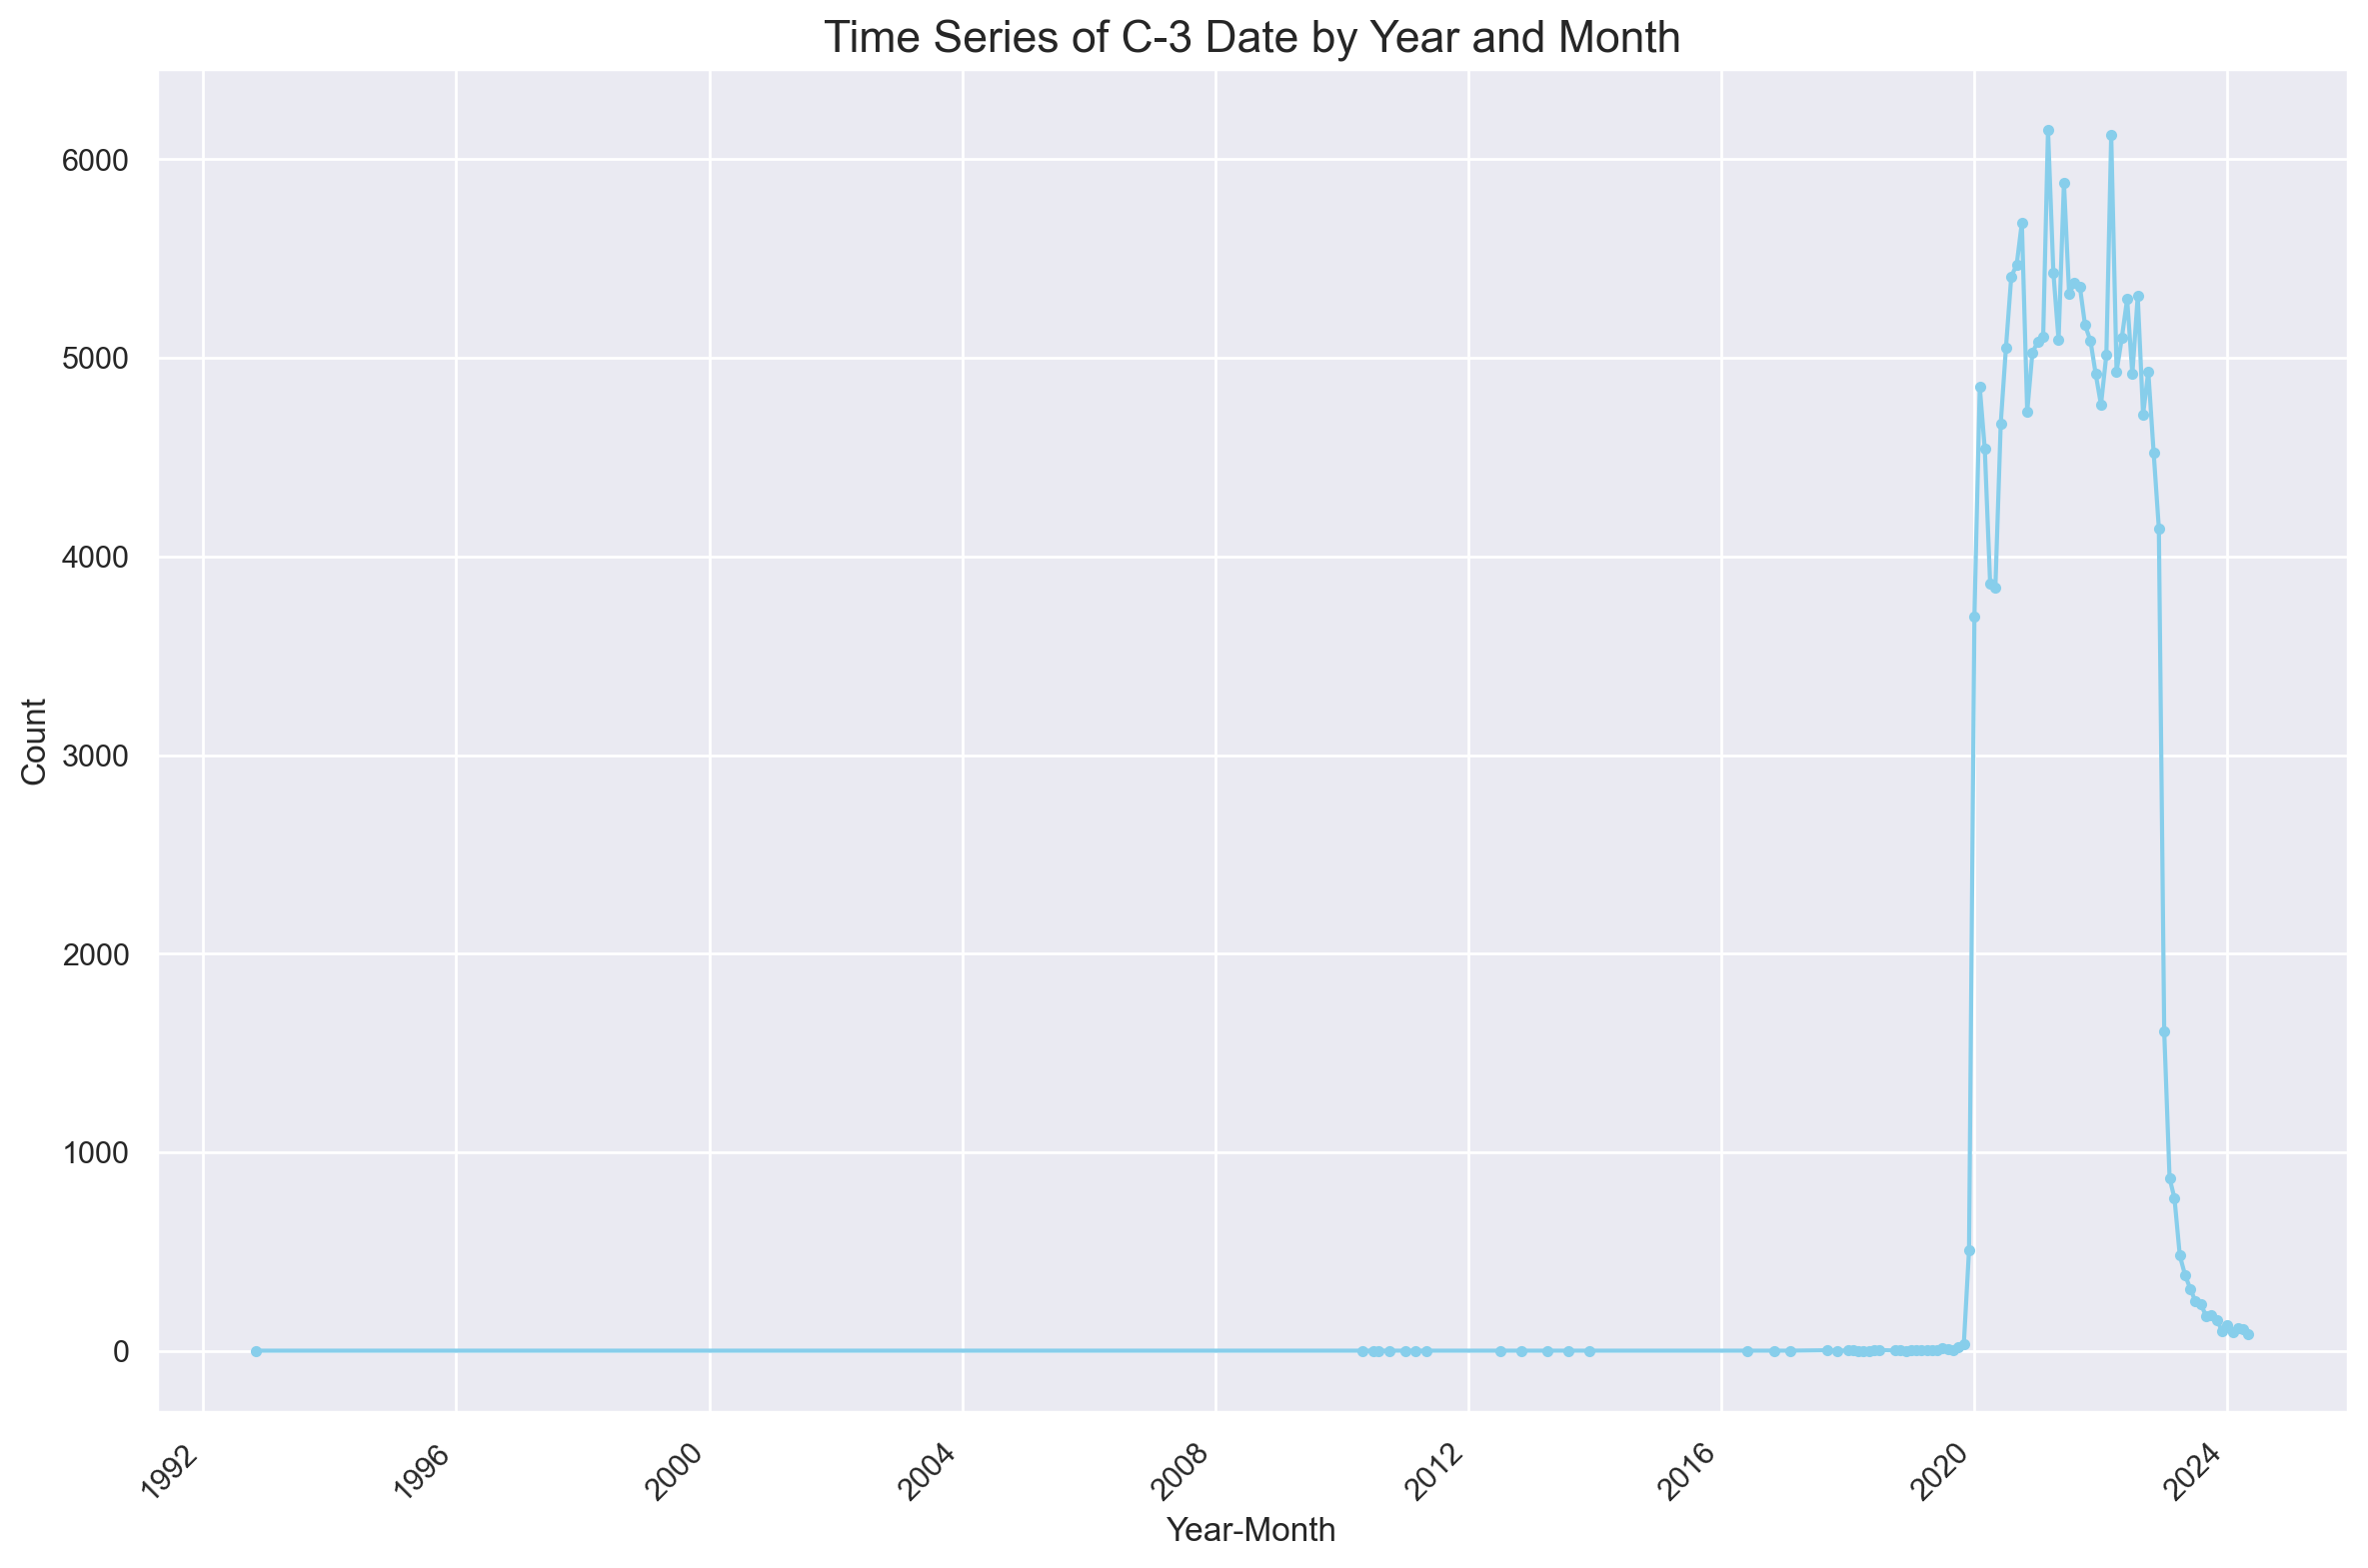

In [532]:
plot_timeseries(df, 'C-3 Date')

In [534]:
describe_features(df, 'C-3 Date')

count unique         top freq  missing   missing%  zeros  zeros%
C-3 Date  187245   1648  2021-04-21  350   406226  68.449174      0     0.0

## **Carrier Name**

**Observations on Carrier Name**:
* 19445 missing values (3,28%)
* 429 unique Carrier Names
* Most frequent: STATE INSURANCE FUND
* Highest frequency: Other
* Lowest frequency: AIU INSURANCE CO and ARCH INDEMNITY INSURANCE CO. 

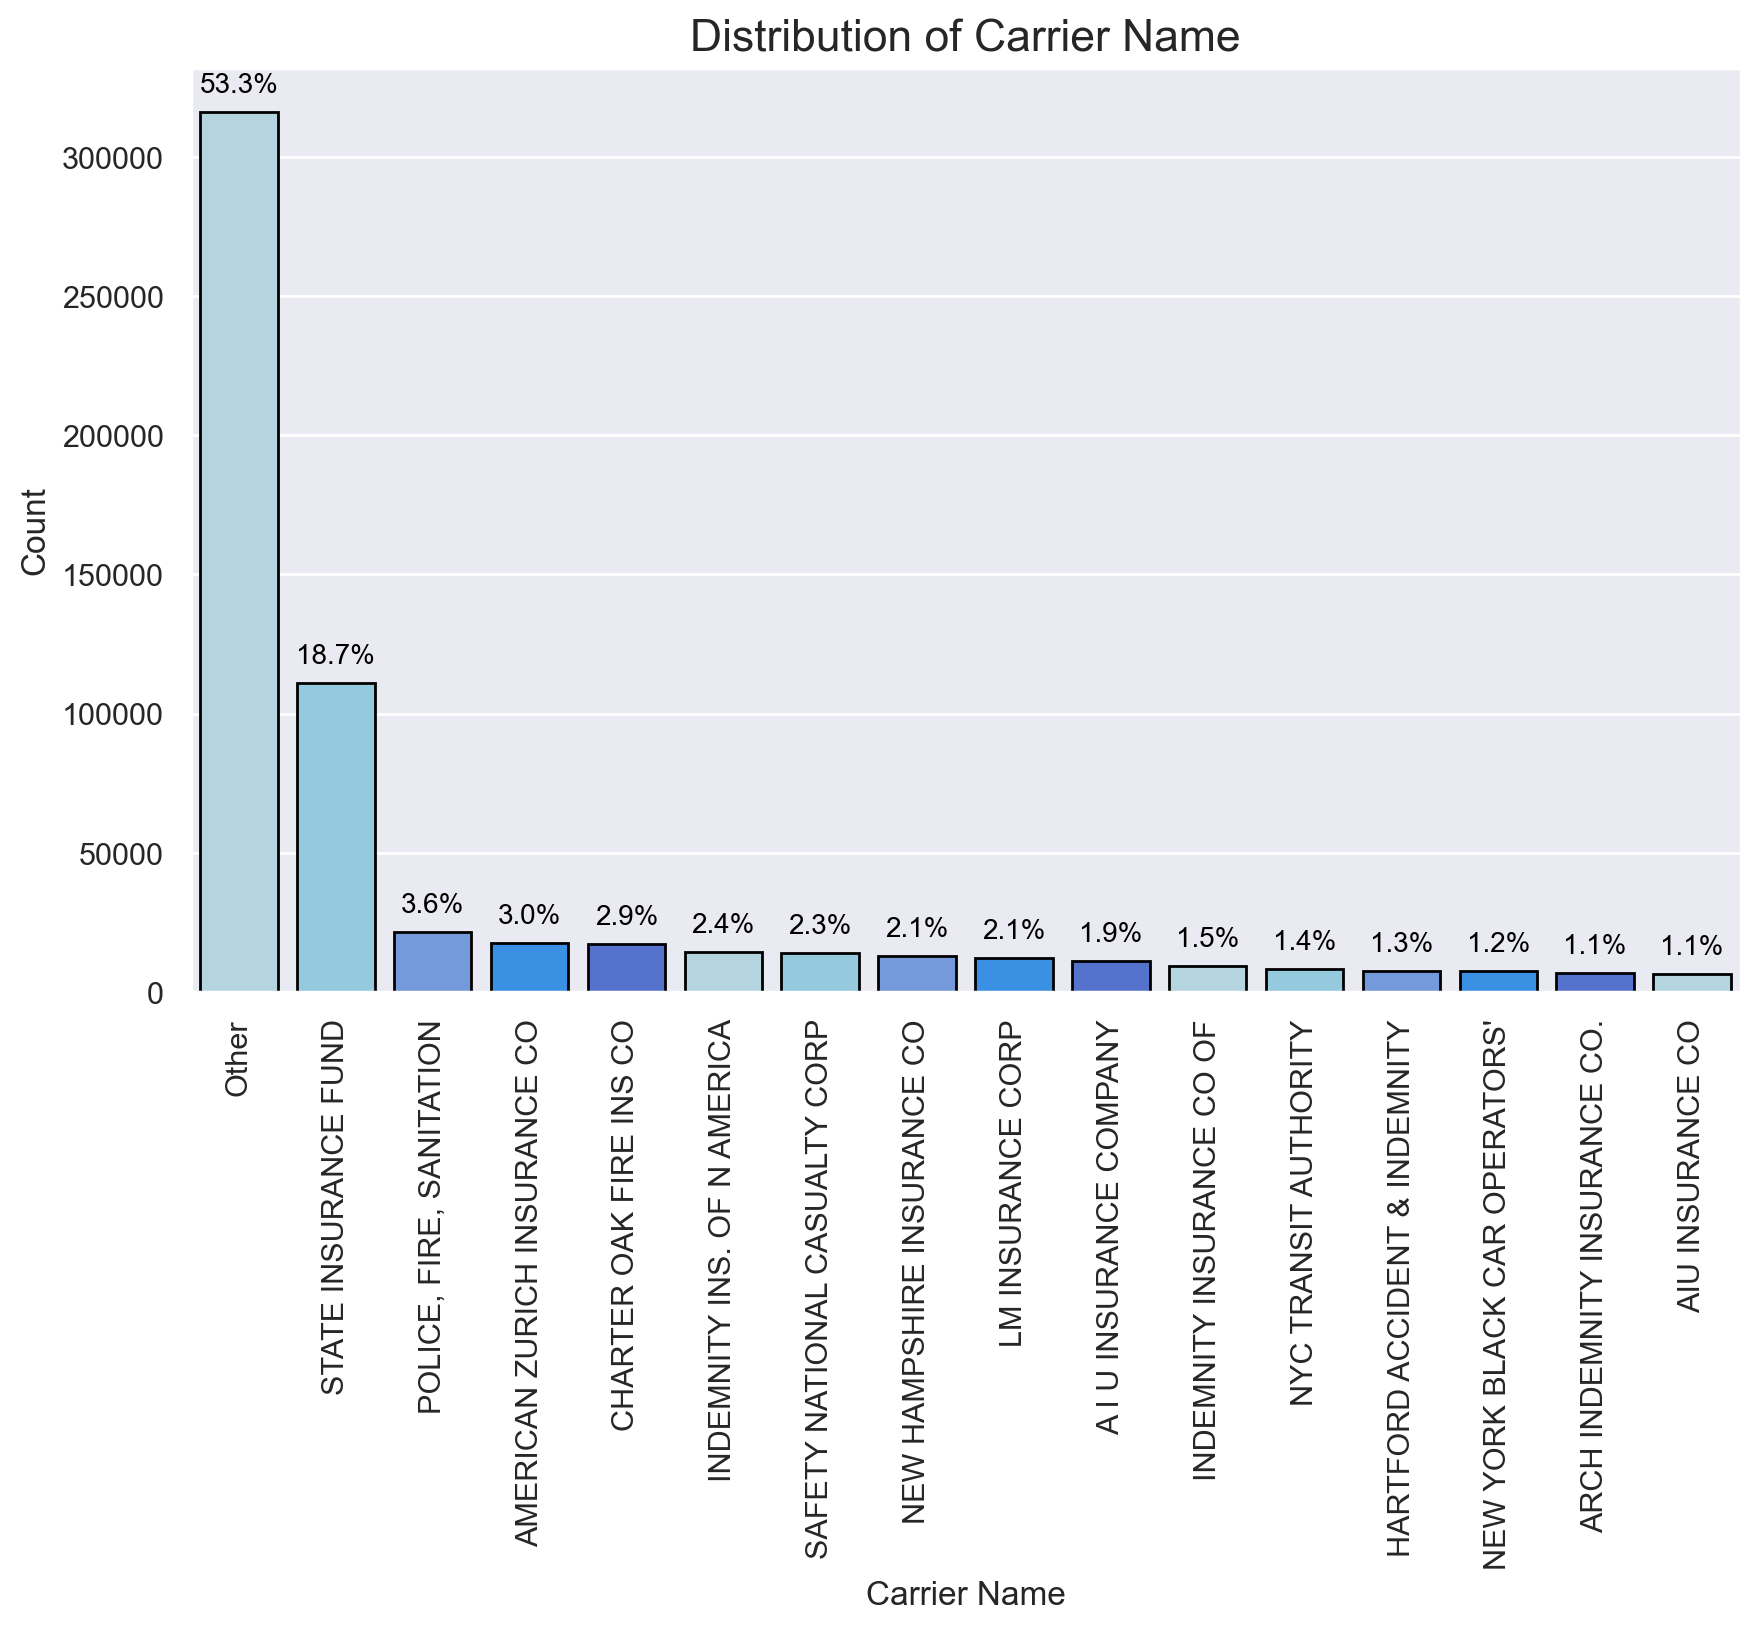

Count  Unique            Top (Mode)  Frequency of Top  Missing  Missing %
0  574026     429  STATE INSURANCE FUND            111144    19445   3.276487

In [536]:
plot_categorical_distribution(df, 'Carrier Name')

## **Carrier Type**

**Observations on Carrier Type**:
* 19445 missing values (3,28%): same number of missing values as Carrier Name has
* 8 unique Carrier Types 
* Most frequent: A. PRIVATE
* Lowest frequency: 5C. SPECIAL FUND - POI CARRIER WCB MENANDS and 5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)

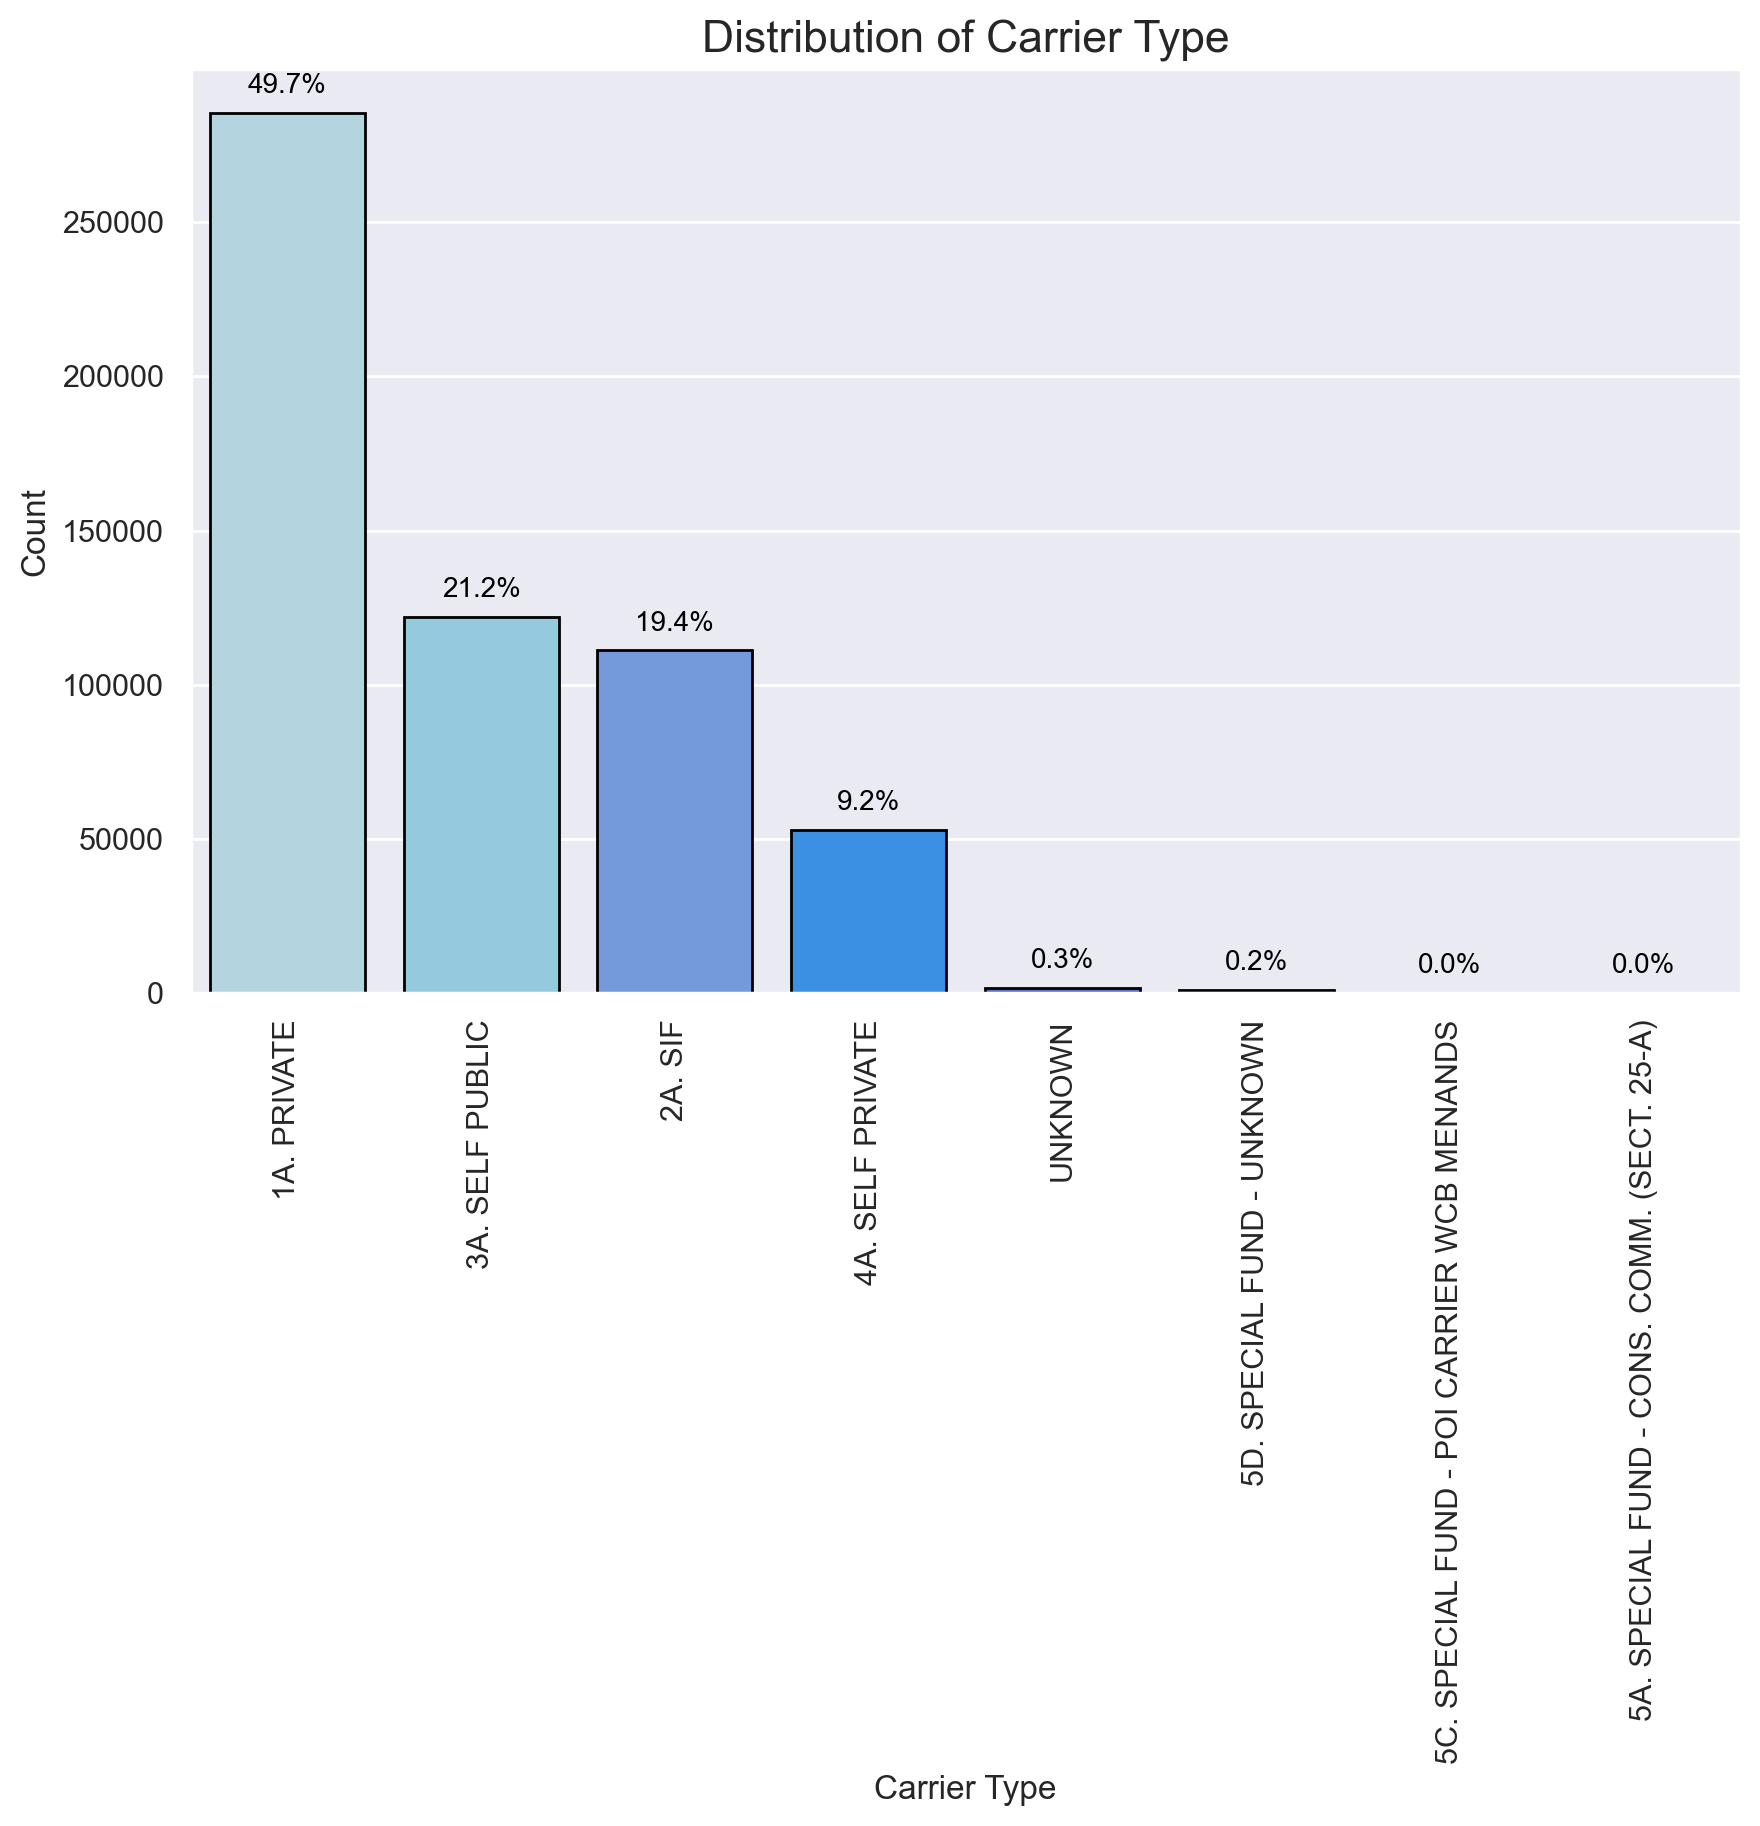

Count  Unique   Top (Mode)  Frequency of Top  Missing  Missing %
0  574026       8  1A. PRIVATE            285368    19445   3.276487

In [538]:
plot_categorical_distribution(df, 'Carrier Type')

## **County of Injury**

**Observations on County of Injury:**
* 19445 missing values (3,28%): same number of missing values as Carrier Type and Carrier Type has
* 63 unique County of Injuries
* Most frequent: SUFFOLK
* Highest Frequency: Other
* Lowest Frequency: ROCKLAND

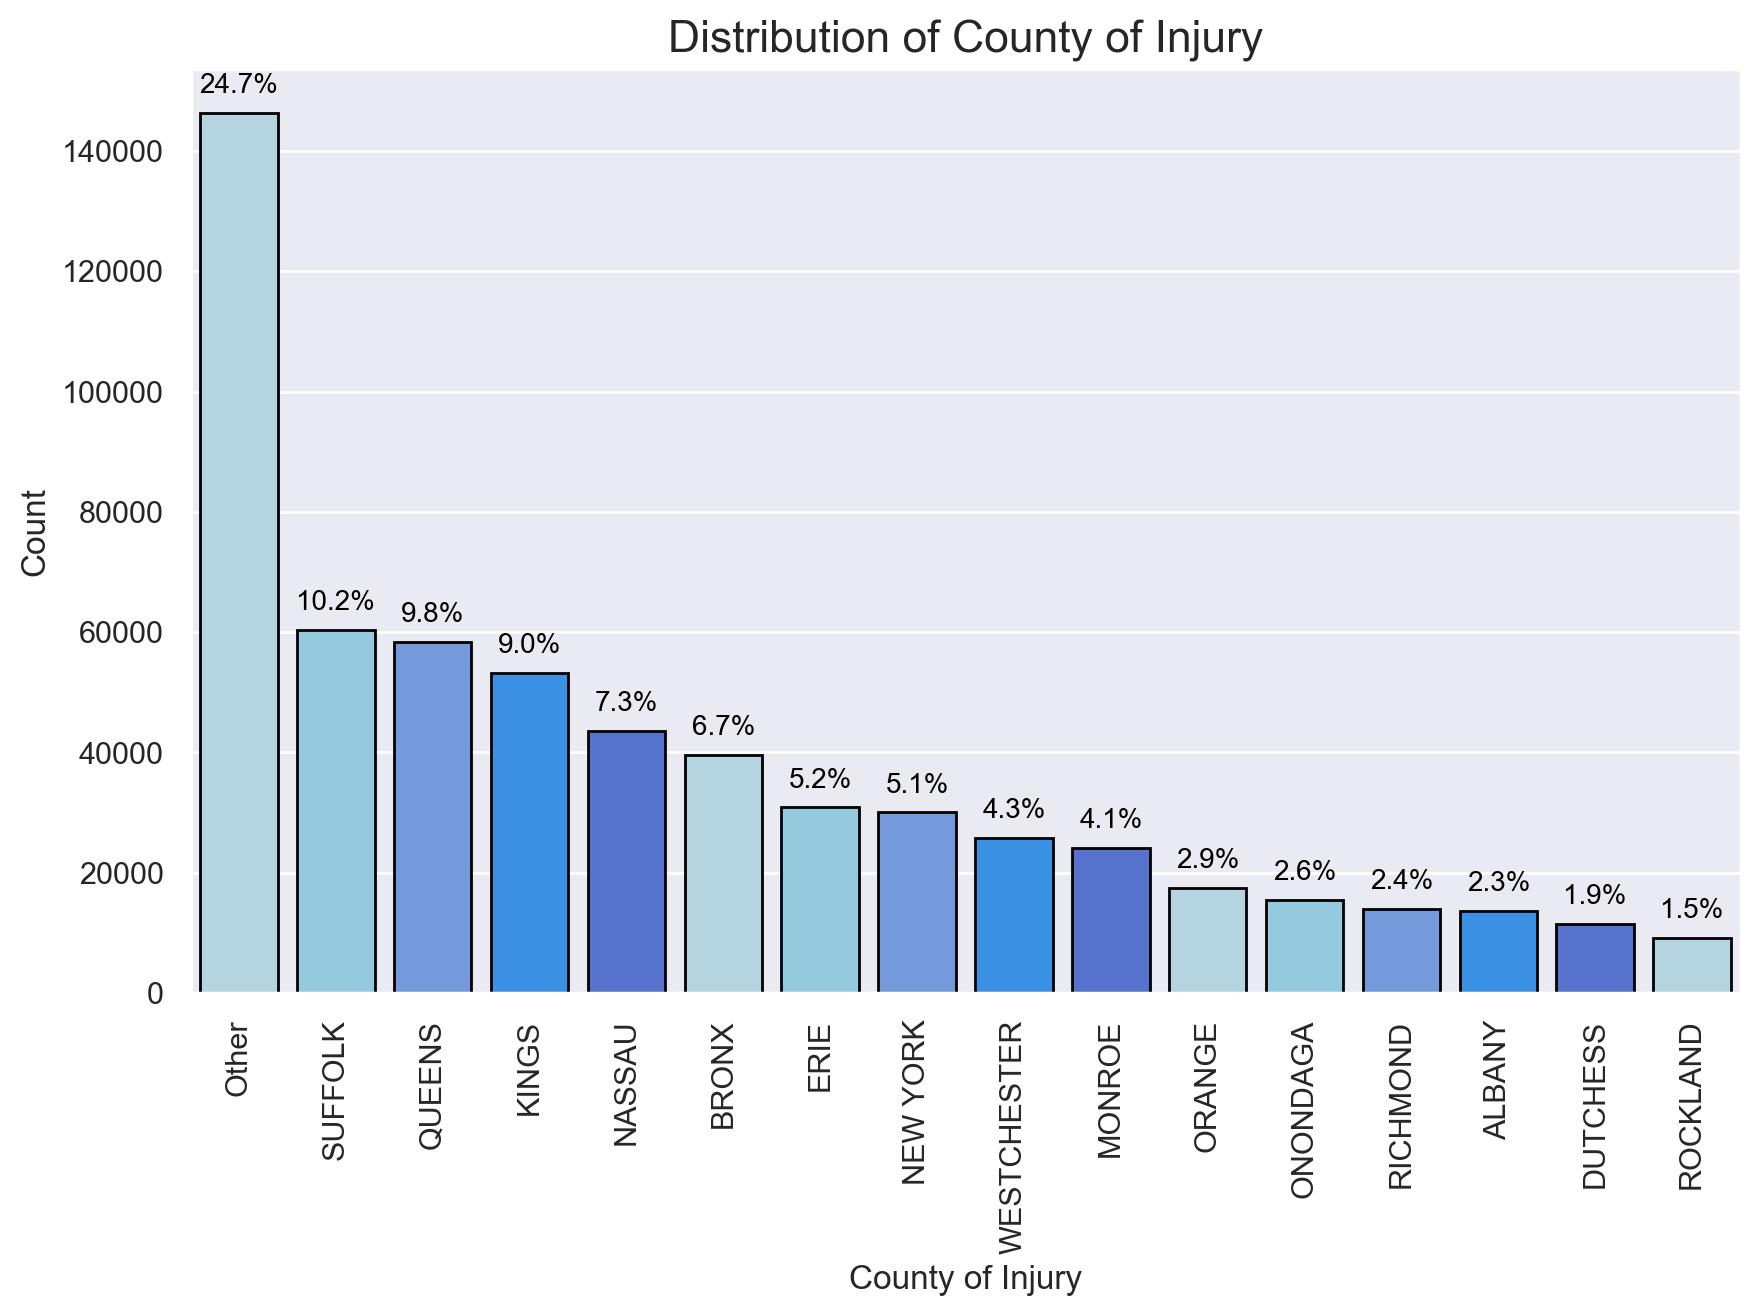

Count  Unique Top (Mode)  Frequency of Top  Missing  Missing %
0  574026      63    SUFFOLK             60430    19445   3.276487

In [540]:
plot_categorical_distribution(df, 'County of Injury')

## **COVID-19 Indicator**

**Observations on COVID-19 Indicator:**
* 19445 missing values (3,28%): same number of missing value as Carrier Type, Carrier Name, County of Injury has
* 2 unique Covid-19 Indicator
* Most Frequent: N 
* Really imbalanced, 95.2% are N and only 4,8% are Y

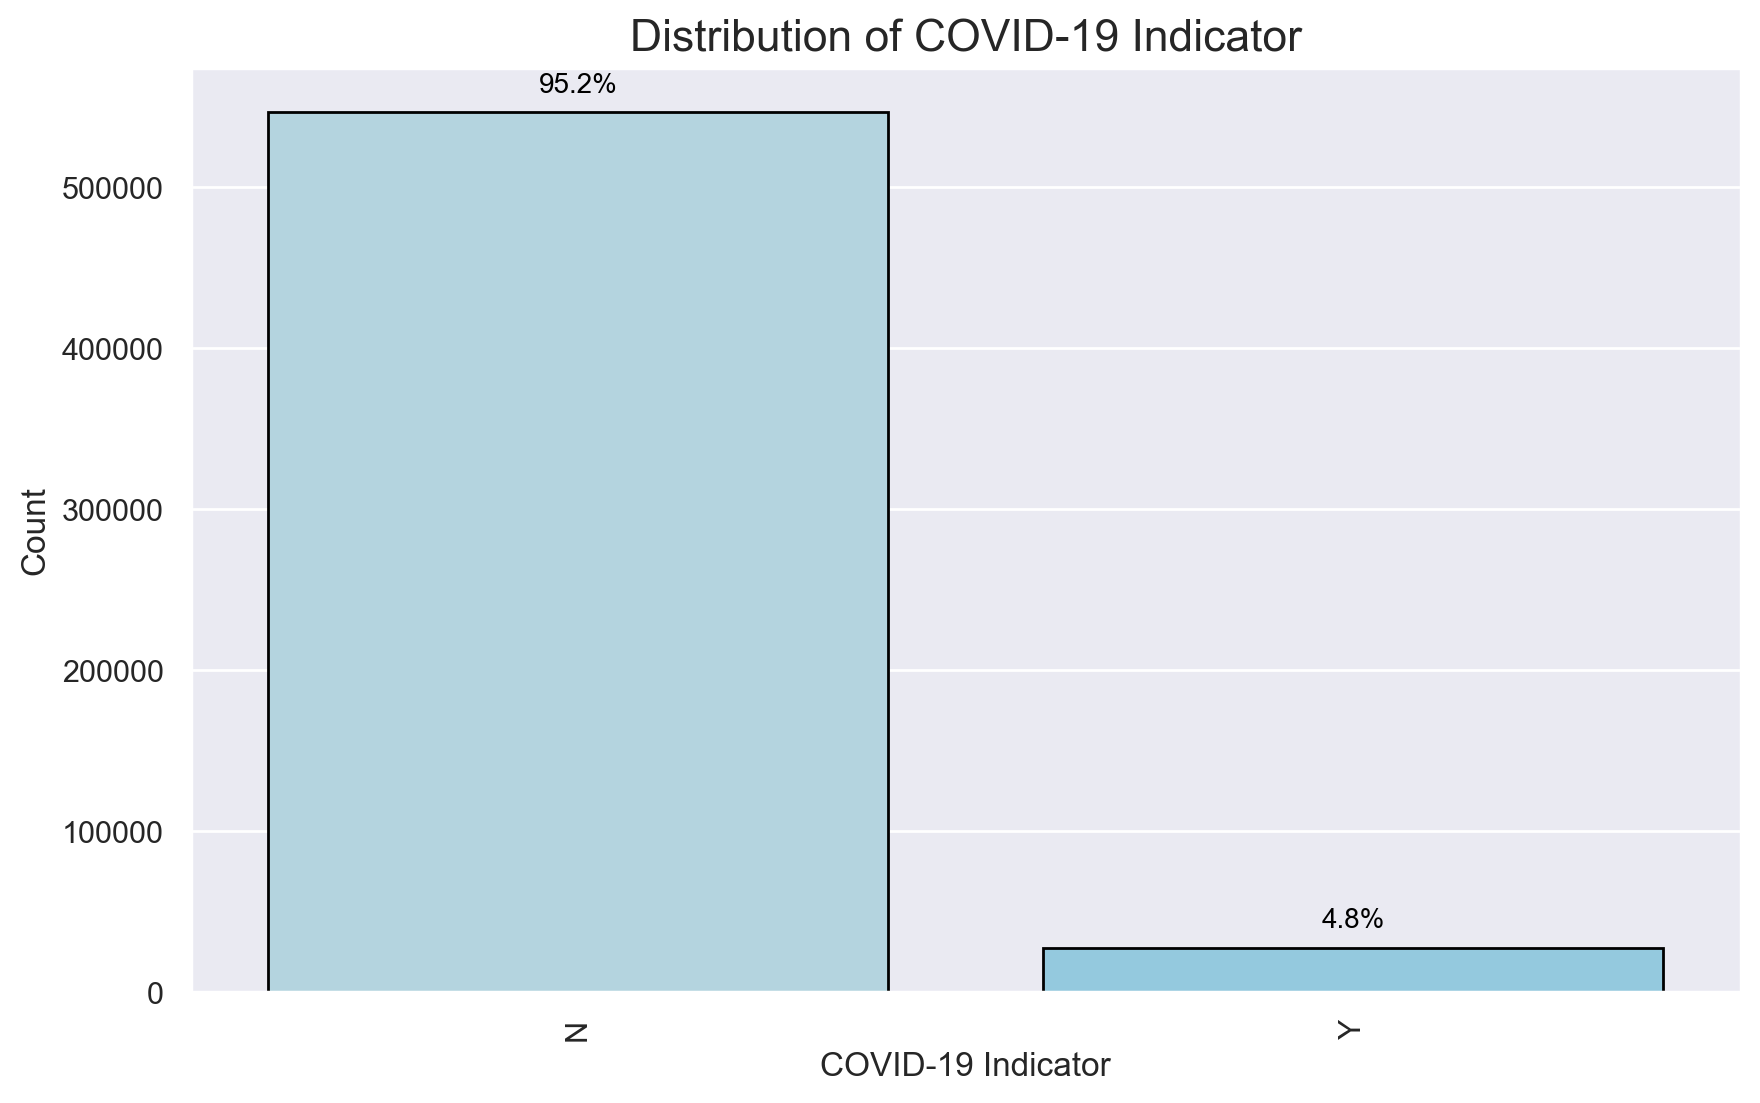

Count  Unique Top (Mode)  Frequency of Top  Missing  Missing %
0  574026       2          N            546505    19445   3.276487

In [542]:
plot_categorical_distribution(df, 'COVID-19 Indicator')

## **District Name**

**Observations on District Name:**
* 19445 missing values (3,28%): same number of missing value as Carrier Type, Carrier Name, County of Injury, COVID-19 Indicator has
* 8 unique Distric Names
* Most frequent: NYC
* Lowest frequency: STATEWIDE

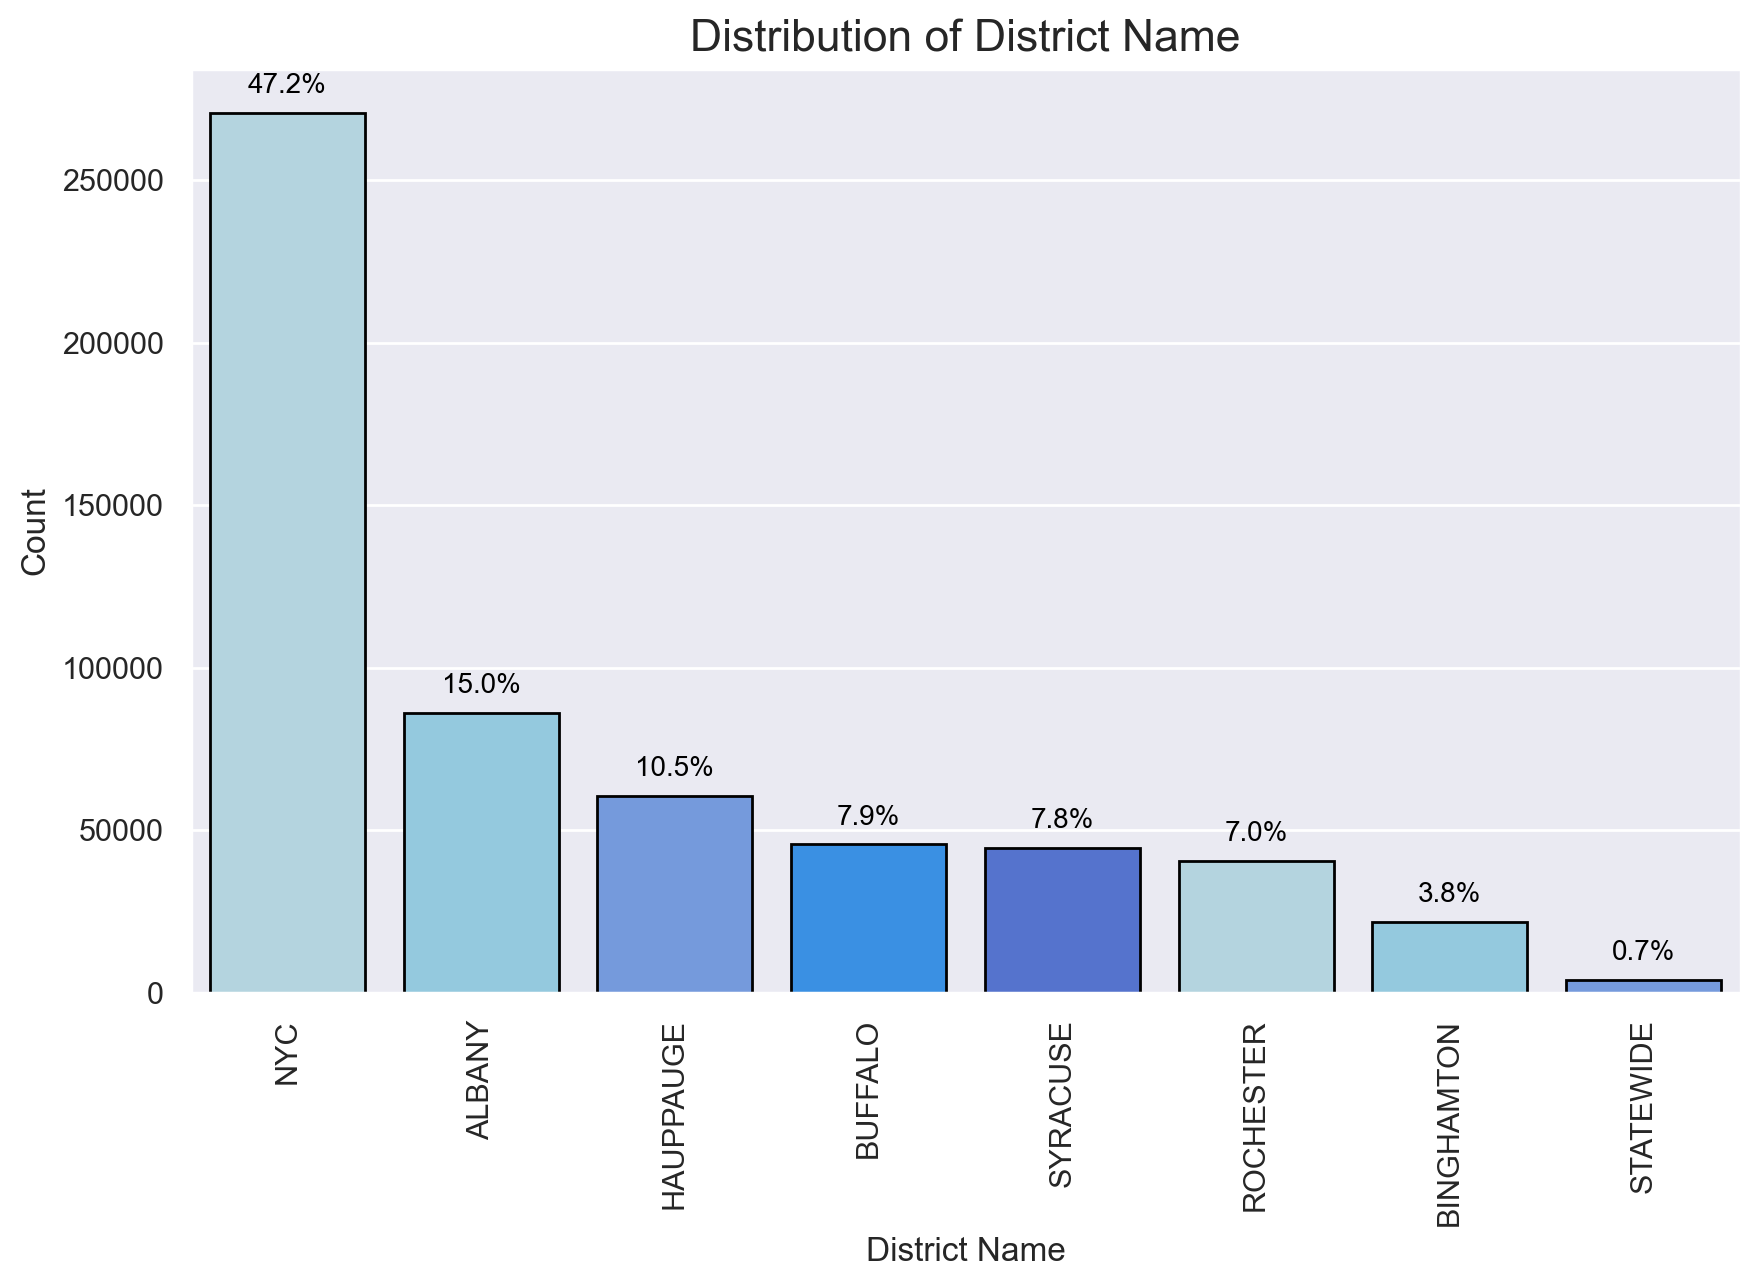

Count  Unique Top (Mode)  Frequency of Top  Missing  Missing %
0  574026       8        NYC            270779    19445   3.276487

In [544]:
plot_categorical_distribution(df, 'District Name')

## **First Hearing Date**

**Observations on First Hearing Date**:
* 442673 missing values (74.59%): means that 74.59% of claims have not yet had a hearing scheduled
* No zeros
* Minimum Date: 2020-01-30 
* Maximum Date: 2024-06-07

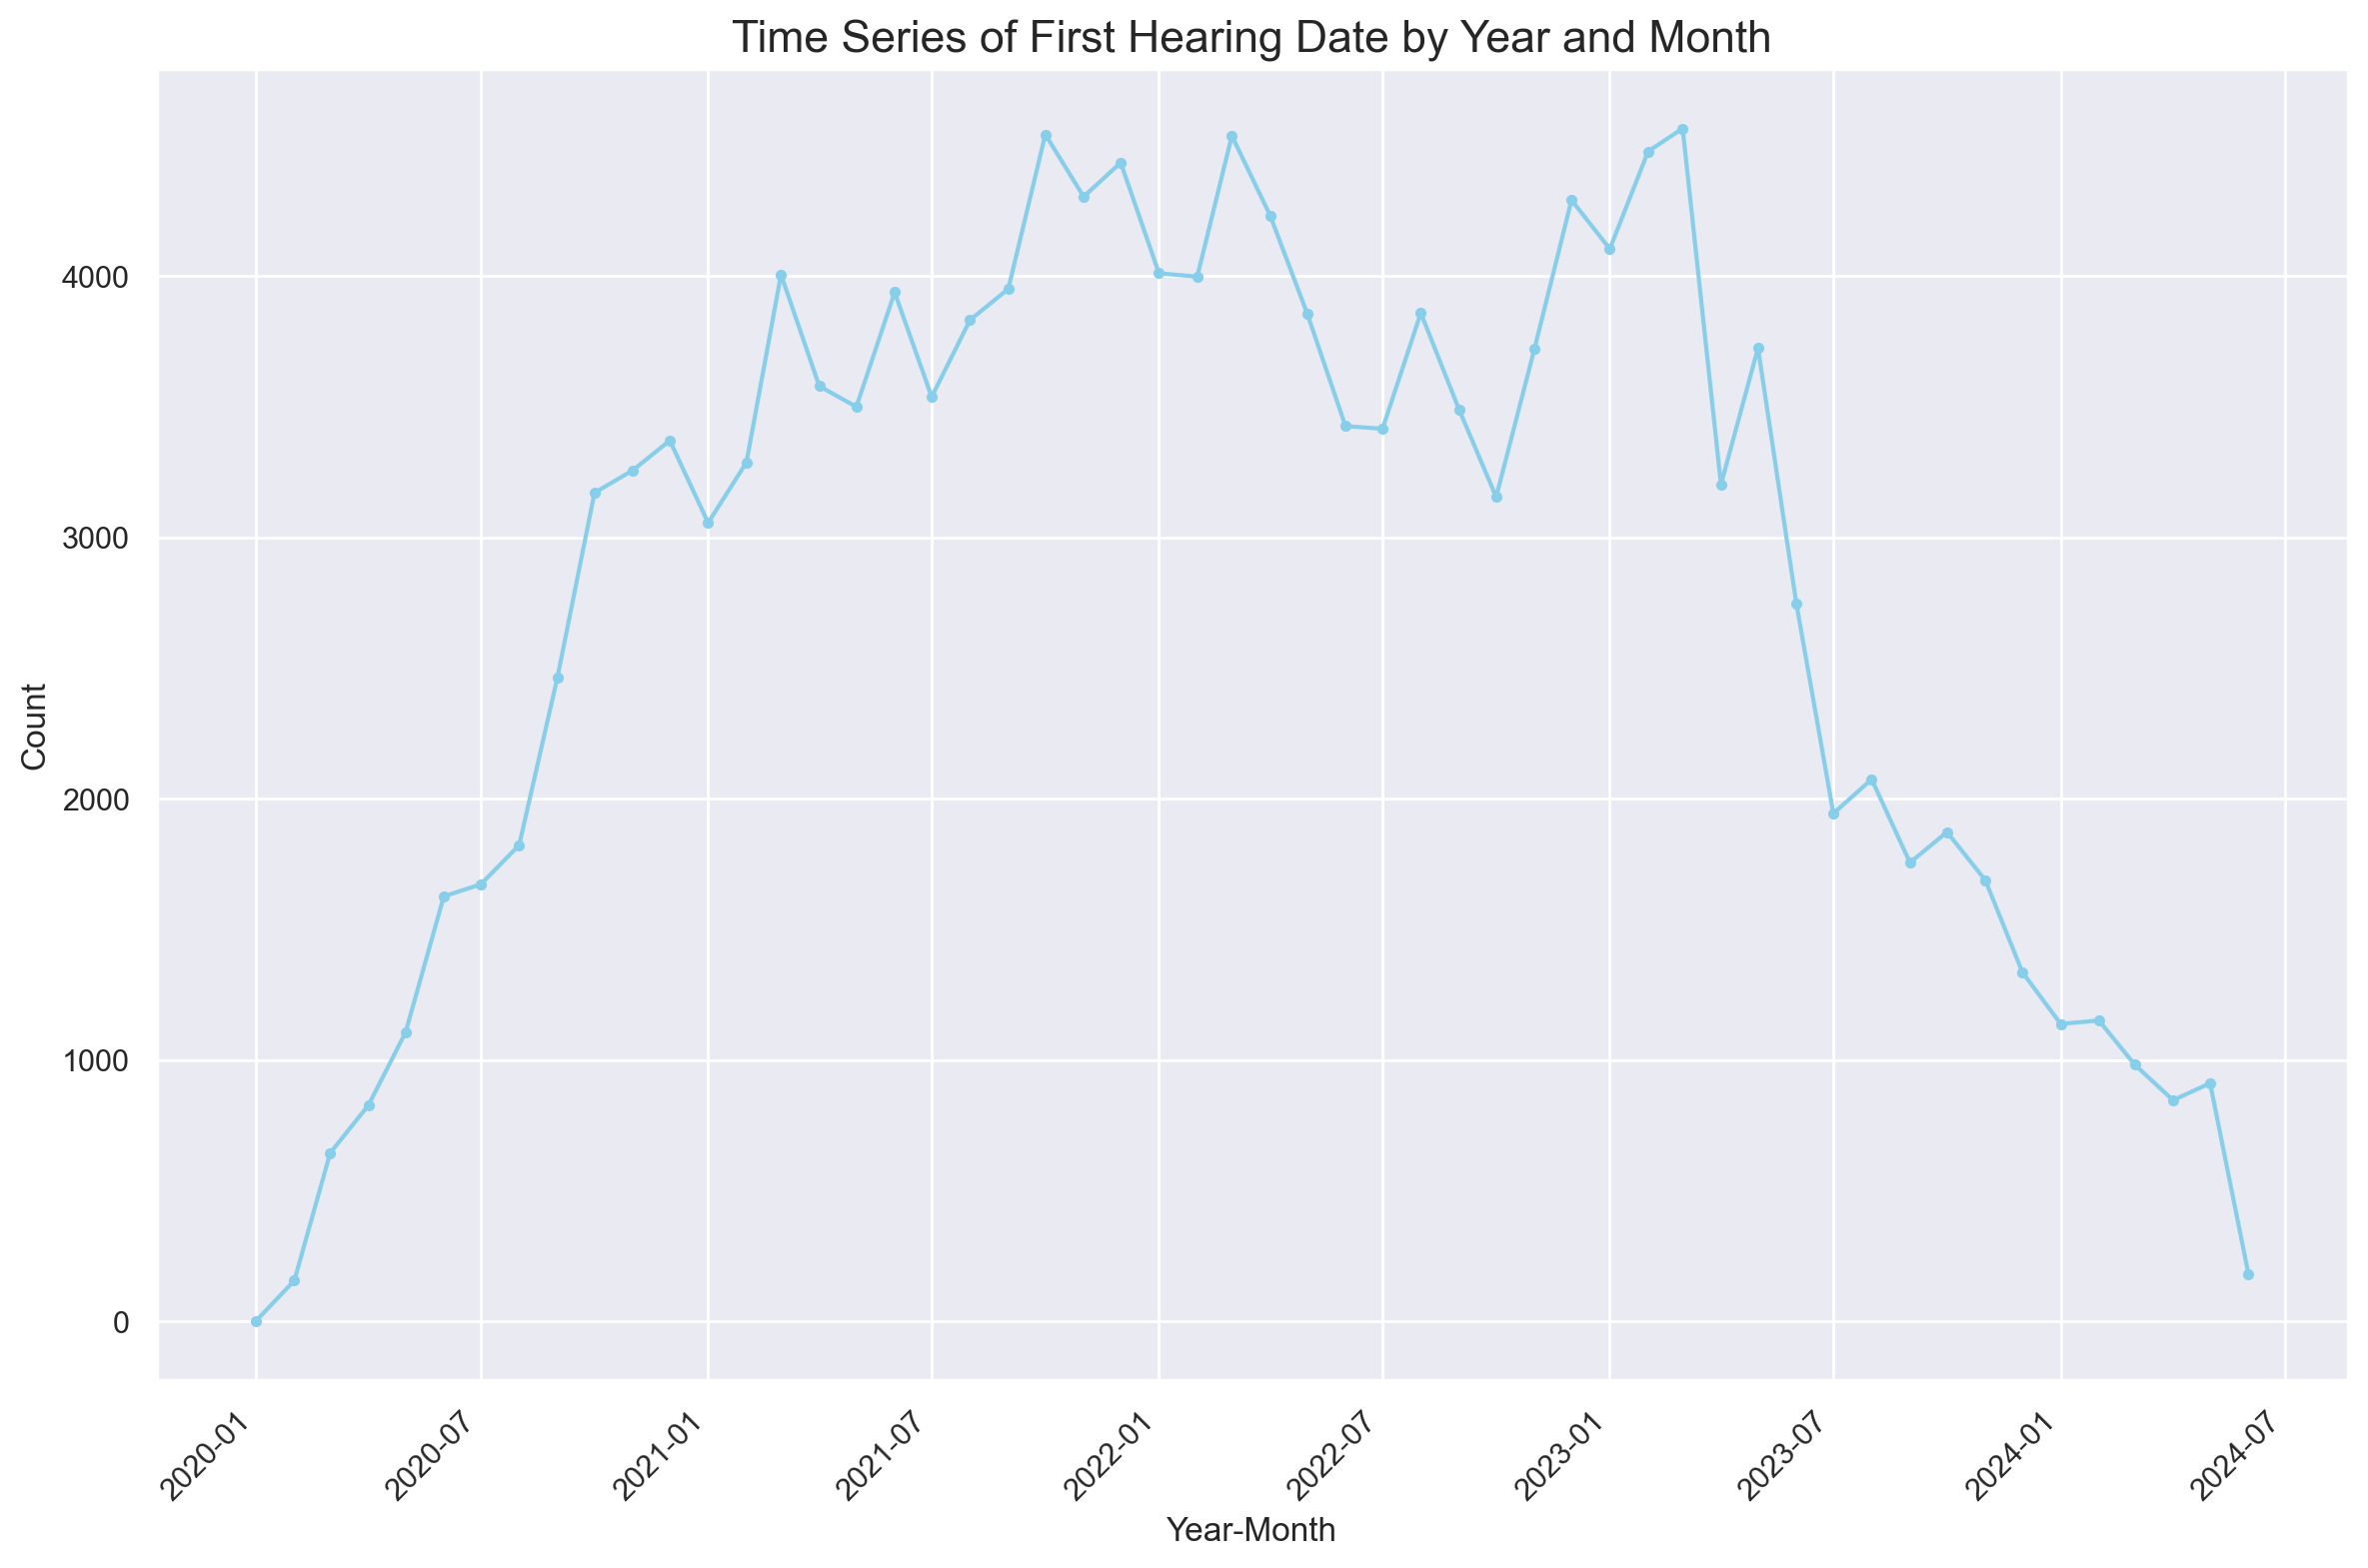

In [546]:
plot_timeseries(df, 'First Hearing Date')

In [548]:
describe_features(df, 'First Hearing Date')

count unique         top freq  missing   missing%  zeros  \
First Hearing Date  150798   1094  2022-04-15  440   442673  74.590502      0   

                    zeros%  
First Hearing Date     0.0

## **Gender**

**Observations on Gender**:
* 19445 missing values (3.28%): same number as Carrier Type, Carrier Name, County of Injury, COVID-19 Indicator, District Name has
* 4 unique genders: probably U and X means Unknown and non-binary, respectively 
* Most frequent: M 
* Lowest frequency: X

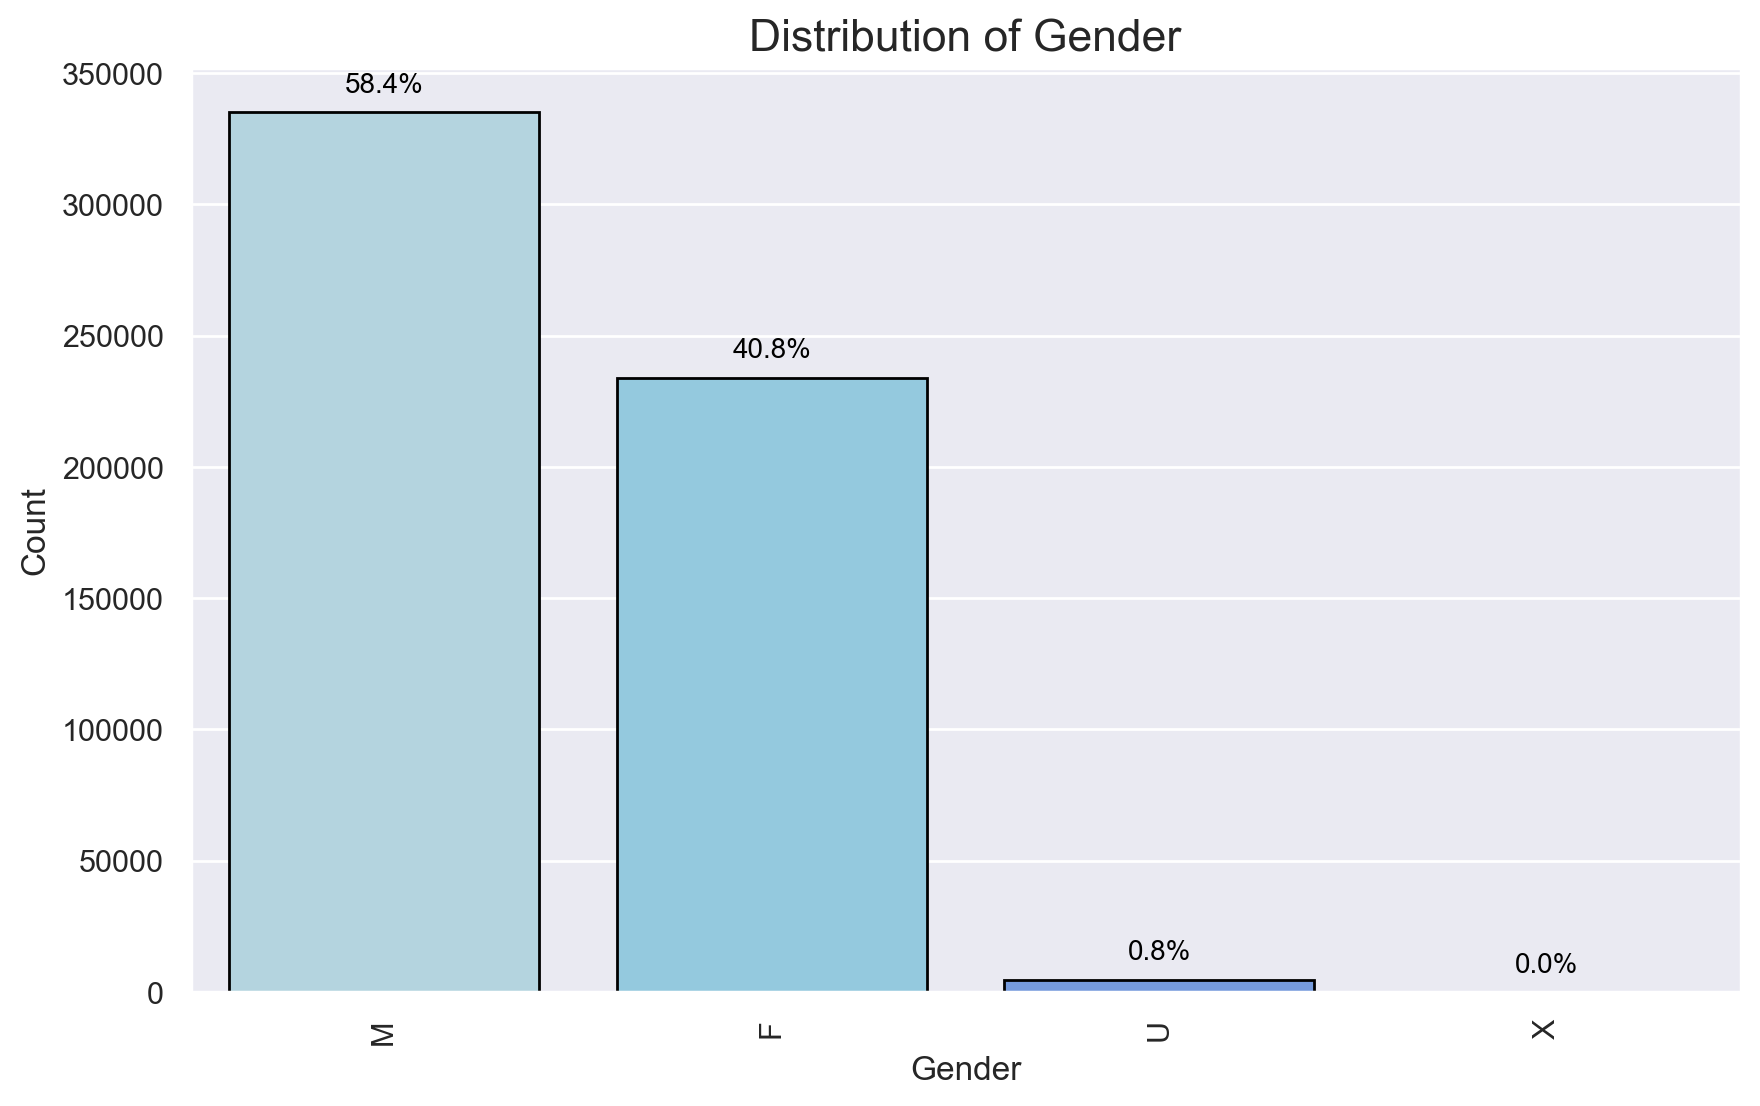

Count  Unique Top (Mode)  Frequency of Top  Missing  Missing %
0  574026       4          M            335218    19445   3.276487

In [550]:
plot_categorical_distribution(df, 'Gender')

## **IME-4 Count**

**Observations on IME-4 Count:**
* 460668 missing values (77.62%)
* No zeros
* Minimum value: 1
* Maximum value: 73 
* Mean: 3.2 - by analyzing the boxplot, we conclude that there are some extreme values. In the next steps, we will handle them  

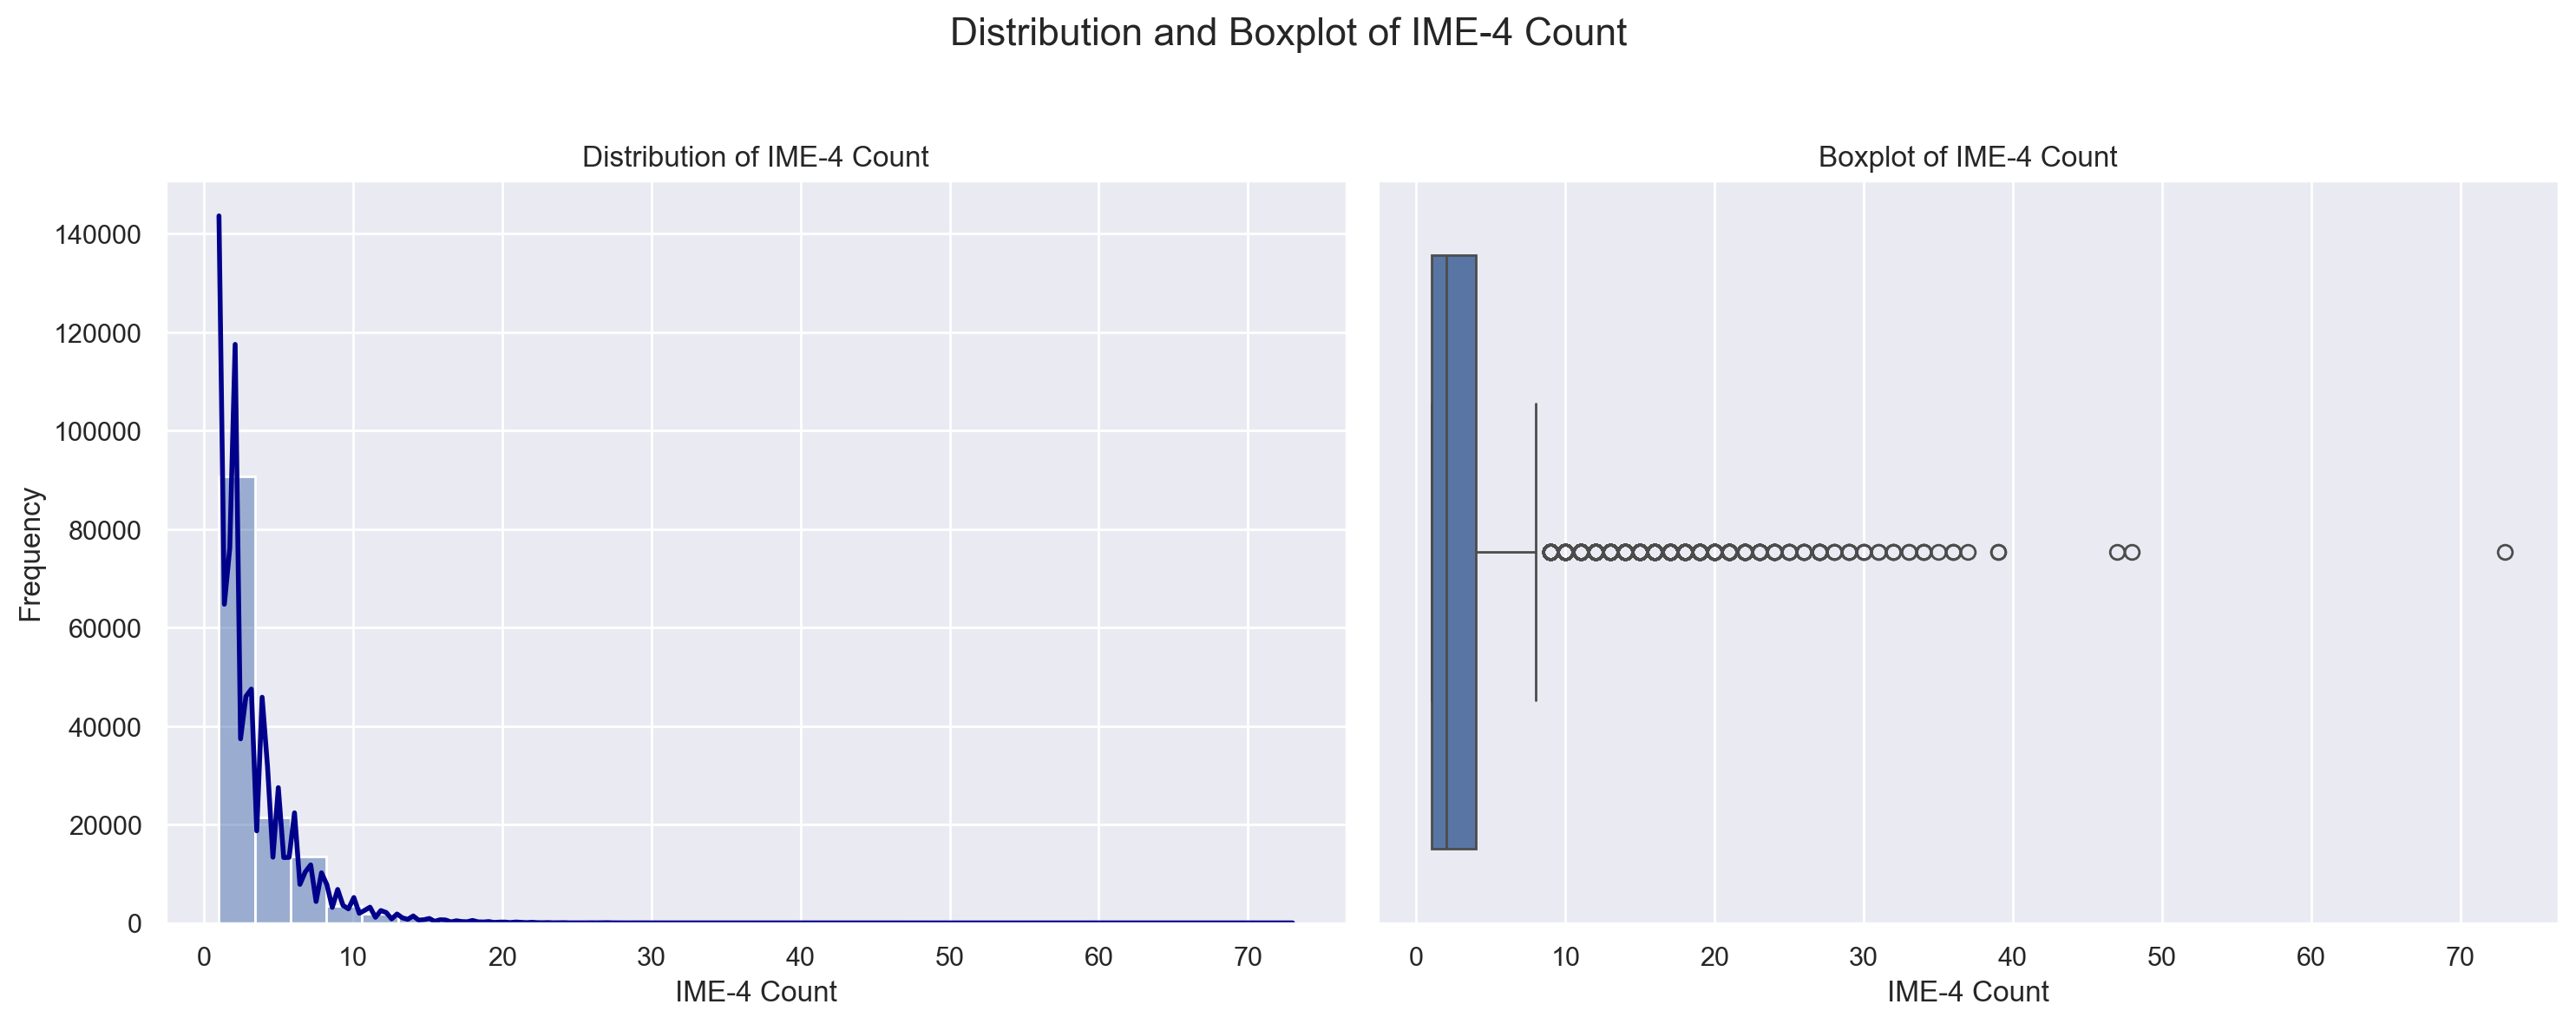

In [552]:
plot_distribution_and_boxplot(df, 'IME-4 Count')

In [554]:
describe_features(df, 'IME-4 Count')

count      mean       std  min  25%  50%  75%   max  missing  \
IME-4 Count  132803.0  3.207337  2.832303  1.0  1.0  2.0  4.0  73.0   460668   

              missing%  zeros  zeros%  
IME-4 Count  77.622664      0     0.0

## **Industry Code**

**Observations on Industry Code:**
* 29403 missing values (4.95%)
* 24 unique Industry Codes
* Mode: 62
* Lowest Frequency:  31

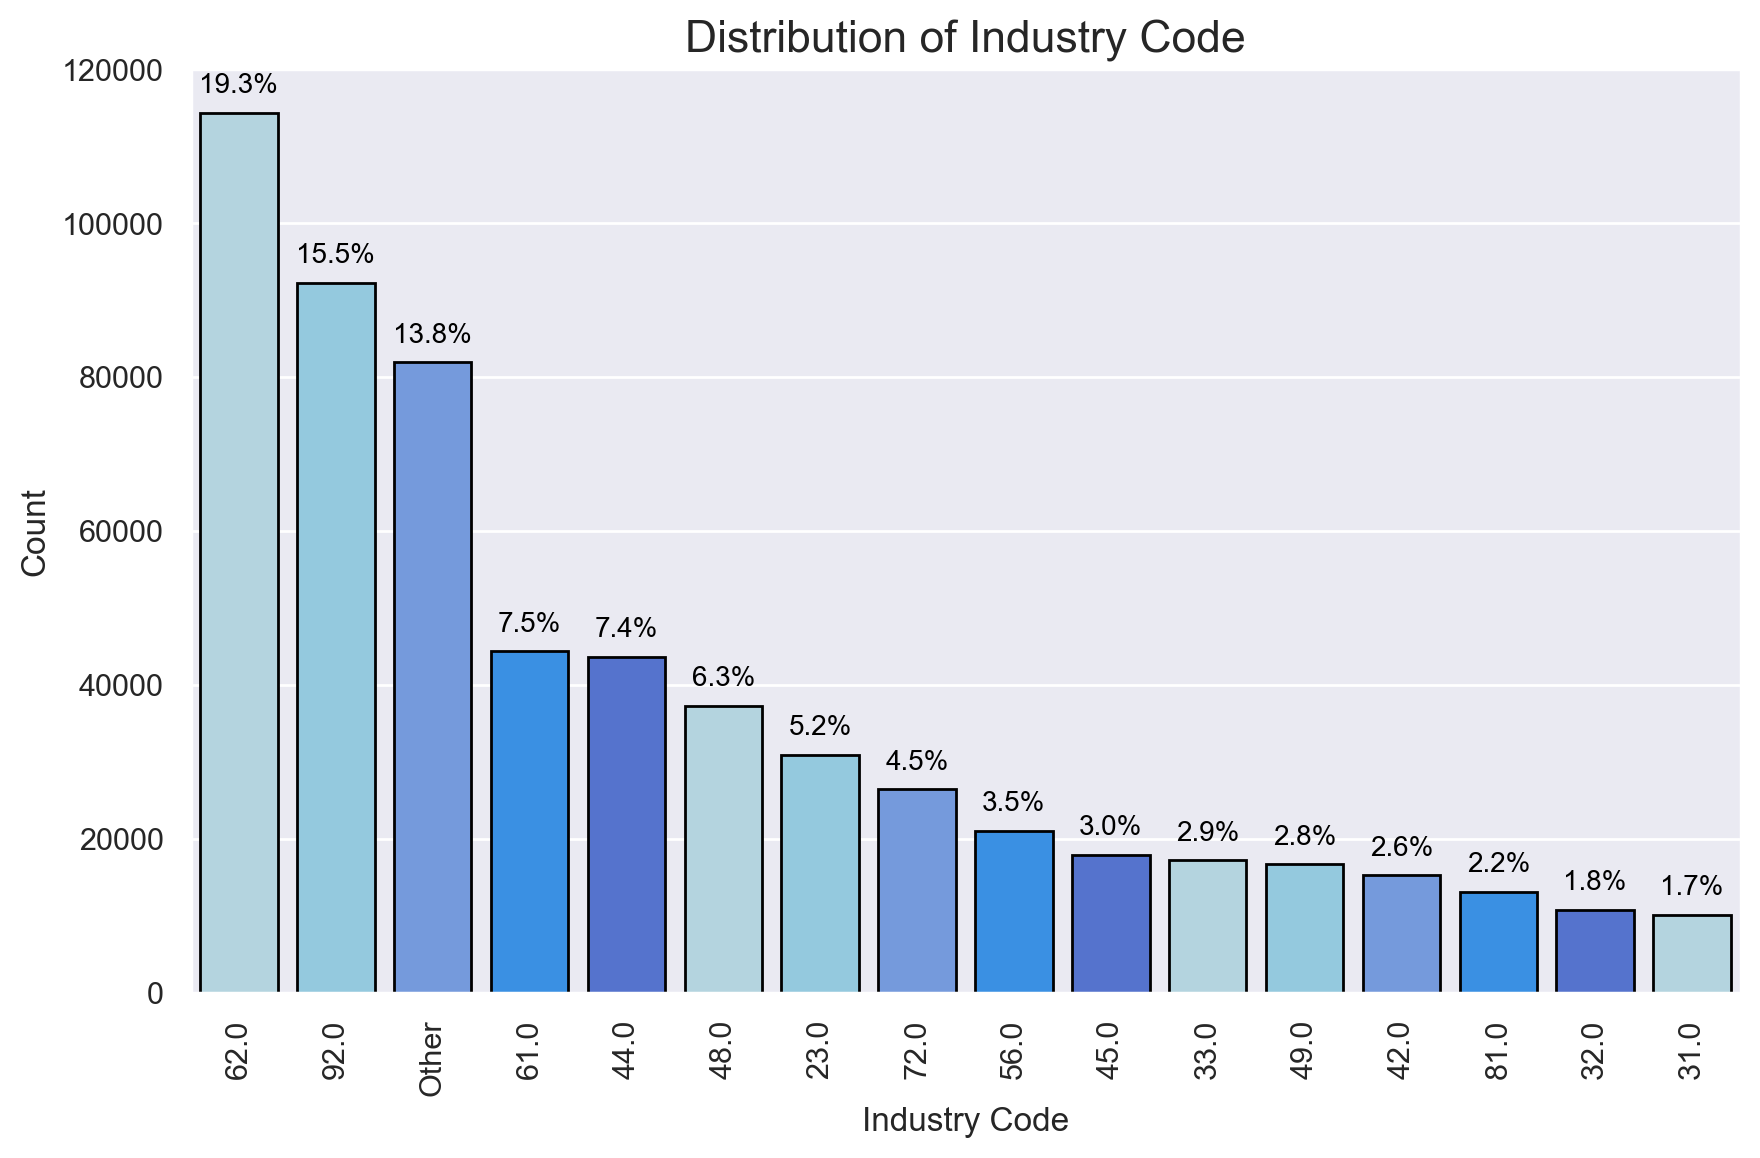

Count  Unique  Top (Mode)  Frequency of Top  Missing  Missing %
0  564068      24        62.0            114339    29403   4.954412

In [556]:
plot_categorical_distribution(df, 'Industry Code')

## **Industry Code Description**

**Observations on Industry Code Description:**
* 29403	missing values (4.95%): same missing values as Industry Code
* 20 unique Industry Codes Description
* Most frequent: HEALTH CARE AND SOCIAL ASSISTANCE
* Lowest Frequency: INFORMATION and REAL ESTATE AND RENTAL AND LEASING

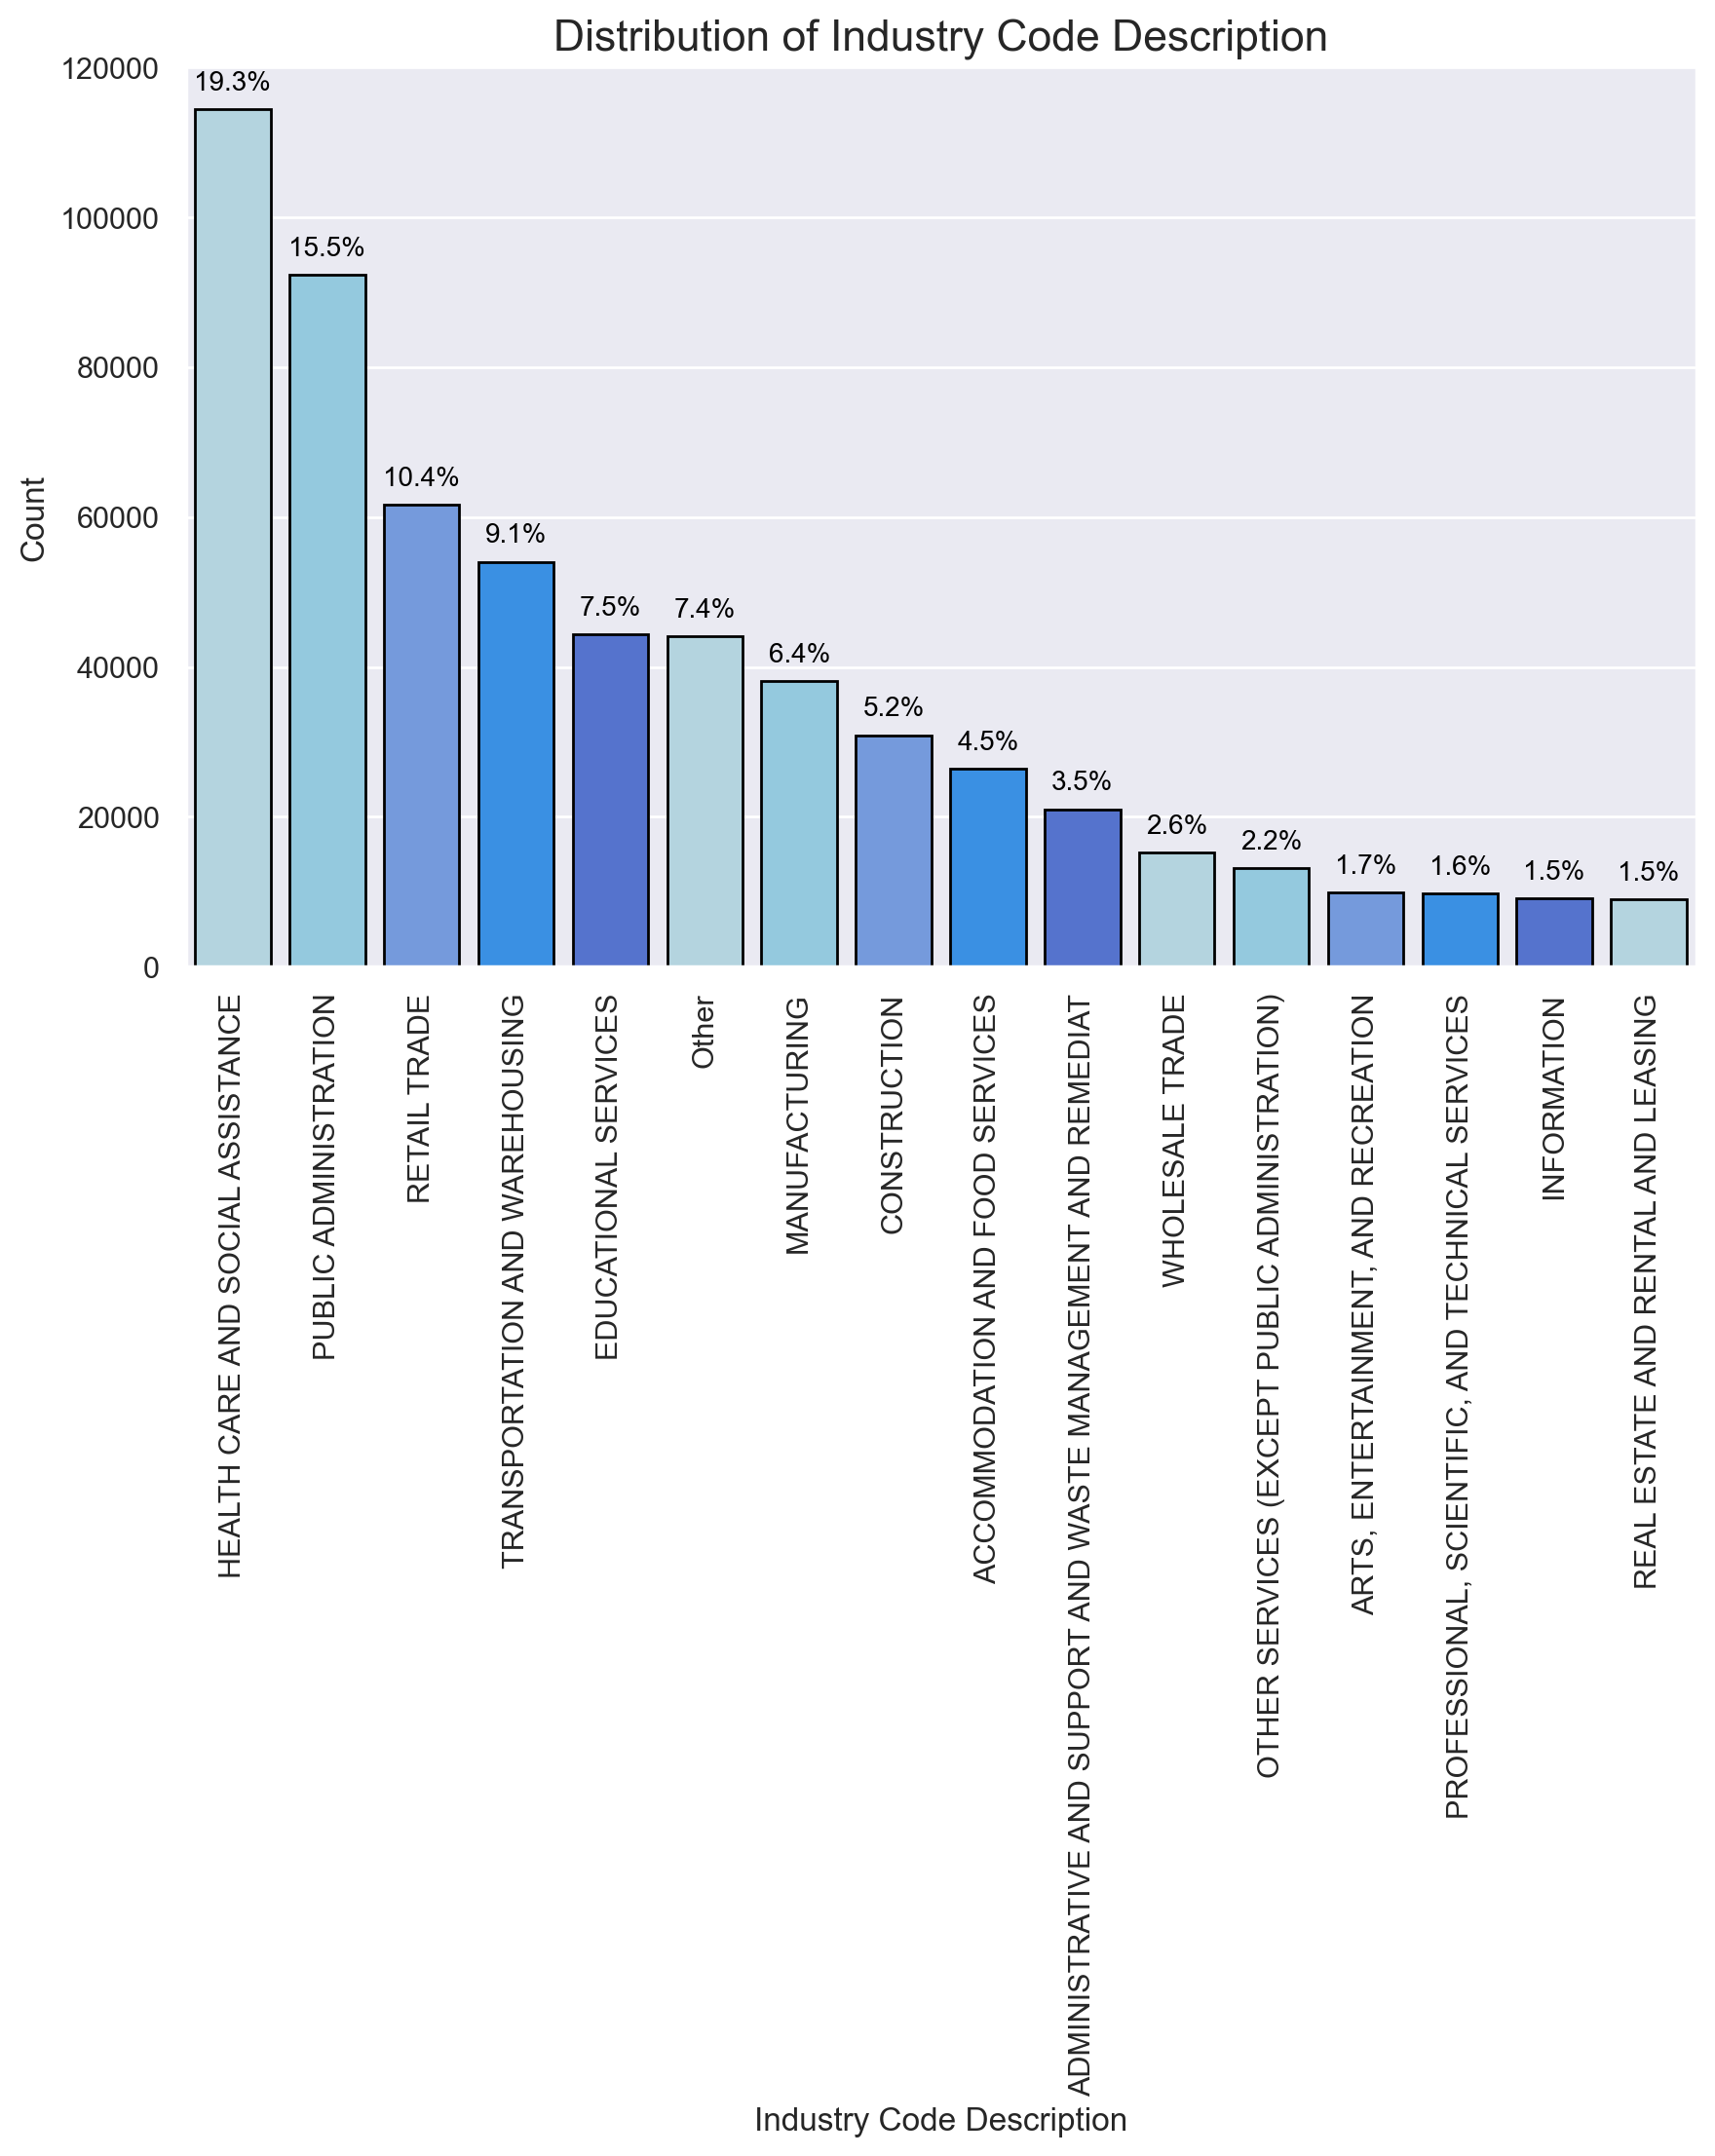

Count  Unique                         Top (Mode)  Frequency of Top  \
0  564068      20  HEALTH CARE AND SOCIAL ASSISTANCE            114339   

   Missing  Missing %  
0    29403   4.954412

In [558]:
plot_categorical_distribution(df, "Industry Code Description")

## **Medical Fee Region**

**Observations on Medical Fee Region:**
* 19445 missing values (3.28%): same number as Carrier Type, Carrier Name, County of Injury, COVID-19 Indicator, District Name, Gender has
* 5 unique Medical Fee Regions
* Most frequent: IV
* Lowest Frequency: UK - which probably means 'Unknown'

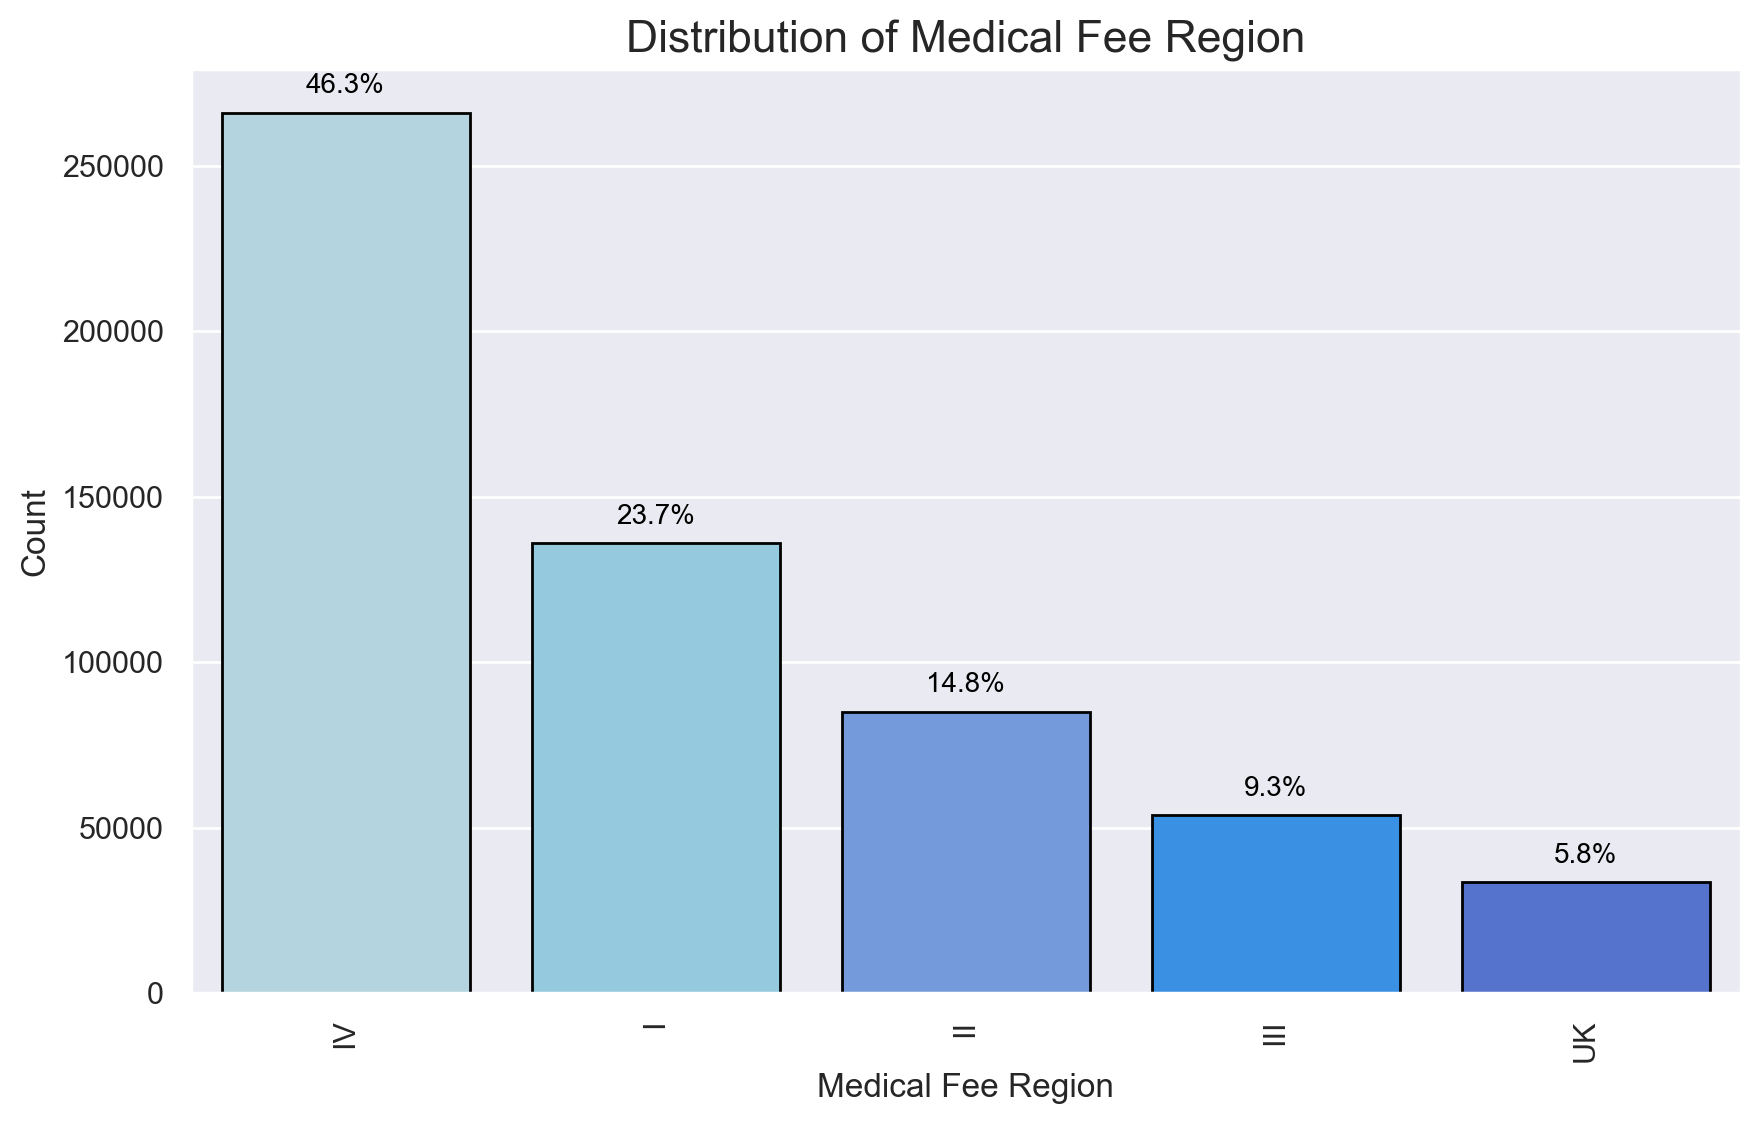

Count  Unique Top (Mode)  Frequency of Top  Missing  Missing %
0  574026       5         IV            265981    19445   3.276487

In [559]:
plot_categorical_distribution(df, "Medical Fee Region")

## **WCIO Cause of Injury Code**

**Observations on  WCIO Cause of Injury Code:**
* 35085 missing values (5.91%)
* 77 unique Causes of Injury 
* Most frequent: 56
* Highest frequency: Other
* Lowest frequency: 32 and 25

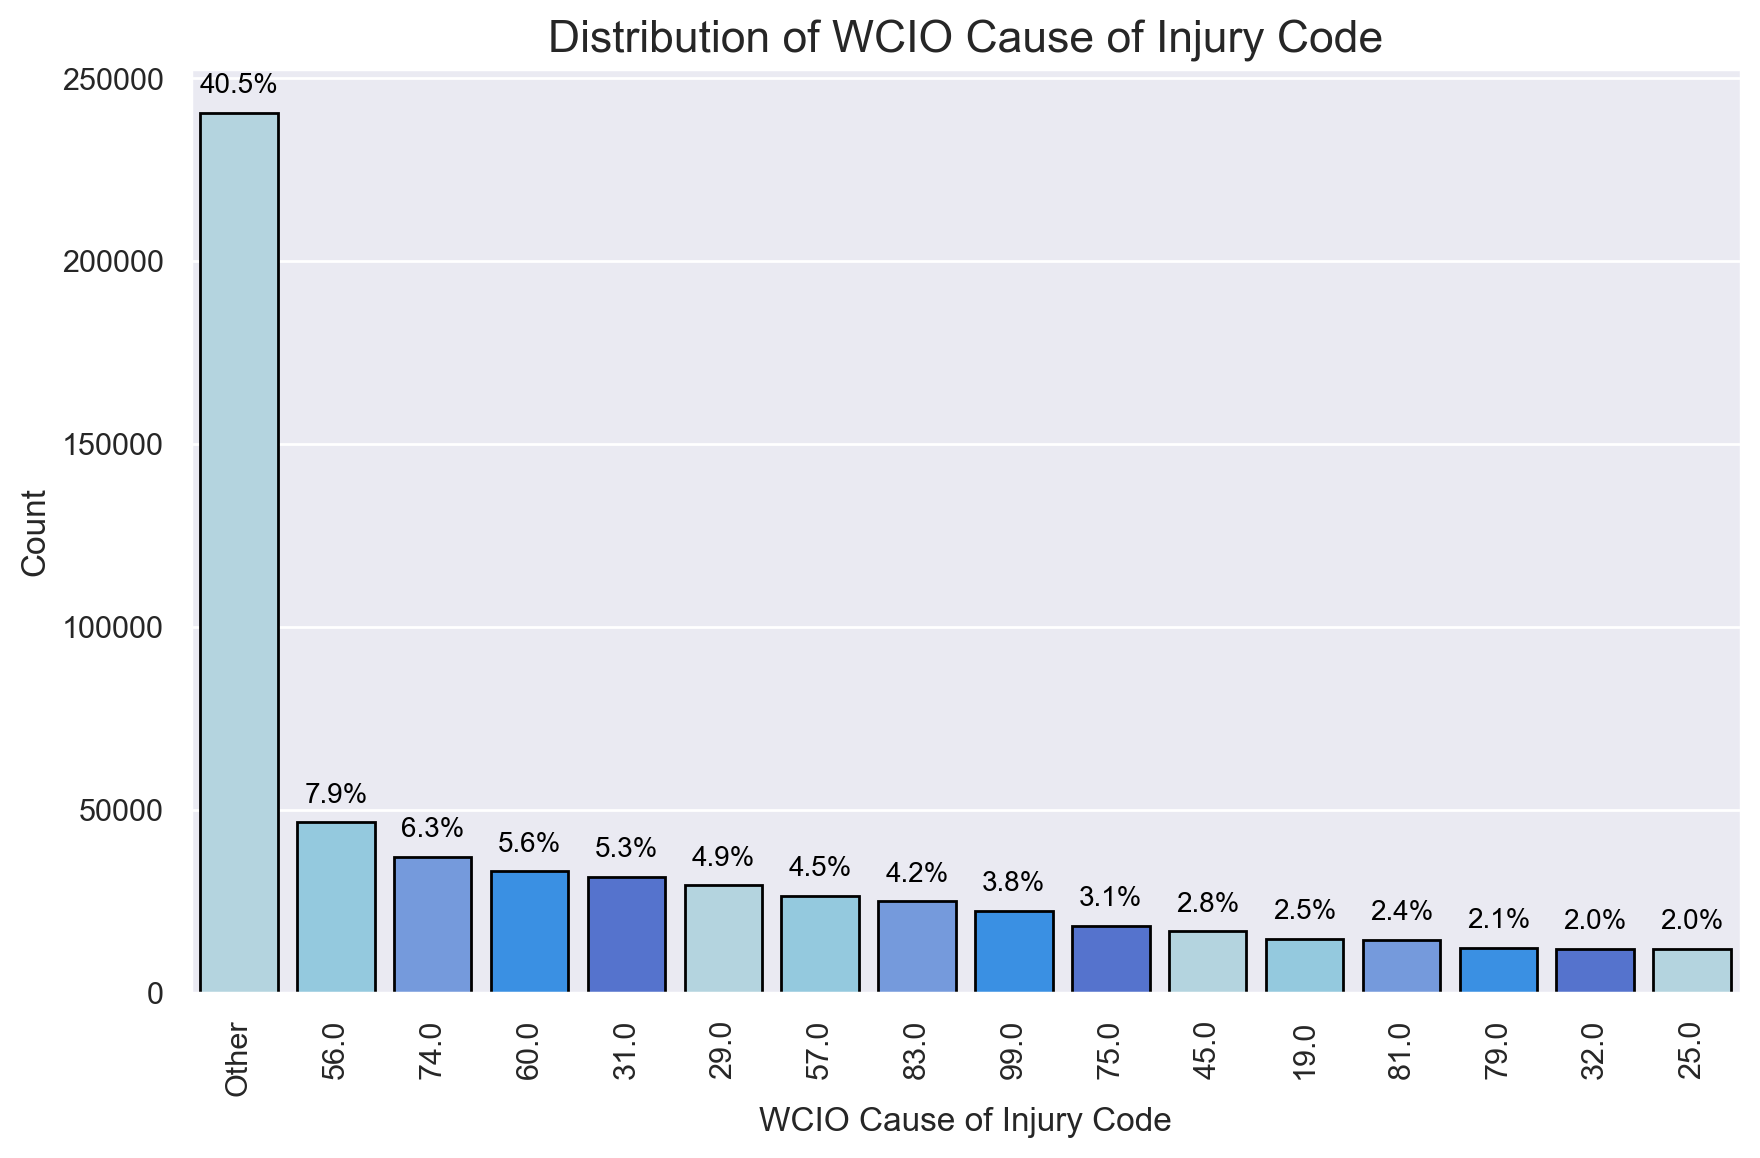

Count  Unique  Top (Mode)  Frequency of Top  Missing  Missing %
0  558386      77        56.0             46610    35085   5.911831

In [562]:
plot_categorical_distribution(df, "WCIO Cause of Injury Code")

## **WCIO Cause of Injury Description**

**Observations on WCIO Cause of Injury Description:**
* 35085 missing values (5.91%): same quantity of missing values as WCIO Cause of Injury Code
* 74 unique Descriptions: strange value, as we should have the same number of unique values in Codes and Descriptions (they should correspond)
* Most frequent: LIFTING
* Highest frequency: Other
* Lowest frequency: ON ICE OR SNOW

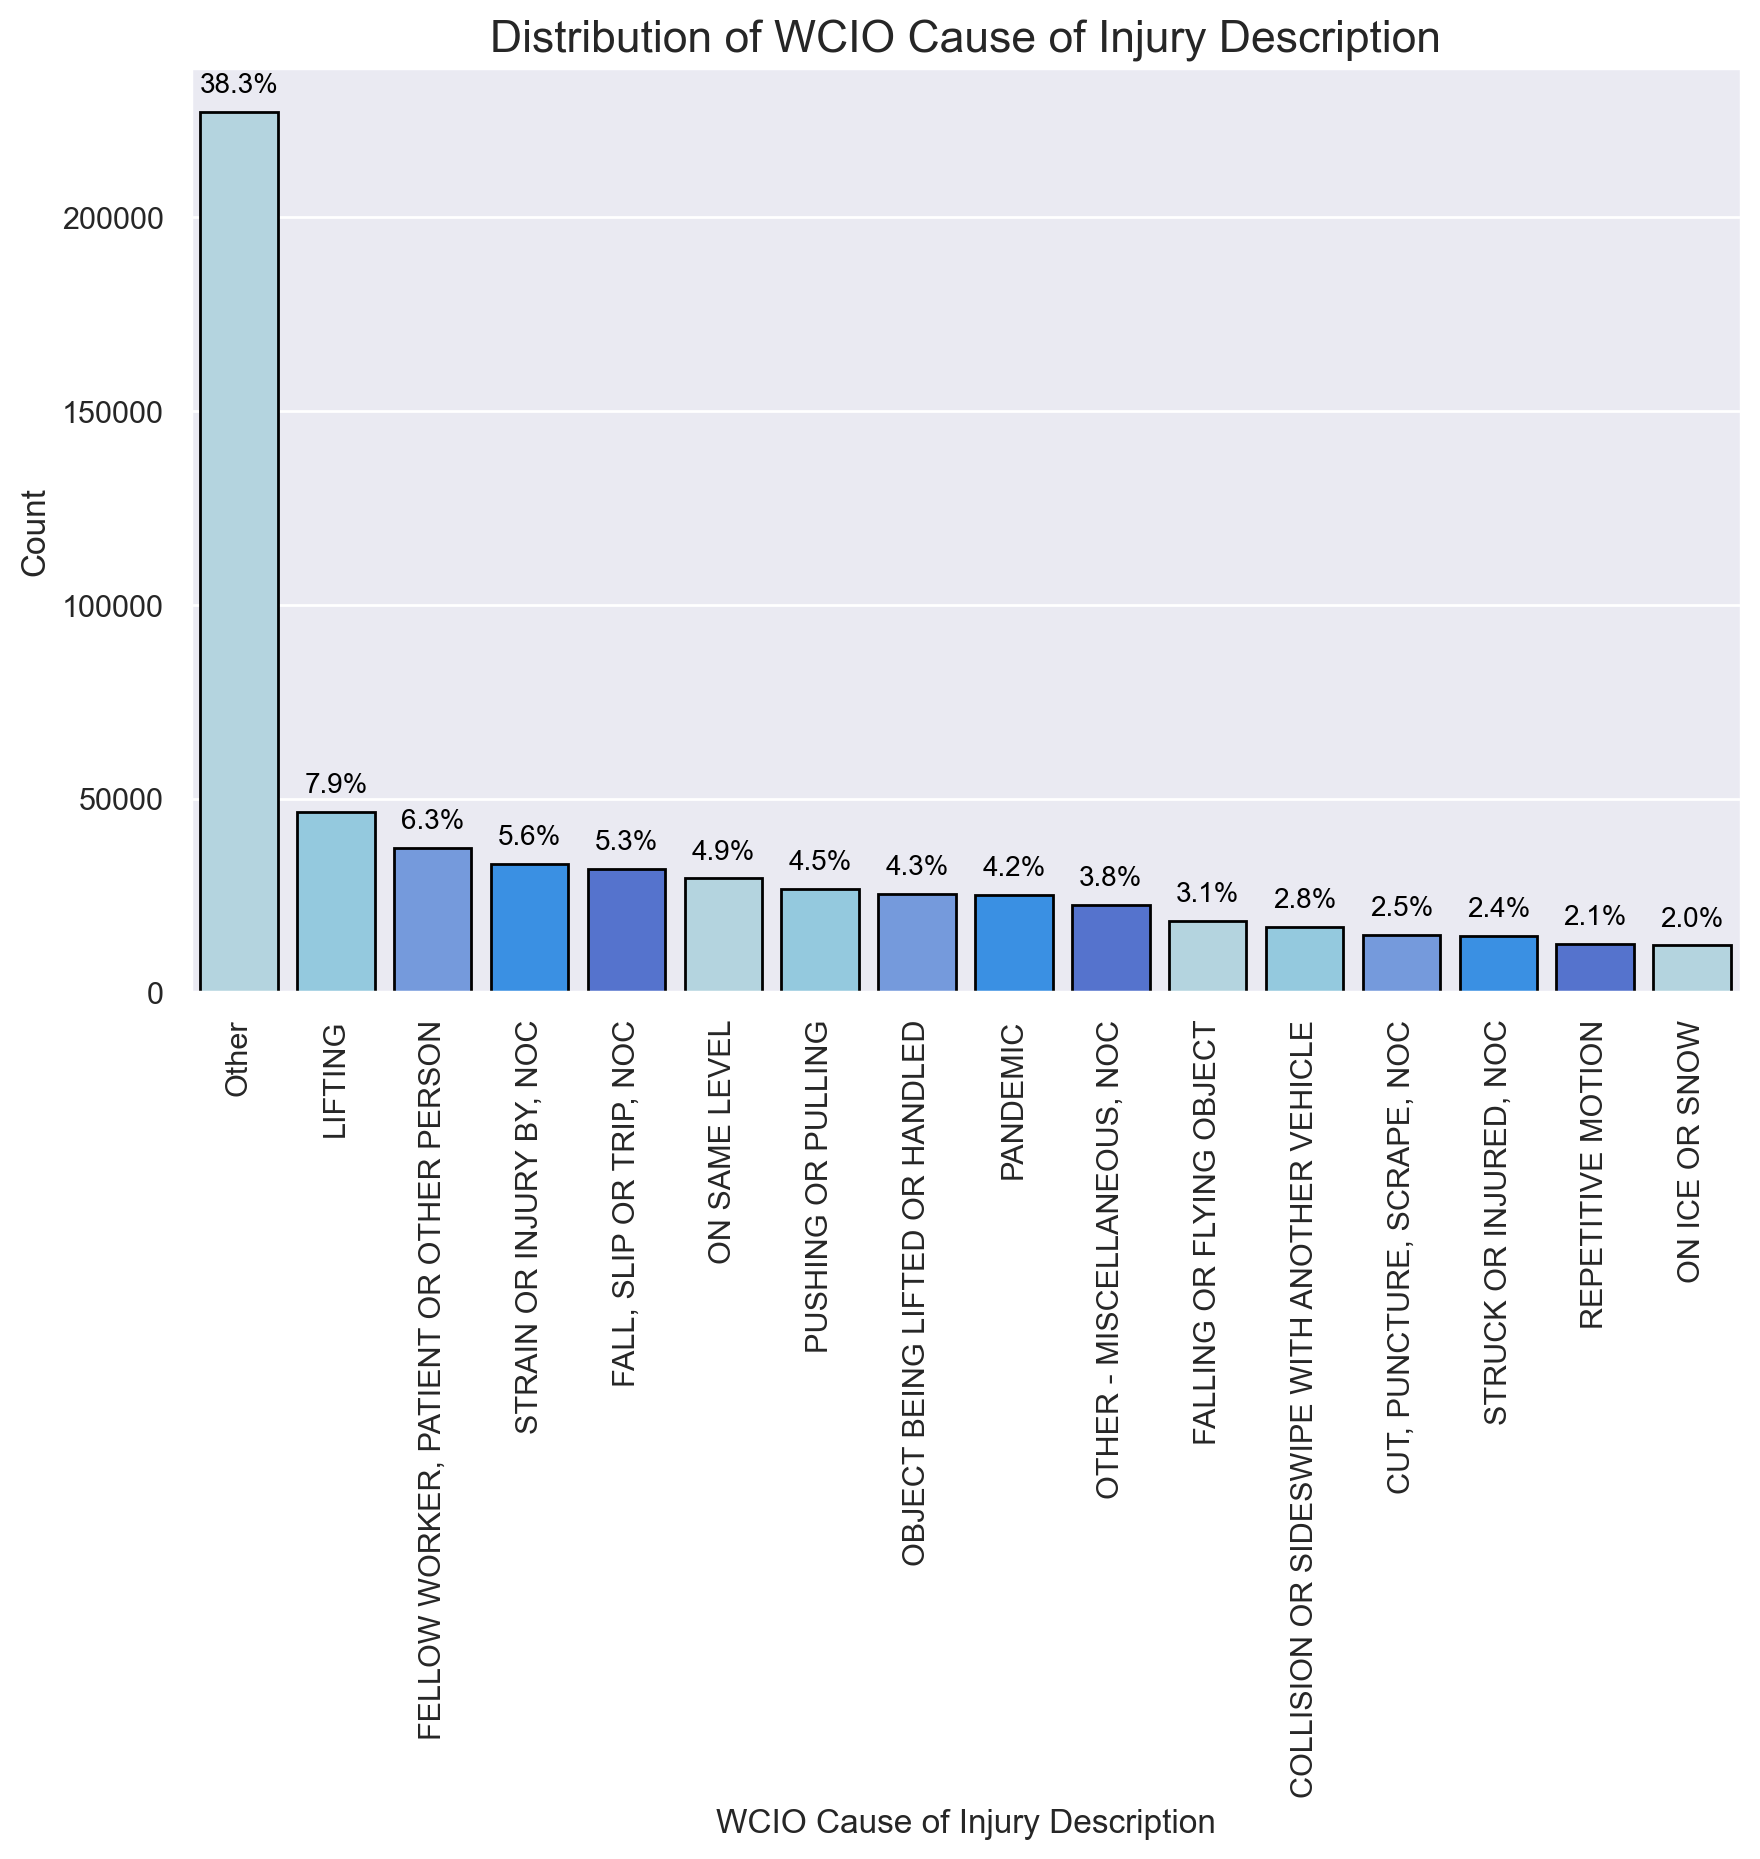

Count  Unique Top (Mode)  Frequency of Top  Missing  Missing %
0  558386      74    LIFTING             46610    35085   5.911831

In [564]:
plot_categorical_distribution(df, "WCIO Cause of Injury Description")

## **WCIO Nature of Injury Code**

**Observations on  WCIO Nature of Injury Code:**
* 35102 missing values (5.91%)
* 55 unique Nature of Injury Codes
* Most Frequent: 52
* Lowest Frequency: 7

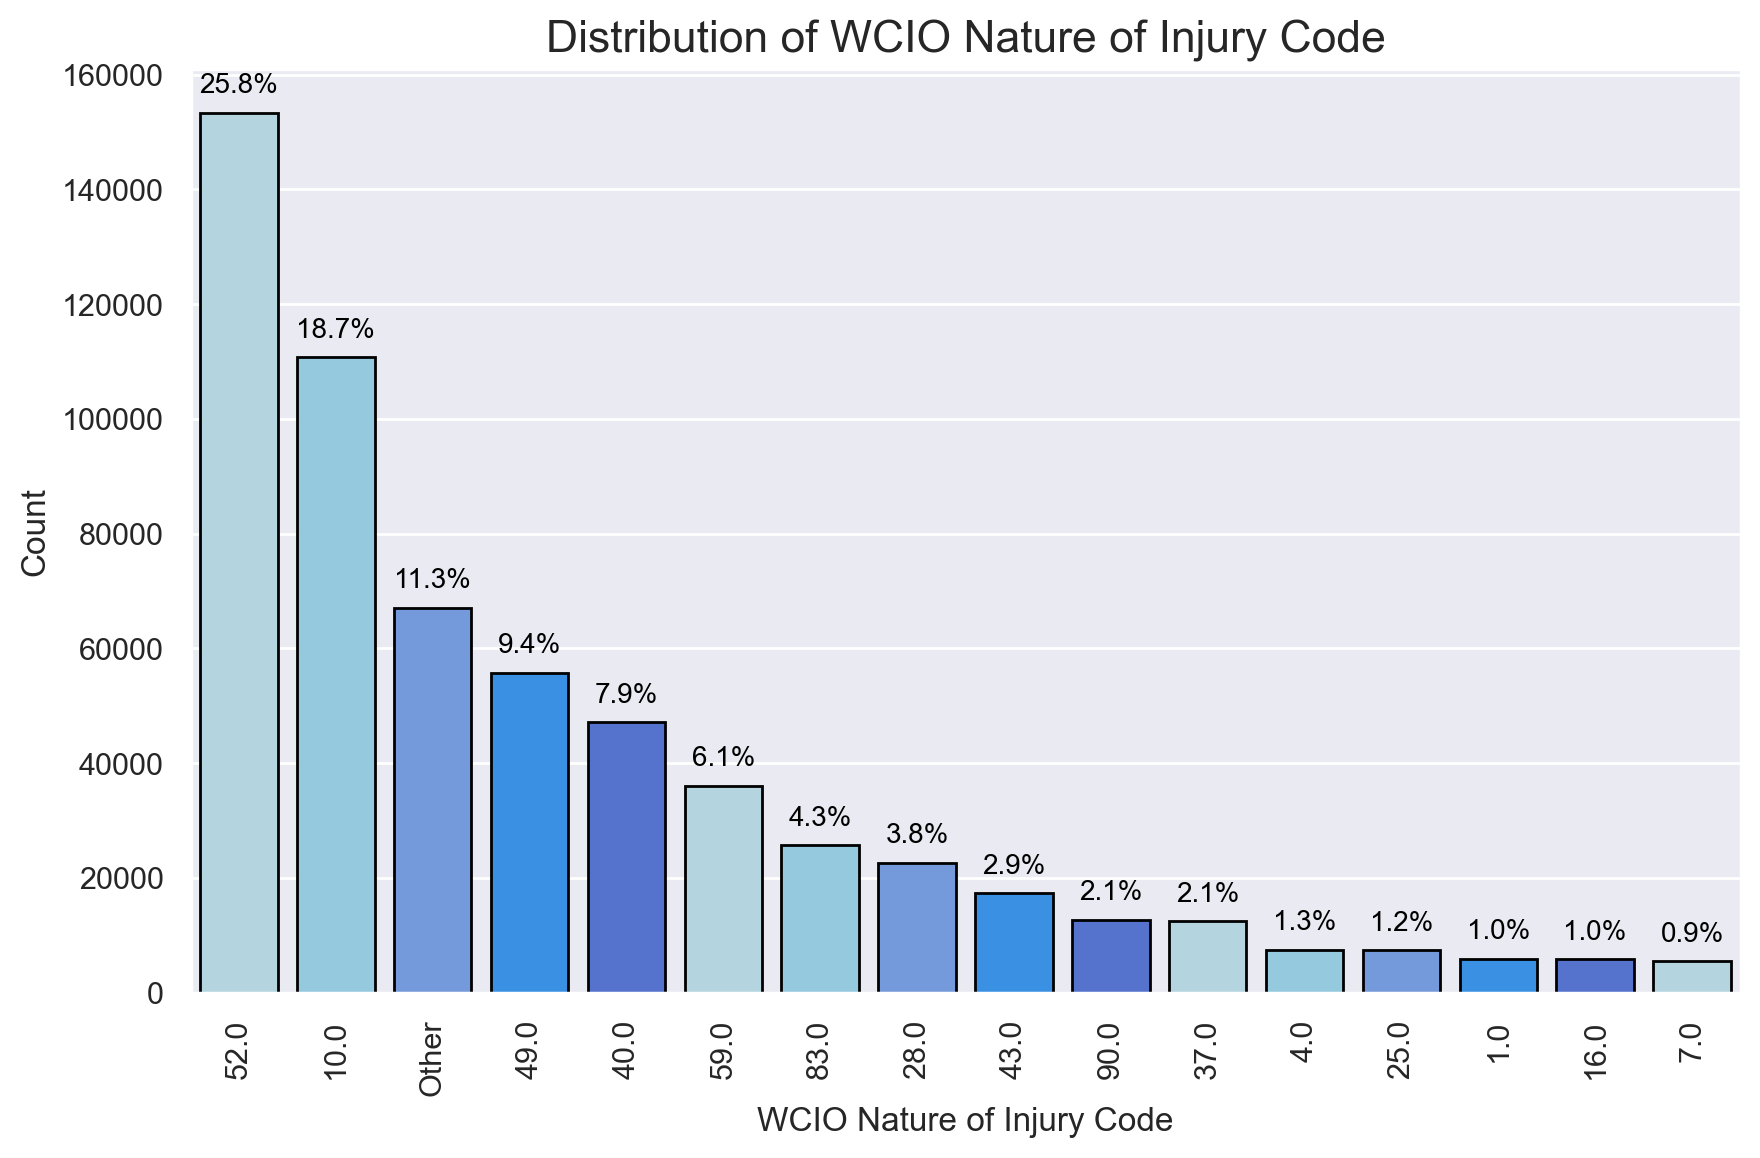

Count  Unique  Top (Mode)  Frequency of Top  Missing  Missing %
0  558369      55        52.0            153373    35102   5.914695

In [568]:
plot_categorical_distribution(df, "WCIO Nature of Injury Code")

## **WCIO Nature of Injury Description**

**Observations on WCIO Nature of Injury Description:**
* 35102 missing values (5.91%): same quantity of missing values as WCIO Nature of Injury Code
* 55 unique Nature Injury Description: same number as WCIO Nature of Injury Code
* Most Frequent: STRAIN OR TEAR
* Lowest Frequency: CONCUSSION

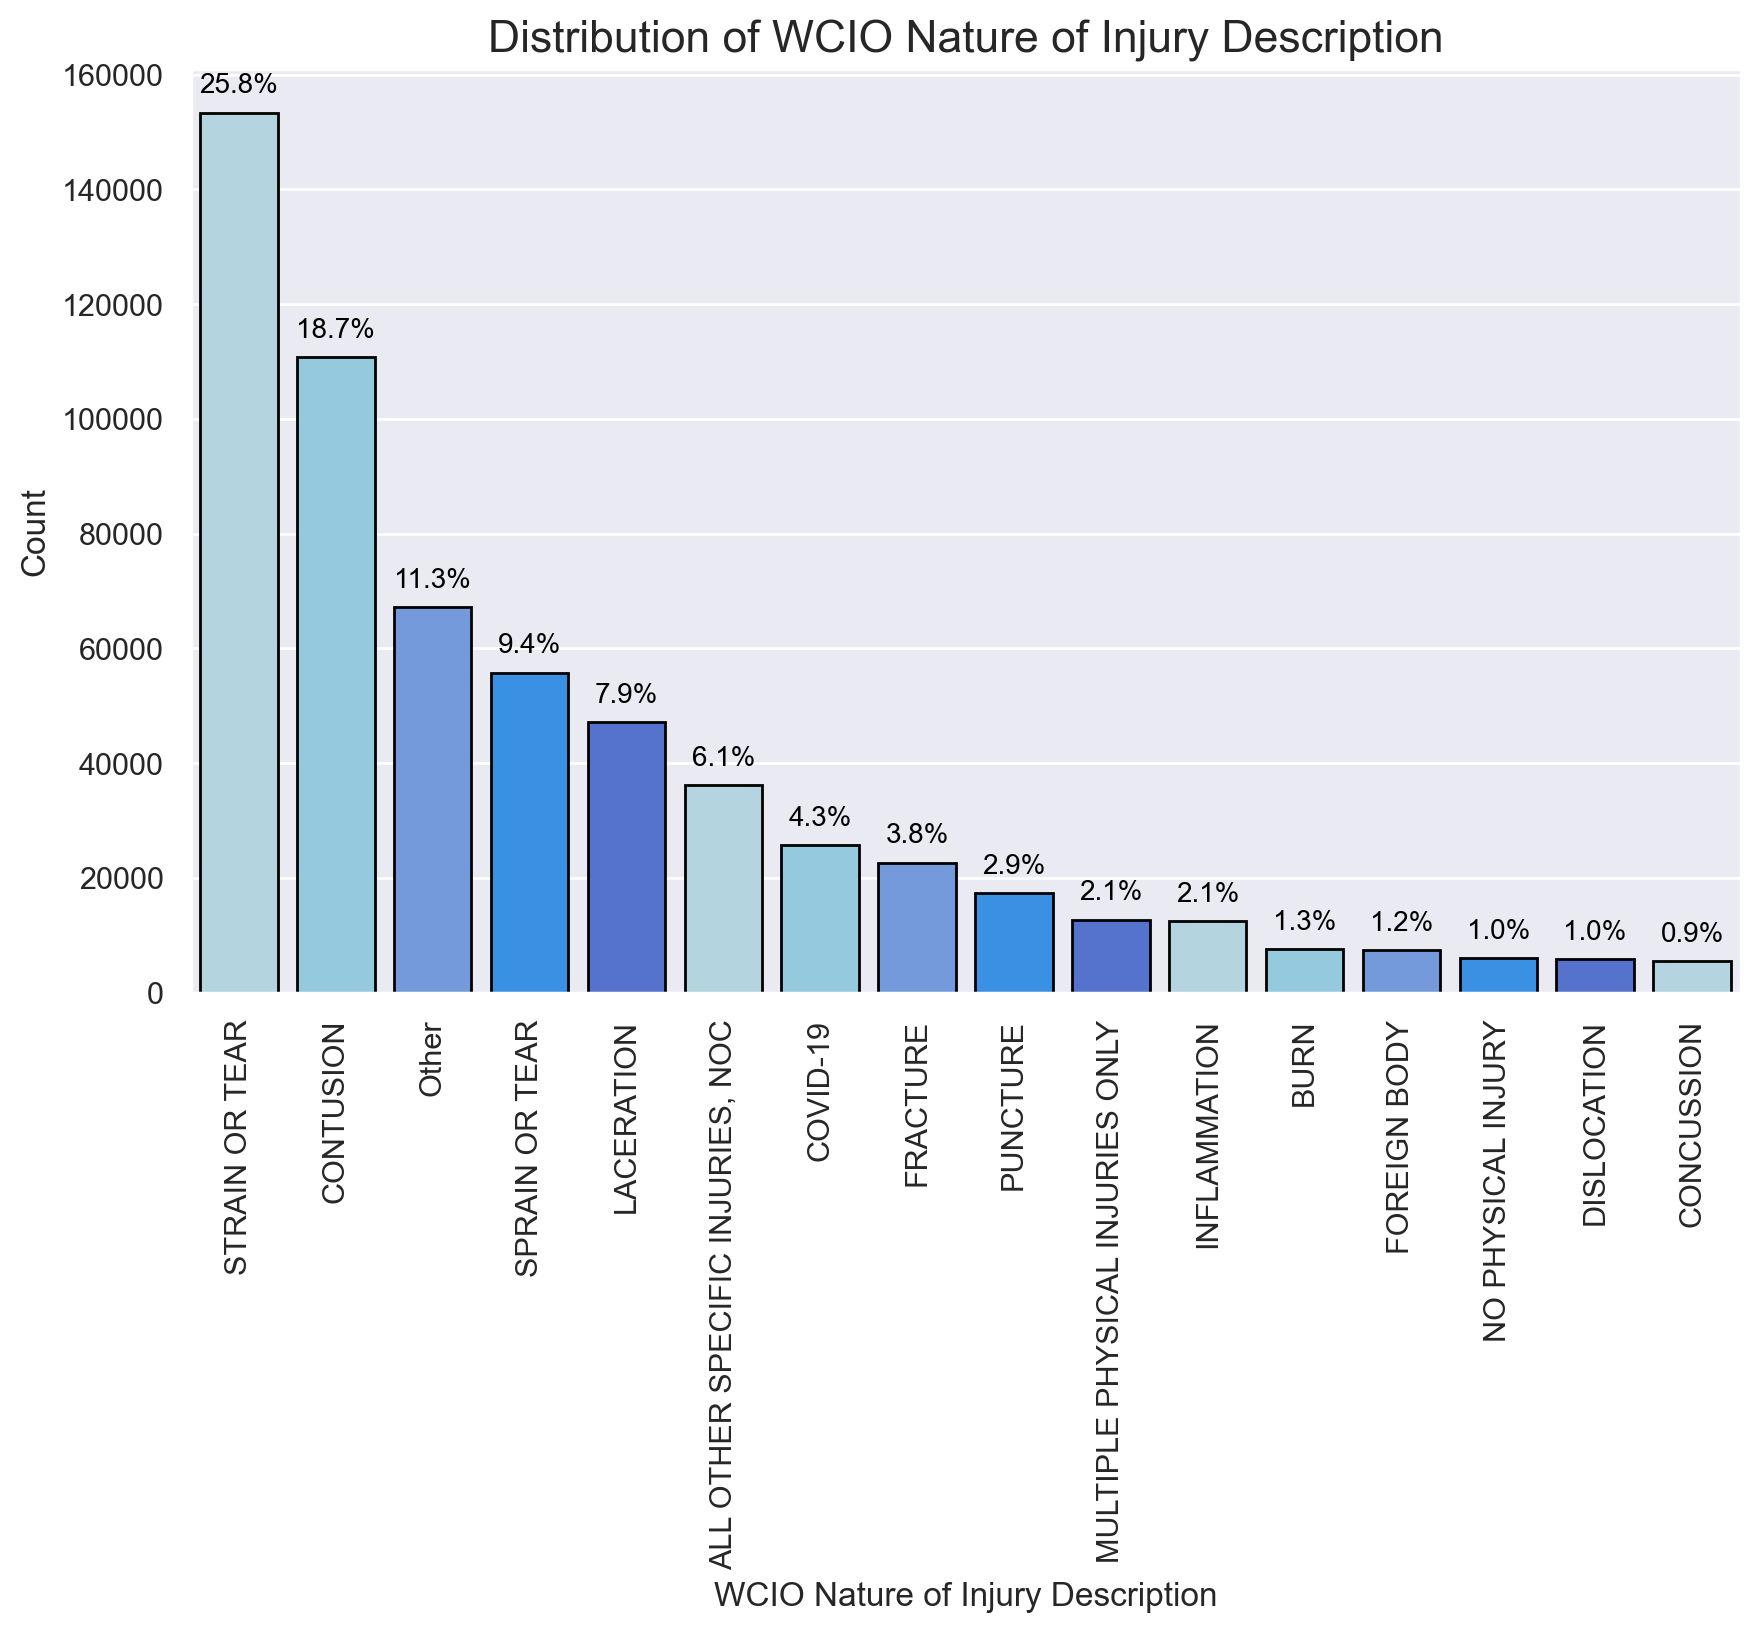

Count  Unique      Top (Mode)  Frequency of Top  Missing  Missing %
0  558369      55  STRAIN OR TEAR            153373    35102   5.914695

In [570]:
plot_categorical_distribution(df, "WCIO Nature of Injury Description")

## **WCIO Part Of Body Code**

**Observations on WCIO Part Of Body Code:**
* 36527 missing values (6.15%)
* 56 unique Parts of Body Code
* Most Frequent: 42
* Lowest Frequency: 37
* Highest Frequency: Other 

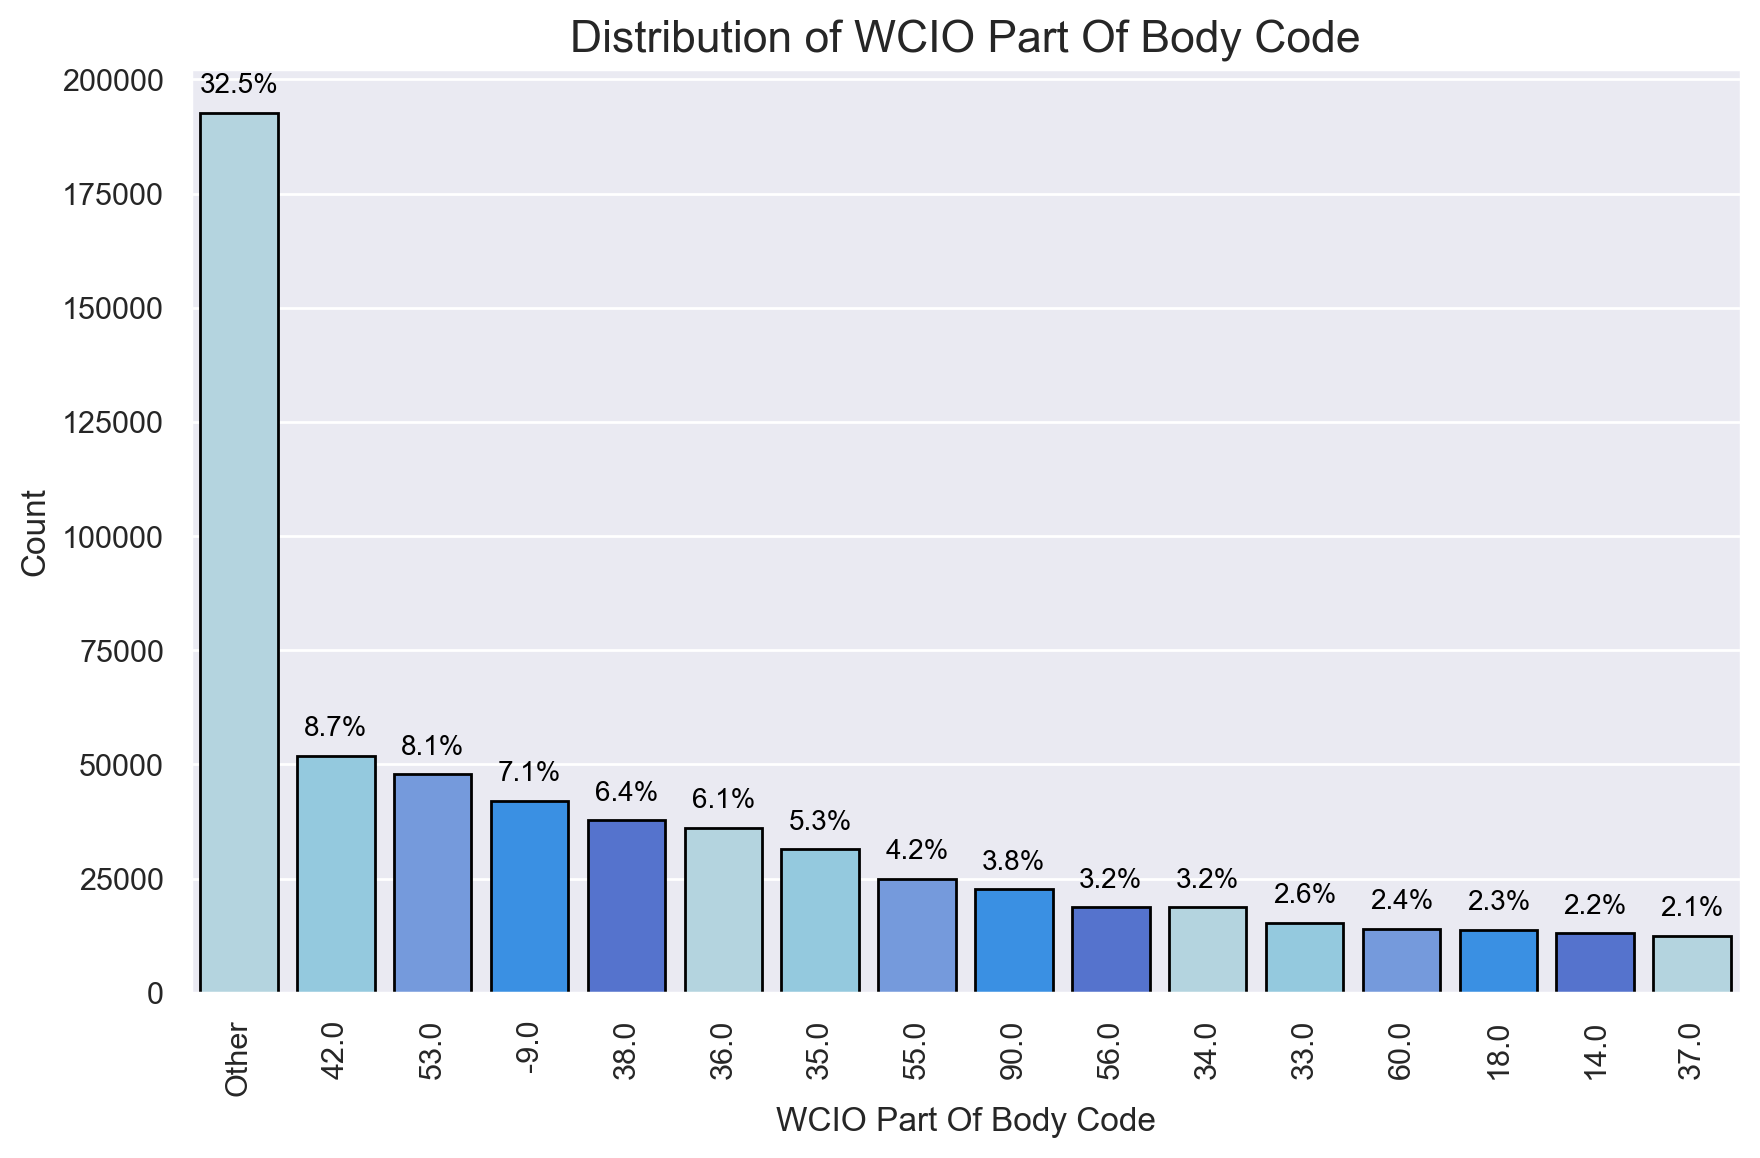

Count  Unique  Top (Mode)  Frequency of Top  Missing  Missing %
0  556944      56        42.0             51862    36527   6.154808

In [571]:
plot_categorical_distribution(df, "WCIO Part Of Body Code")

## **WCIO Part Of Body Description**

**Observations on WCIO Part Of Body Description:**
* 36527 missing values (6.15%): same quantity of missing values as WCIO Part Of Body Code
* 54 unique Descriptions: to have a correspondence, they should be the same as in Code, which they are not
* Most Frequent: LOWER BACK AREA
* Highest Frequency: Other
* Lowest Frequency: THUMB 

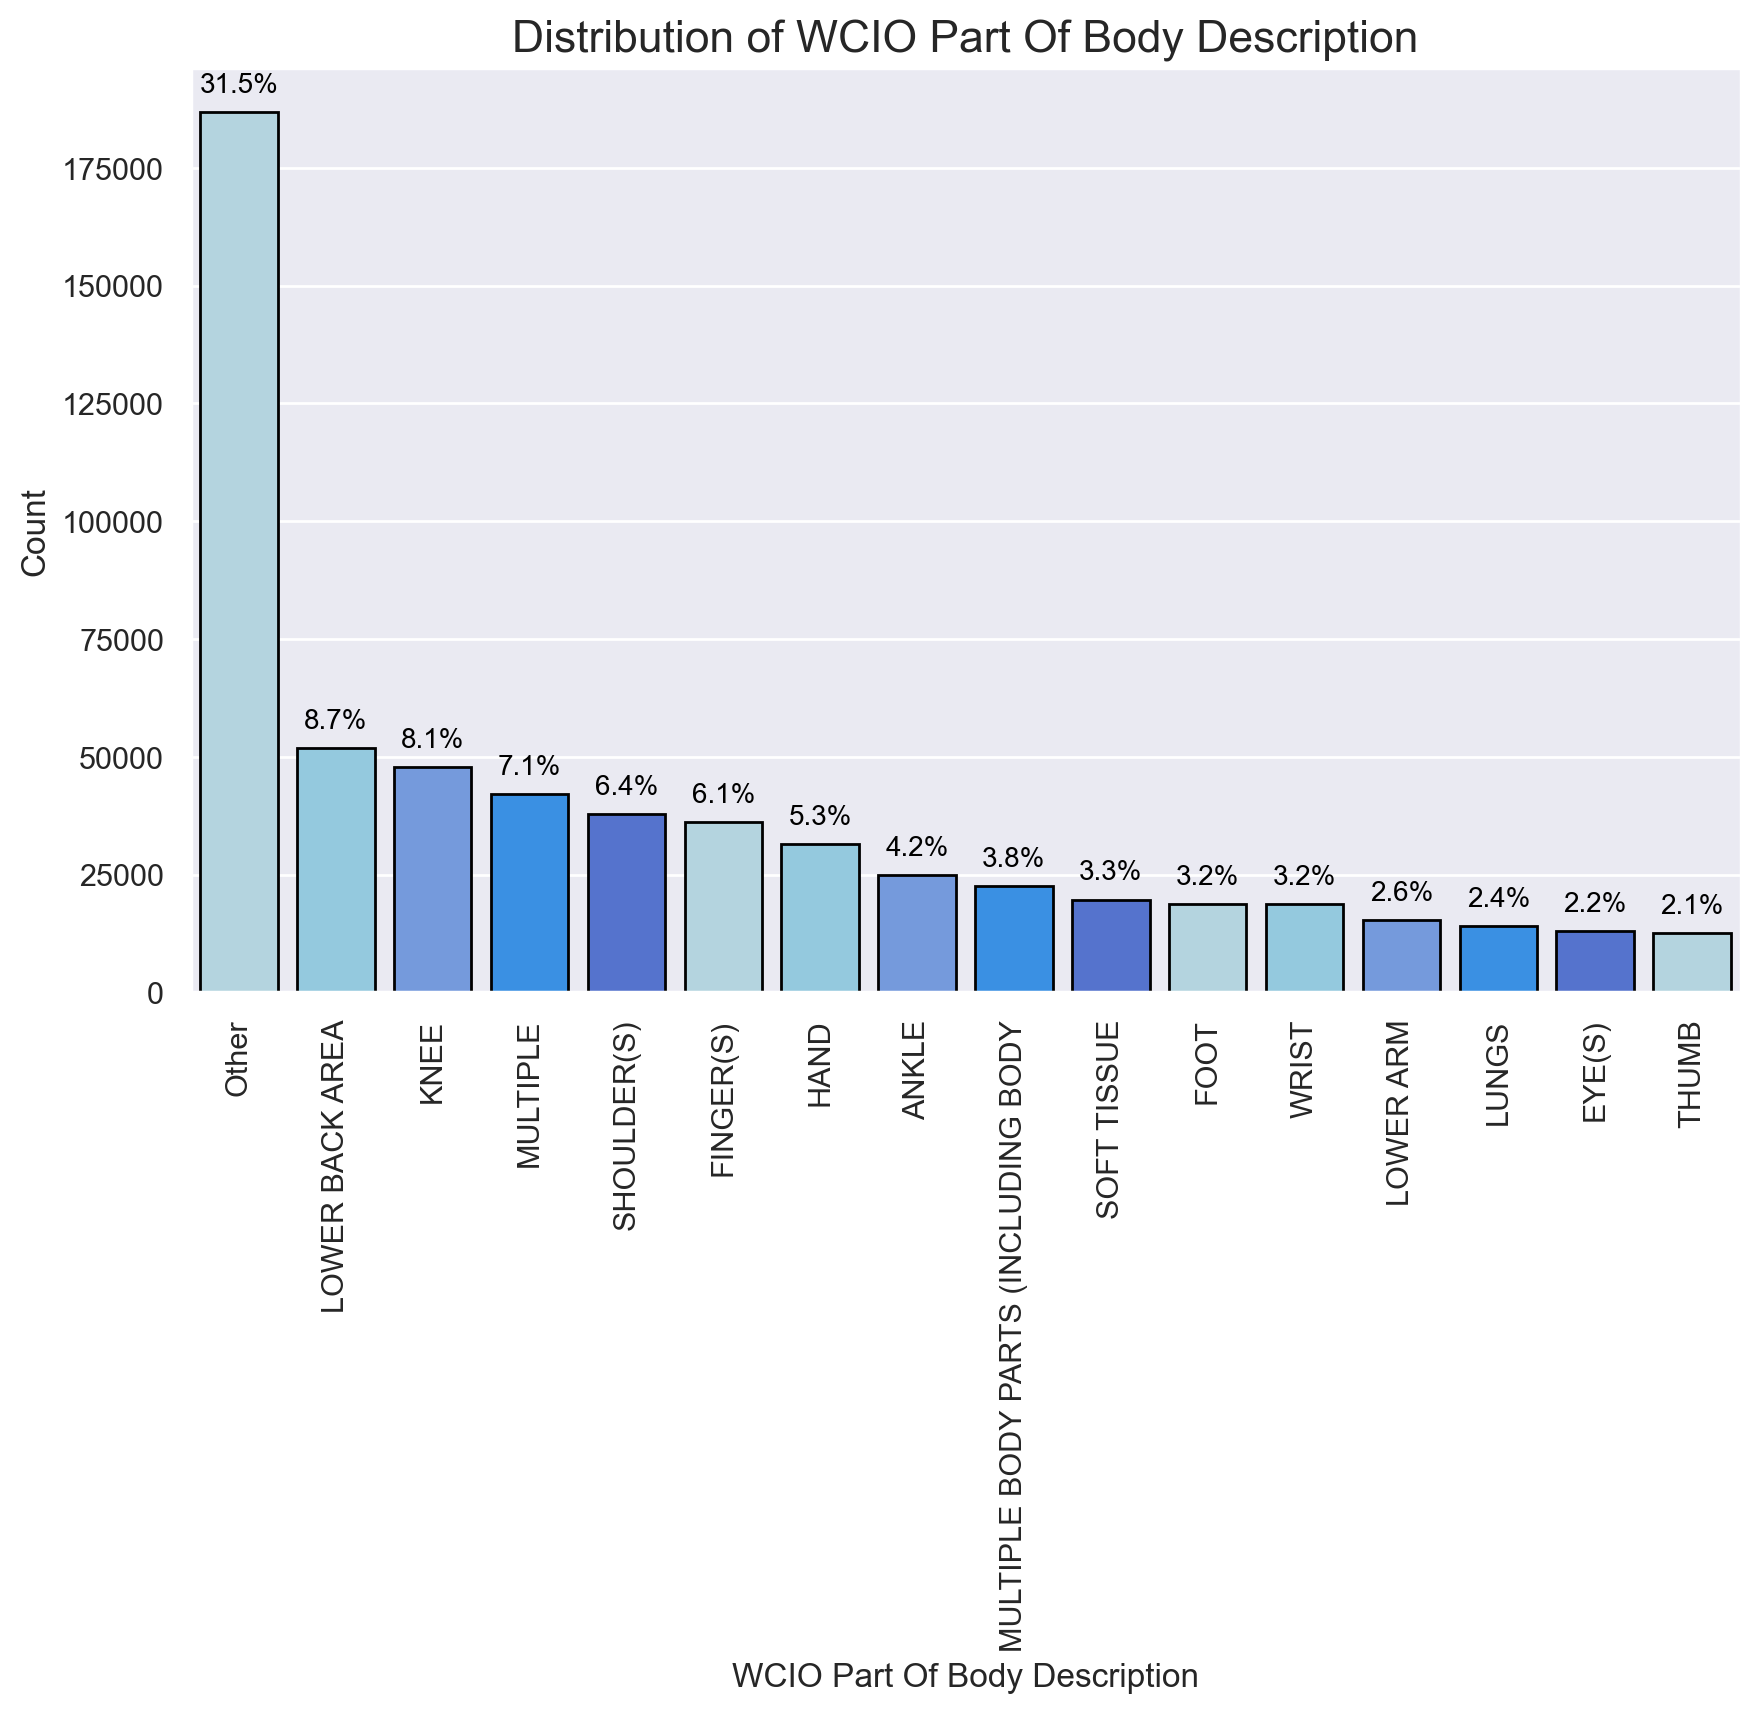

Count  Unique       Top (Mode)  Frequency of Top  Missing  Missing %
0  556944      54  LOWER BACK AREA             51862    36527   6.154808

In [573]:
plot_categorical_distribution(df, "WCIO Part Of Body Description")

## **Zip Code**

**Observations on Zip Code:**
* 48082 missing values (8.10%)
* 651 unique Zip-Codes
* Most Frequent: 11236
* Highest Frequency: Other
* Lowest Frequency: 11203

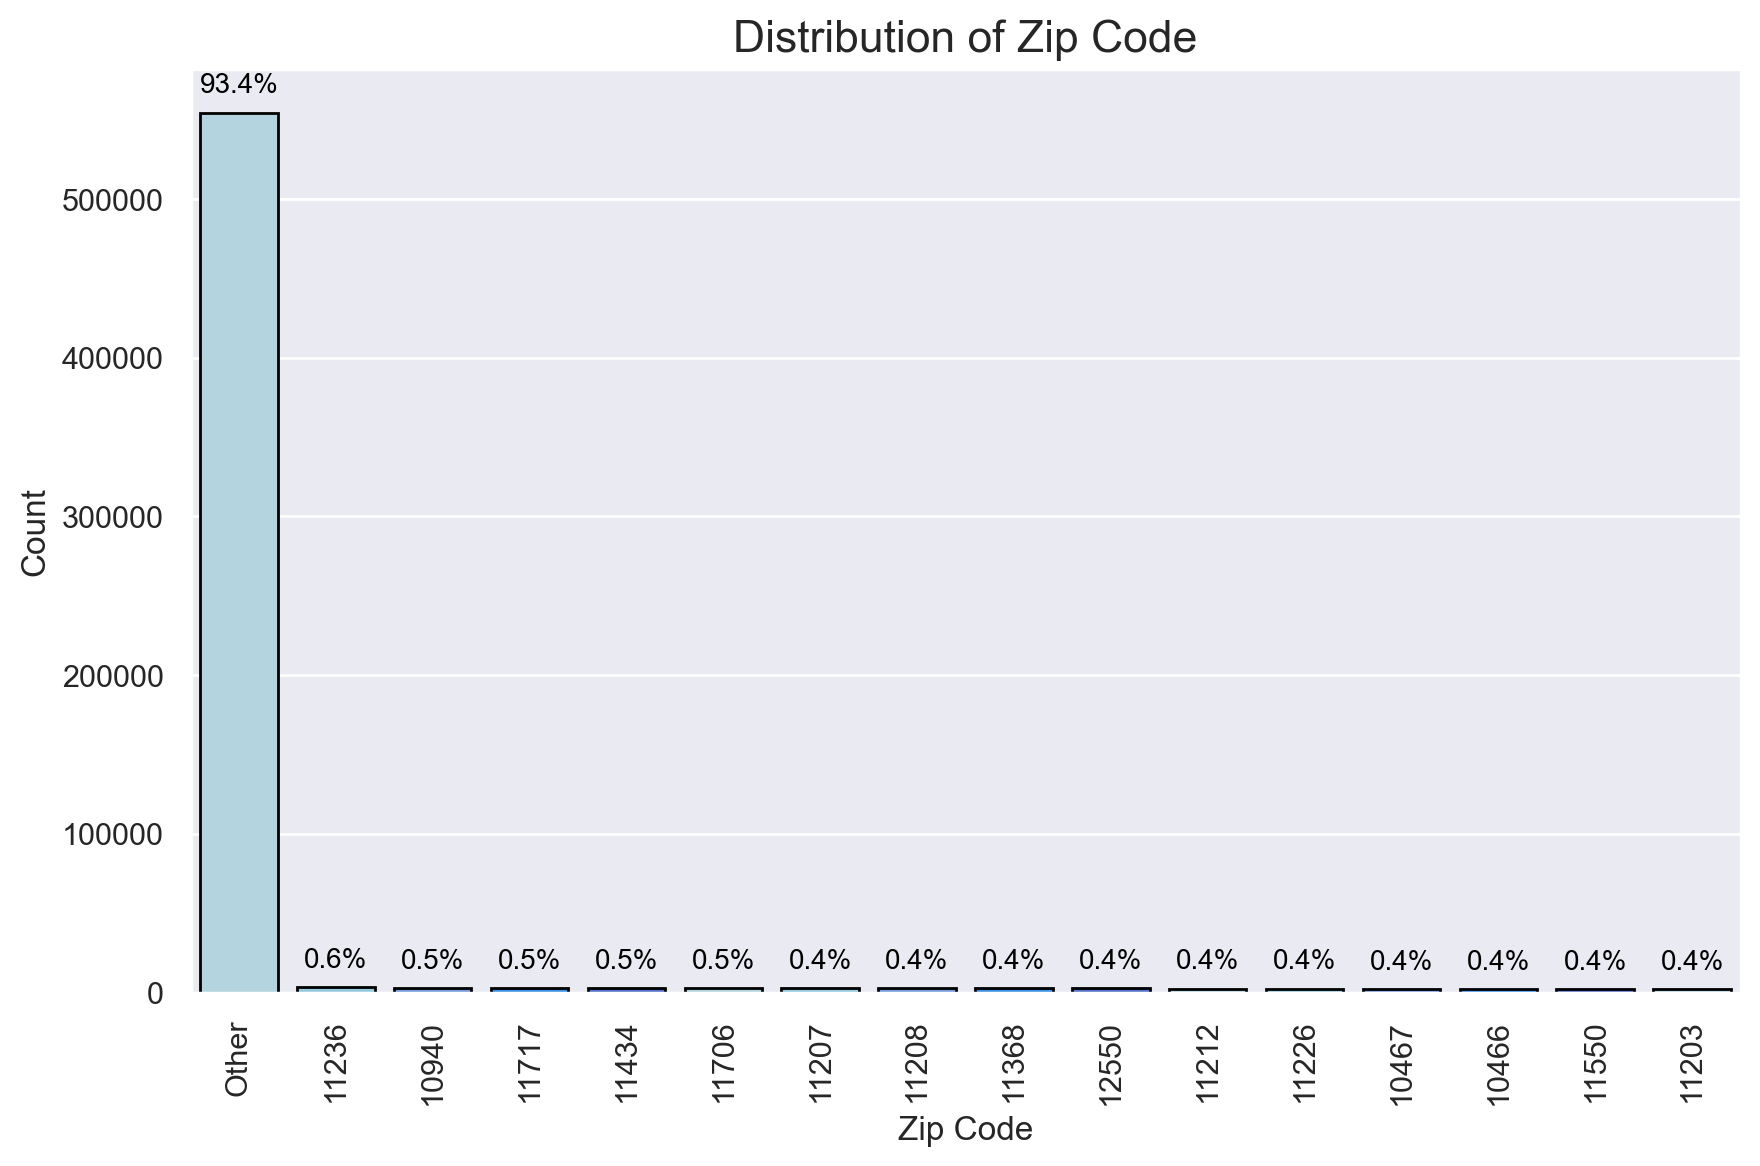

Count  Unique Top (Mode)  Frequency of Top  Missing  Missing %
0  545389     651      11236              3302    48082   8.101828

In [576]:
plot_categorical_distribution(df, "Zip Code")

## **Claim Injury Type**

**Observations on Claim Injury Type:**
* 19445 missing values (3.28%)
* 8 unique Claim Injury Types
* Most Frequent: 2. NON-COMP
* Lowest Frequency: 7. PTD

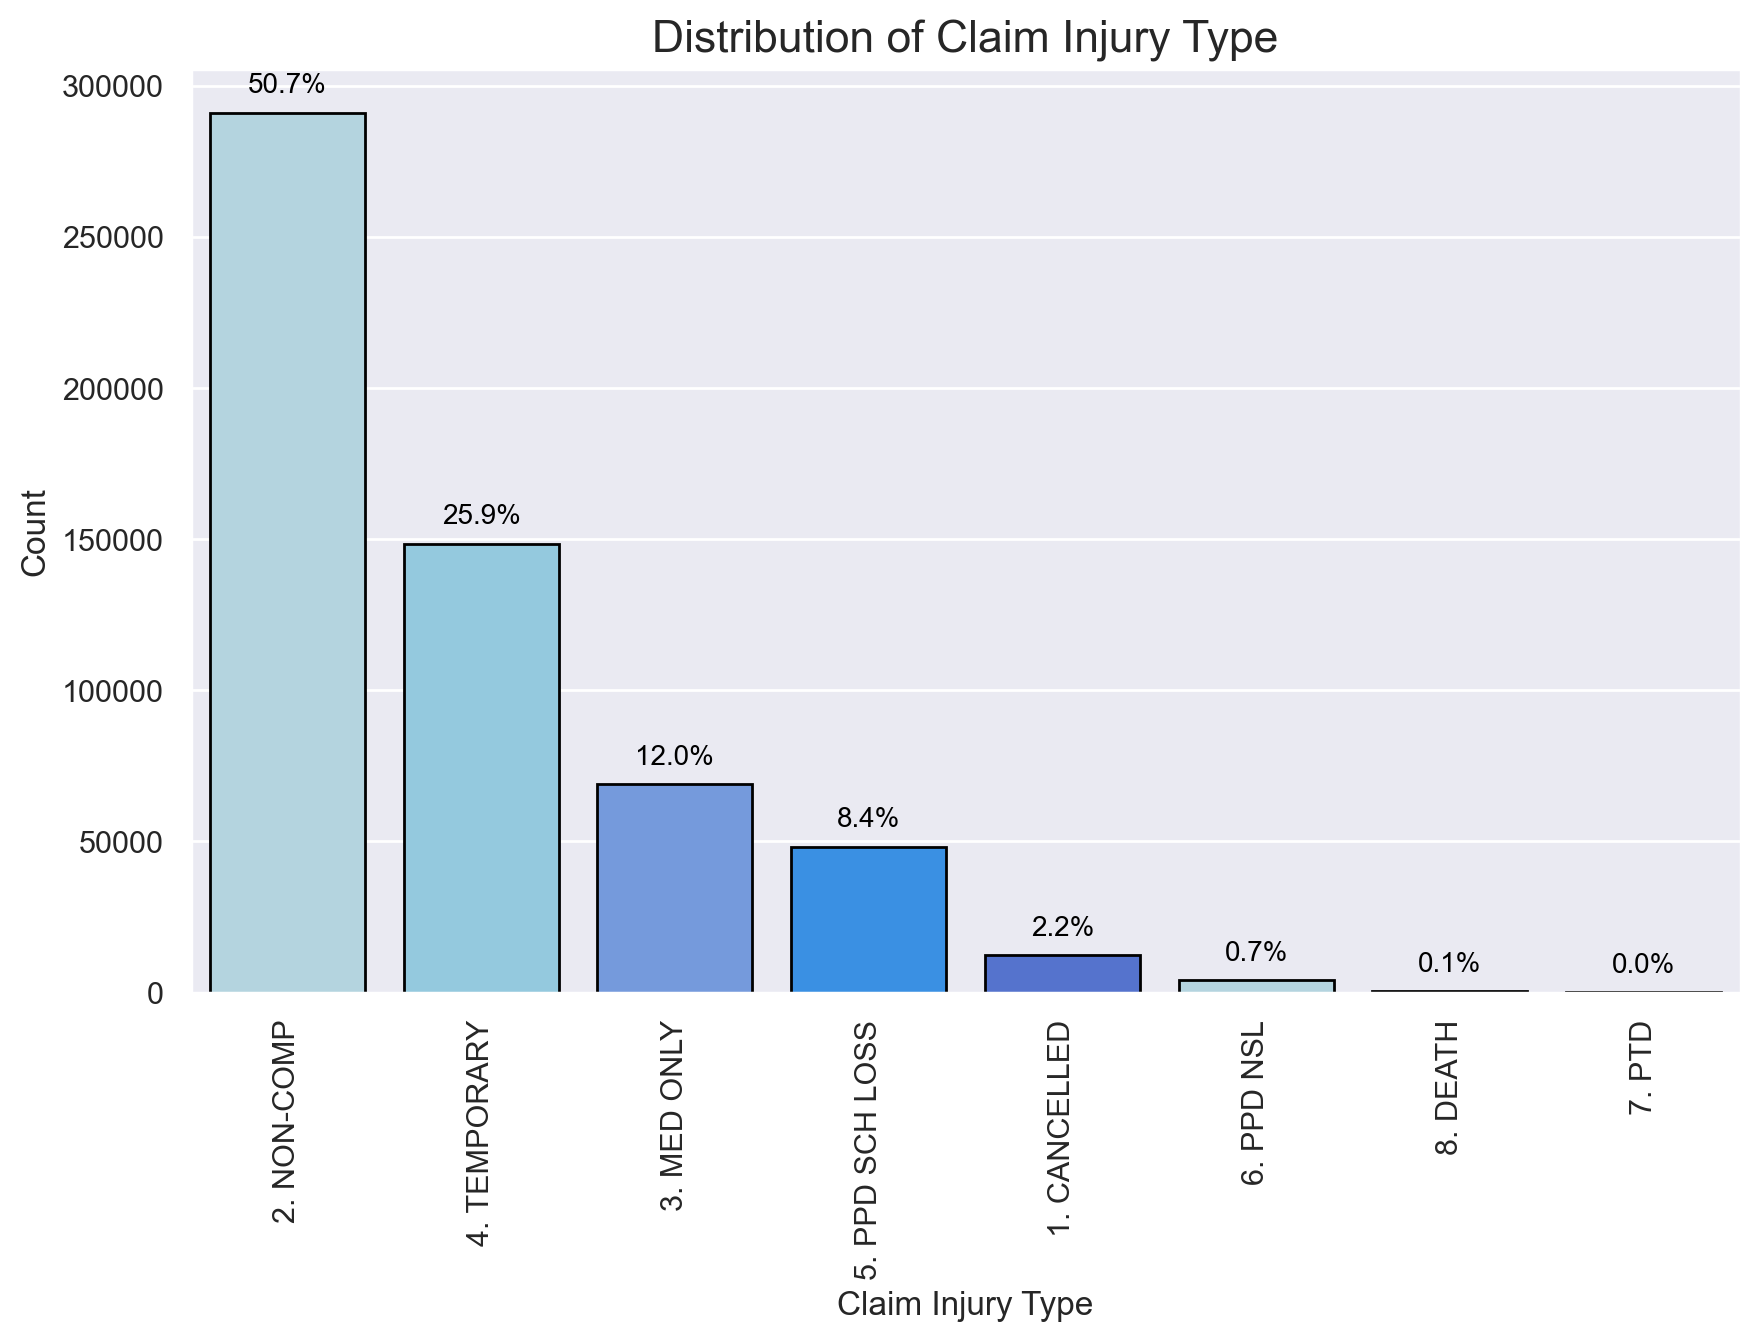

Count  Unique   Top (Mode)  Frequency of Top  Missing  Missing %
0  574026       8  2. NON-COMP            291078    19445   3.276487

In [578]:
plot_categorical_distribution(df, 'Claim Injury Type')

## **Number of Dependents**

**Observations on Number of Dependents:**
* 19445 missing values (3.28%)
* 81665 zeros (13.76%)
* Mean: 3
* Minimum: 0
* Maximum: 6

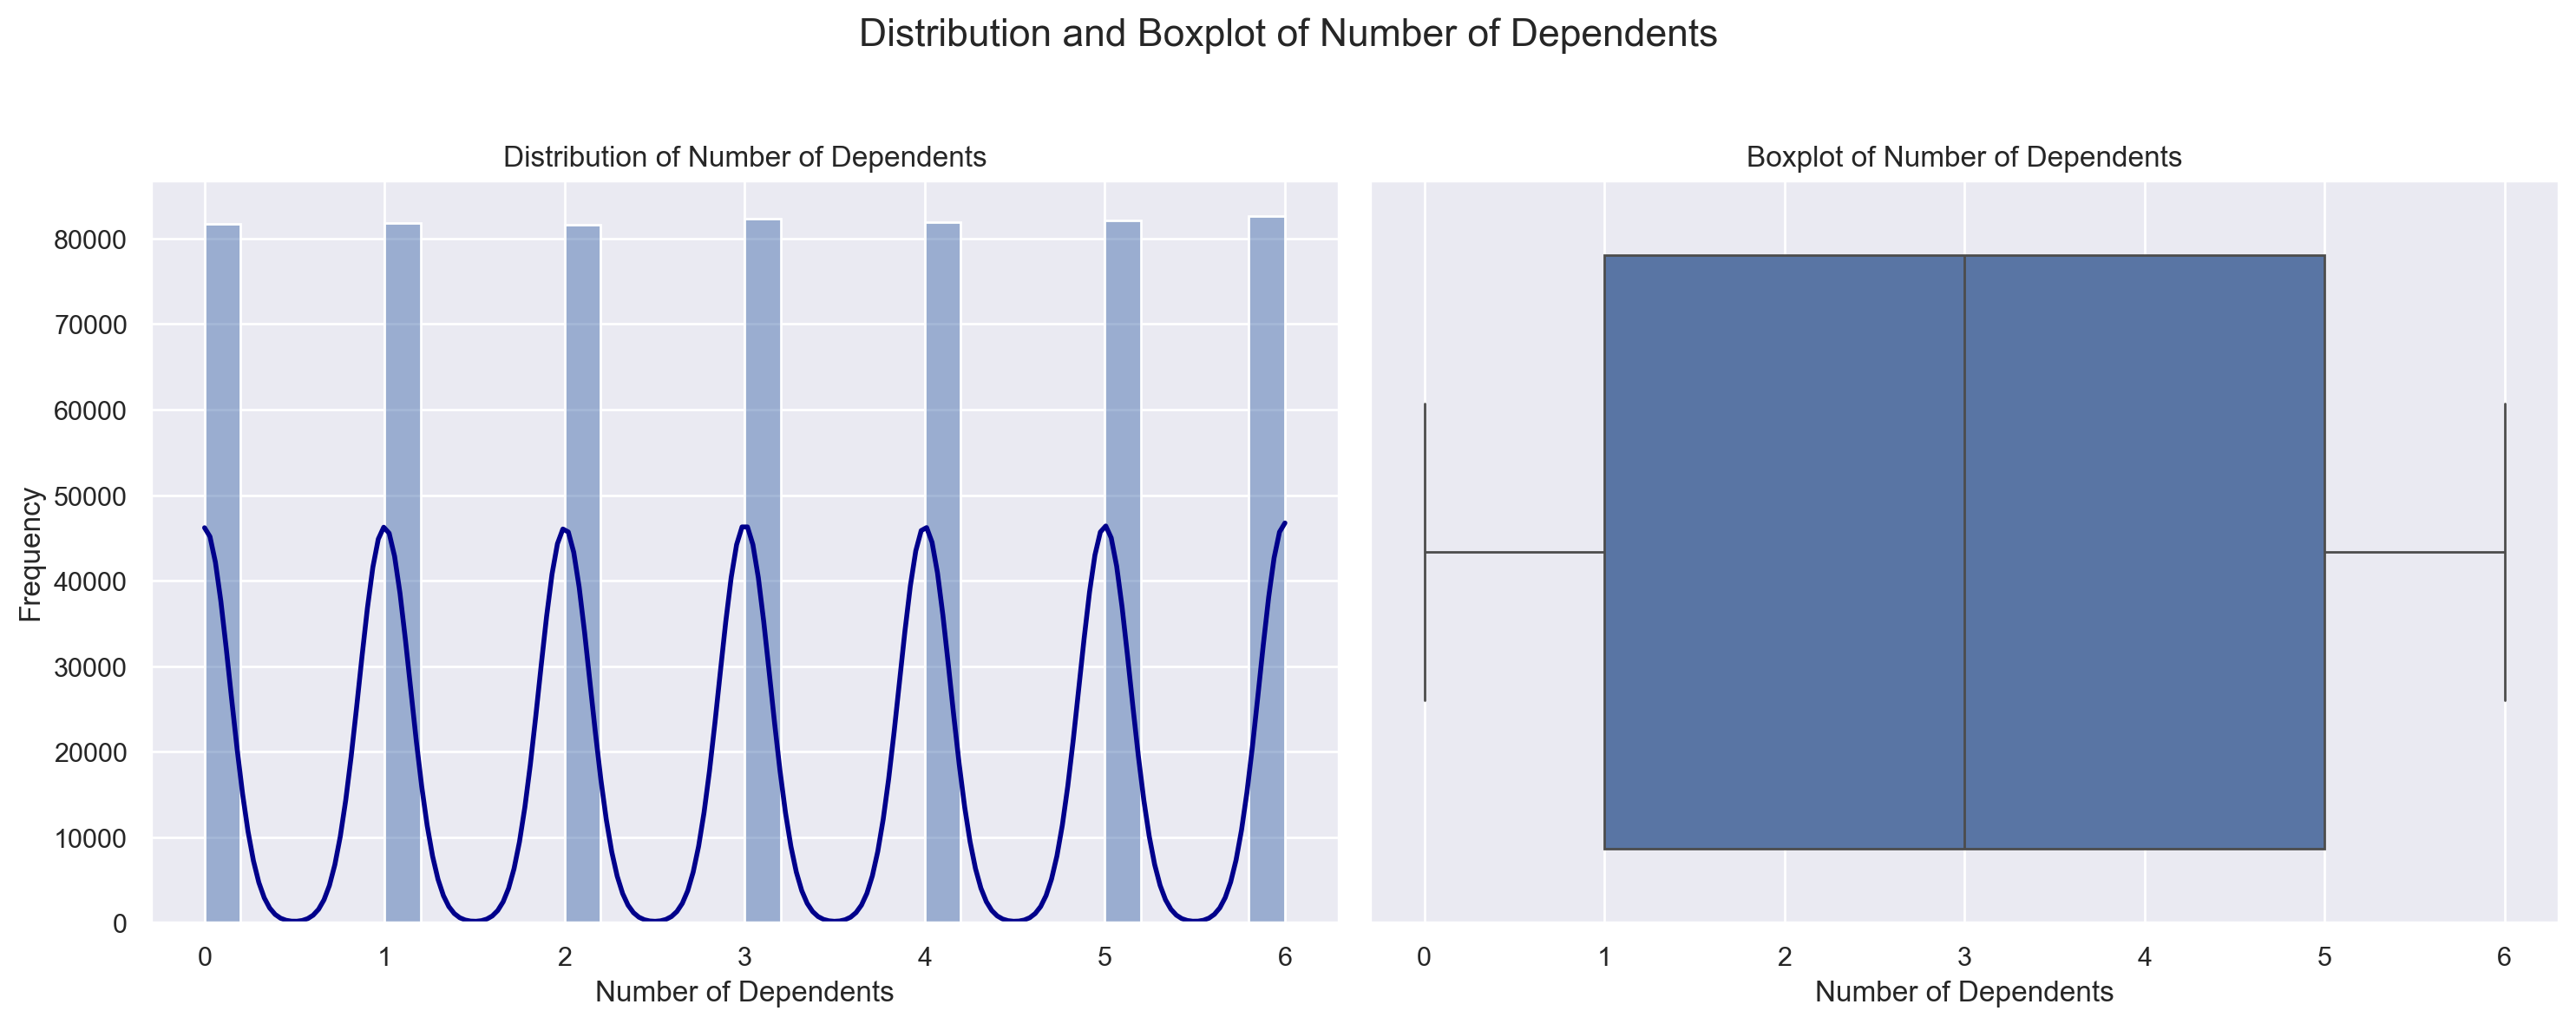

In [579]:
plot_distribution_and_boxplot(df, 'Number of Dependents')

In [582]:
describe_features(df, 'Number of Dependents')

count      mean       std  min  25%  50%  75%  max  \
Number of Dependents  574026.0  3.006559  2.000801  0.0  1.0  3.0  5.0  6.0   

                      missing  missing%  zeros     zeros%  
Number of Dependents    19445  3.276487  81665  13.760571

## 2.3 Multivariate Analysis <a id="multivariate_analysis"></a>

## **Age at Injury vs Gender**

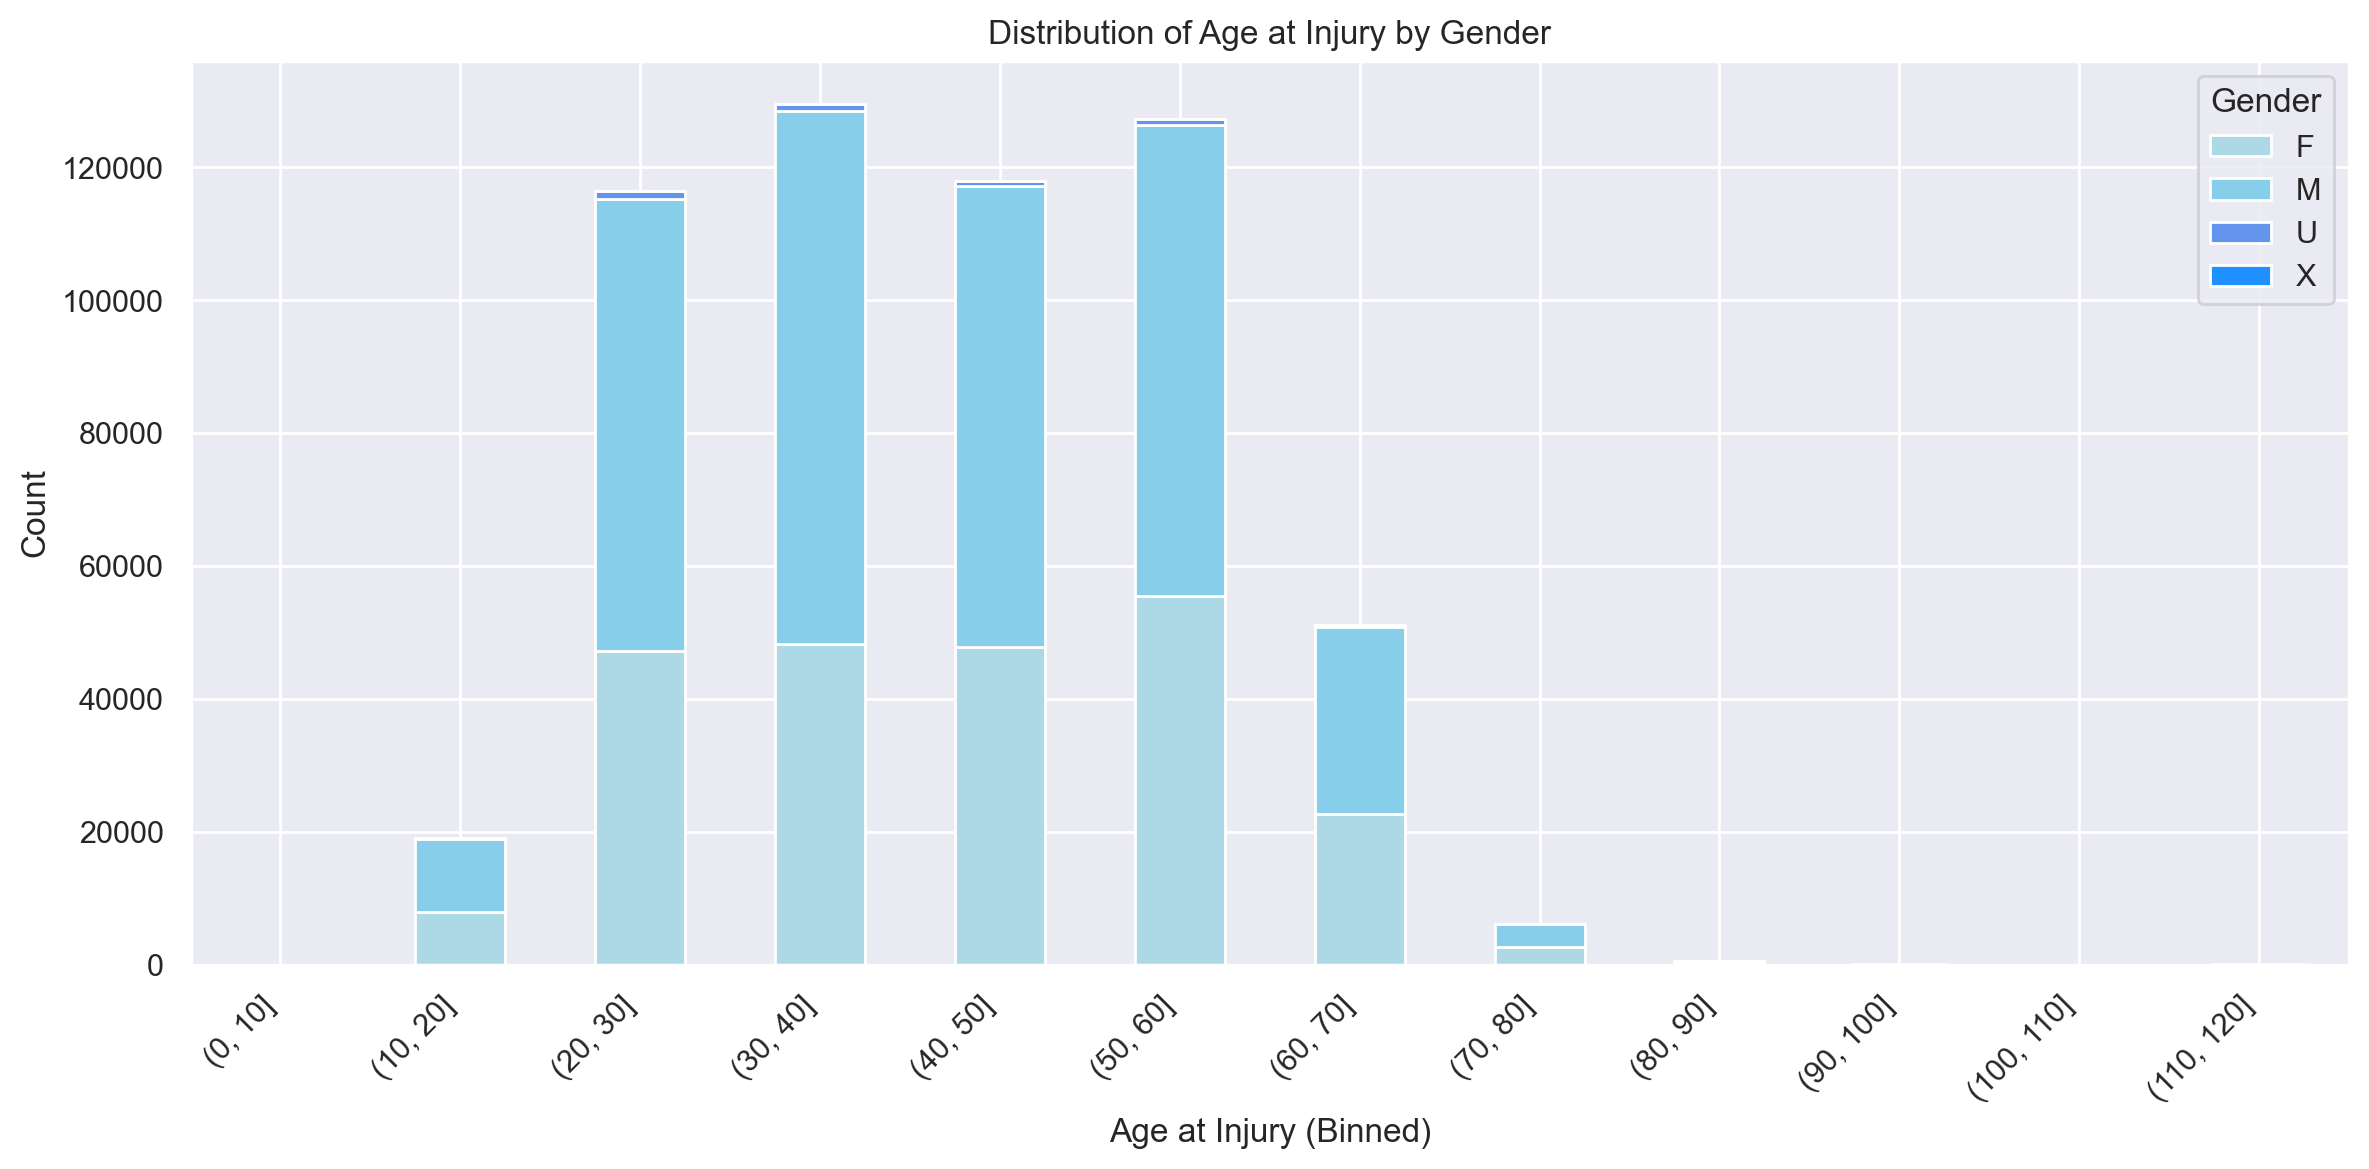

In [584]:
cat1 = 'Age at Injury'
cat2 = 'Gender'

catpc_df = df.groupby([pd.cut(df[cat1], bins=range(0, int(df[cat1].max()) + 10, 10)), cat2], observed=False).size().unstack(fill_value=0)

catpc_df.plot(kind='bar', stacked=True, figsize=(12, 6), color = ["#ADD8E6", "#87CEEB", "#6495ED", "#1E90FF", "#4169E1", "#00BFFF", "#4682B4", "#5F9EA0"])

plt.title("Distribution of Age at Injury by Gender")
plt.xlabel("Age at Injury (Binned)")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Gender")

plt.tight_layout()
plt.show()

**Interpretation:**
* Data ranging from (10,80]
* Significantly, there are more men than other genders in most cases
* U is only present between (20,60]

## **Gender vs WCIO Nature of Injury Description**

<Figure size 1400x600 with 0 Axes>

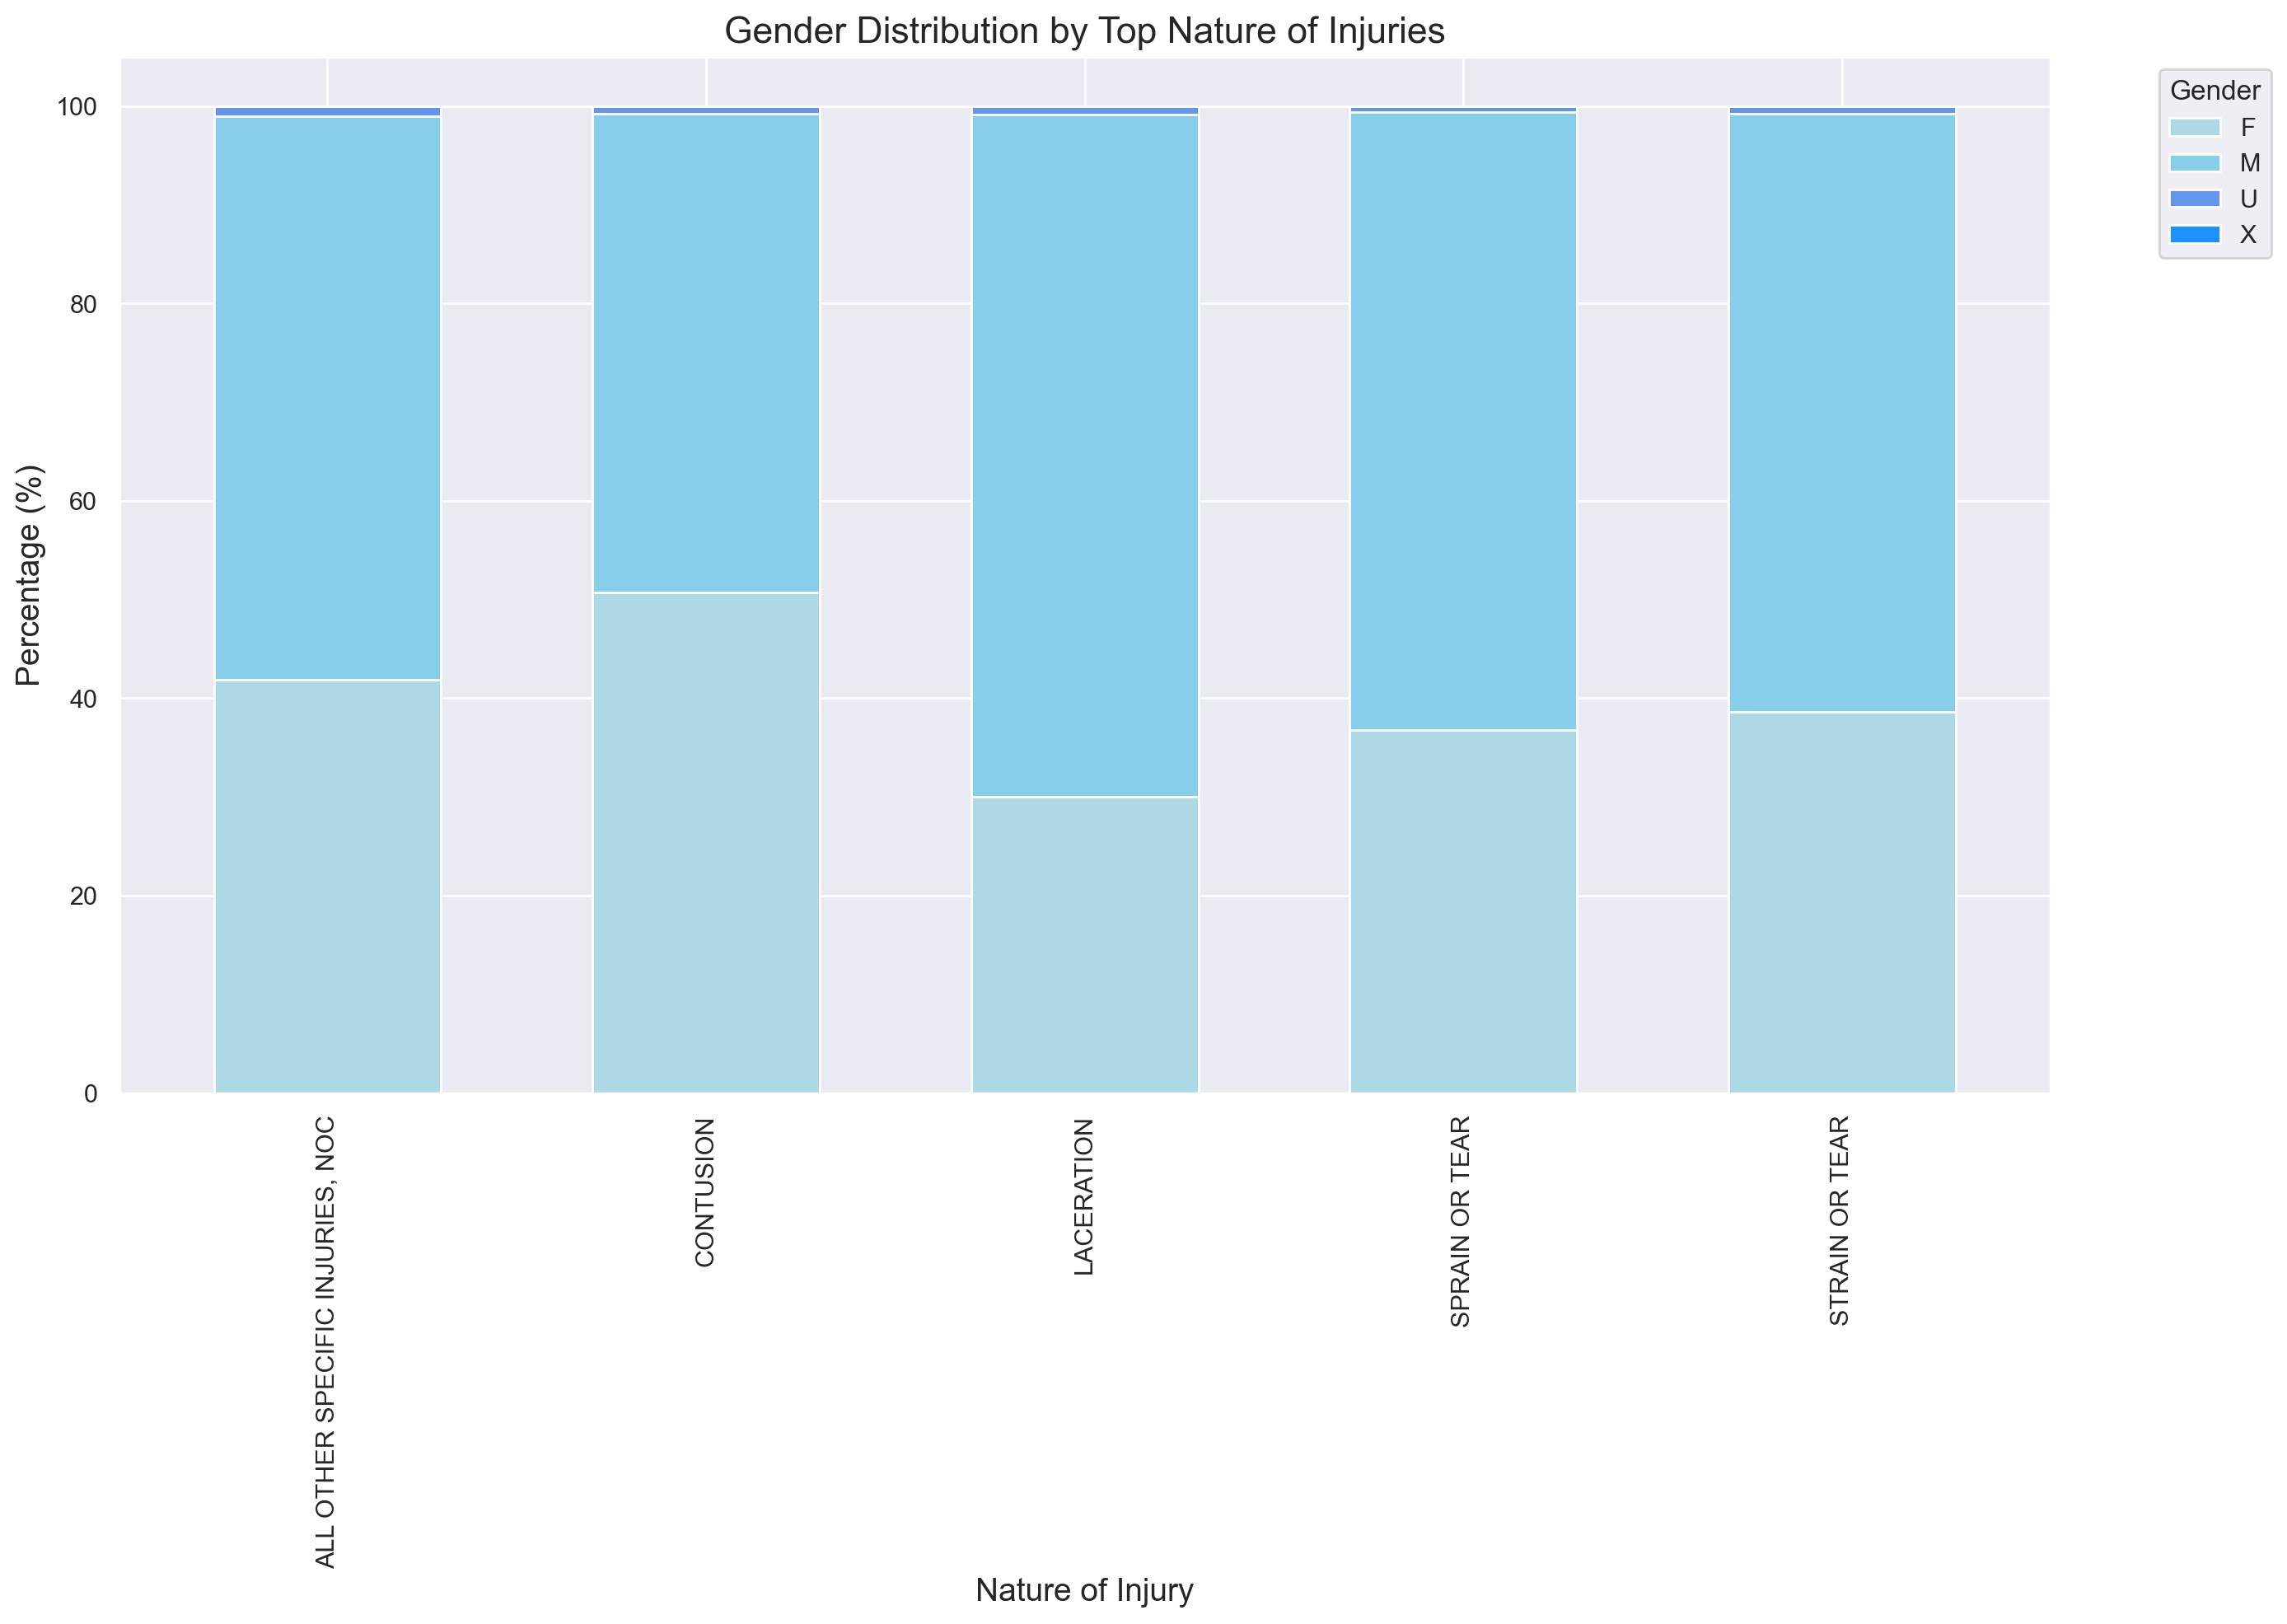

In [586]:
plt.figure(figsize=(14, 6))

top_injuries = df['WCIO Nature of Injury Description'].value_counts().head(5).index

injury_subset = df[
    df['WCIO Nature of Injury Description'].isin(top_injuries)
]

injury_gender = pd.crosstab(
    injury_subset['WCIO Nature of Injury Description'],
    injury_subset['Gender'],
    normalize='index'
) * 100

ax = injury_gender.plot(kind='bar', stacked=True, color=["#ADD8E6", "#87CEEB", "#6495ED", "#1E90FF", "#4169E1", "#00BFFF", "#4682B4", "#5F9EA0"], width=0.6, figsize=(14, 10))
plt.title('Gender Distribution by Top Nature of Injuries', fontsize=16)
plt.xlabel('Nature of Injury', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=90, ha='center')  
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left') 


plt.tight_layout()
plt.show()

**Interpretation:**
* Most of the injuries occur in males, with one exception: in CONTUSION, the distribution is approximately 50/50
* U (Unknown) represents a small percentage of the Nature of Injuries
* X is not present in any Nature of Injuries

## **Gender vs Claim Injury Type**

<Figure size 1400x600 with 0 Axes>

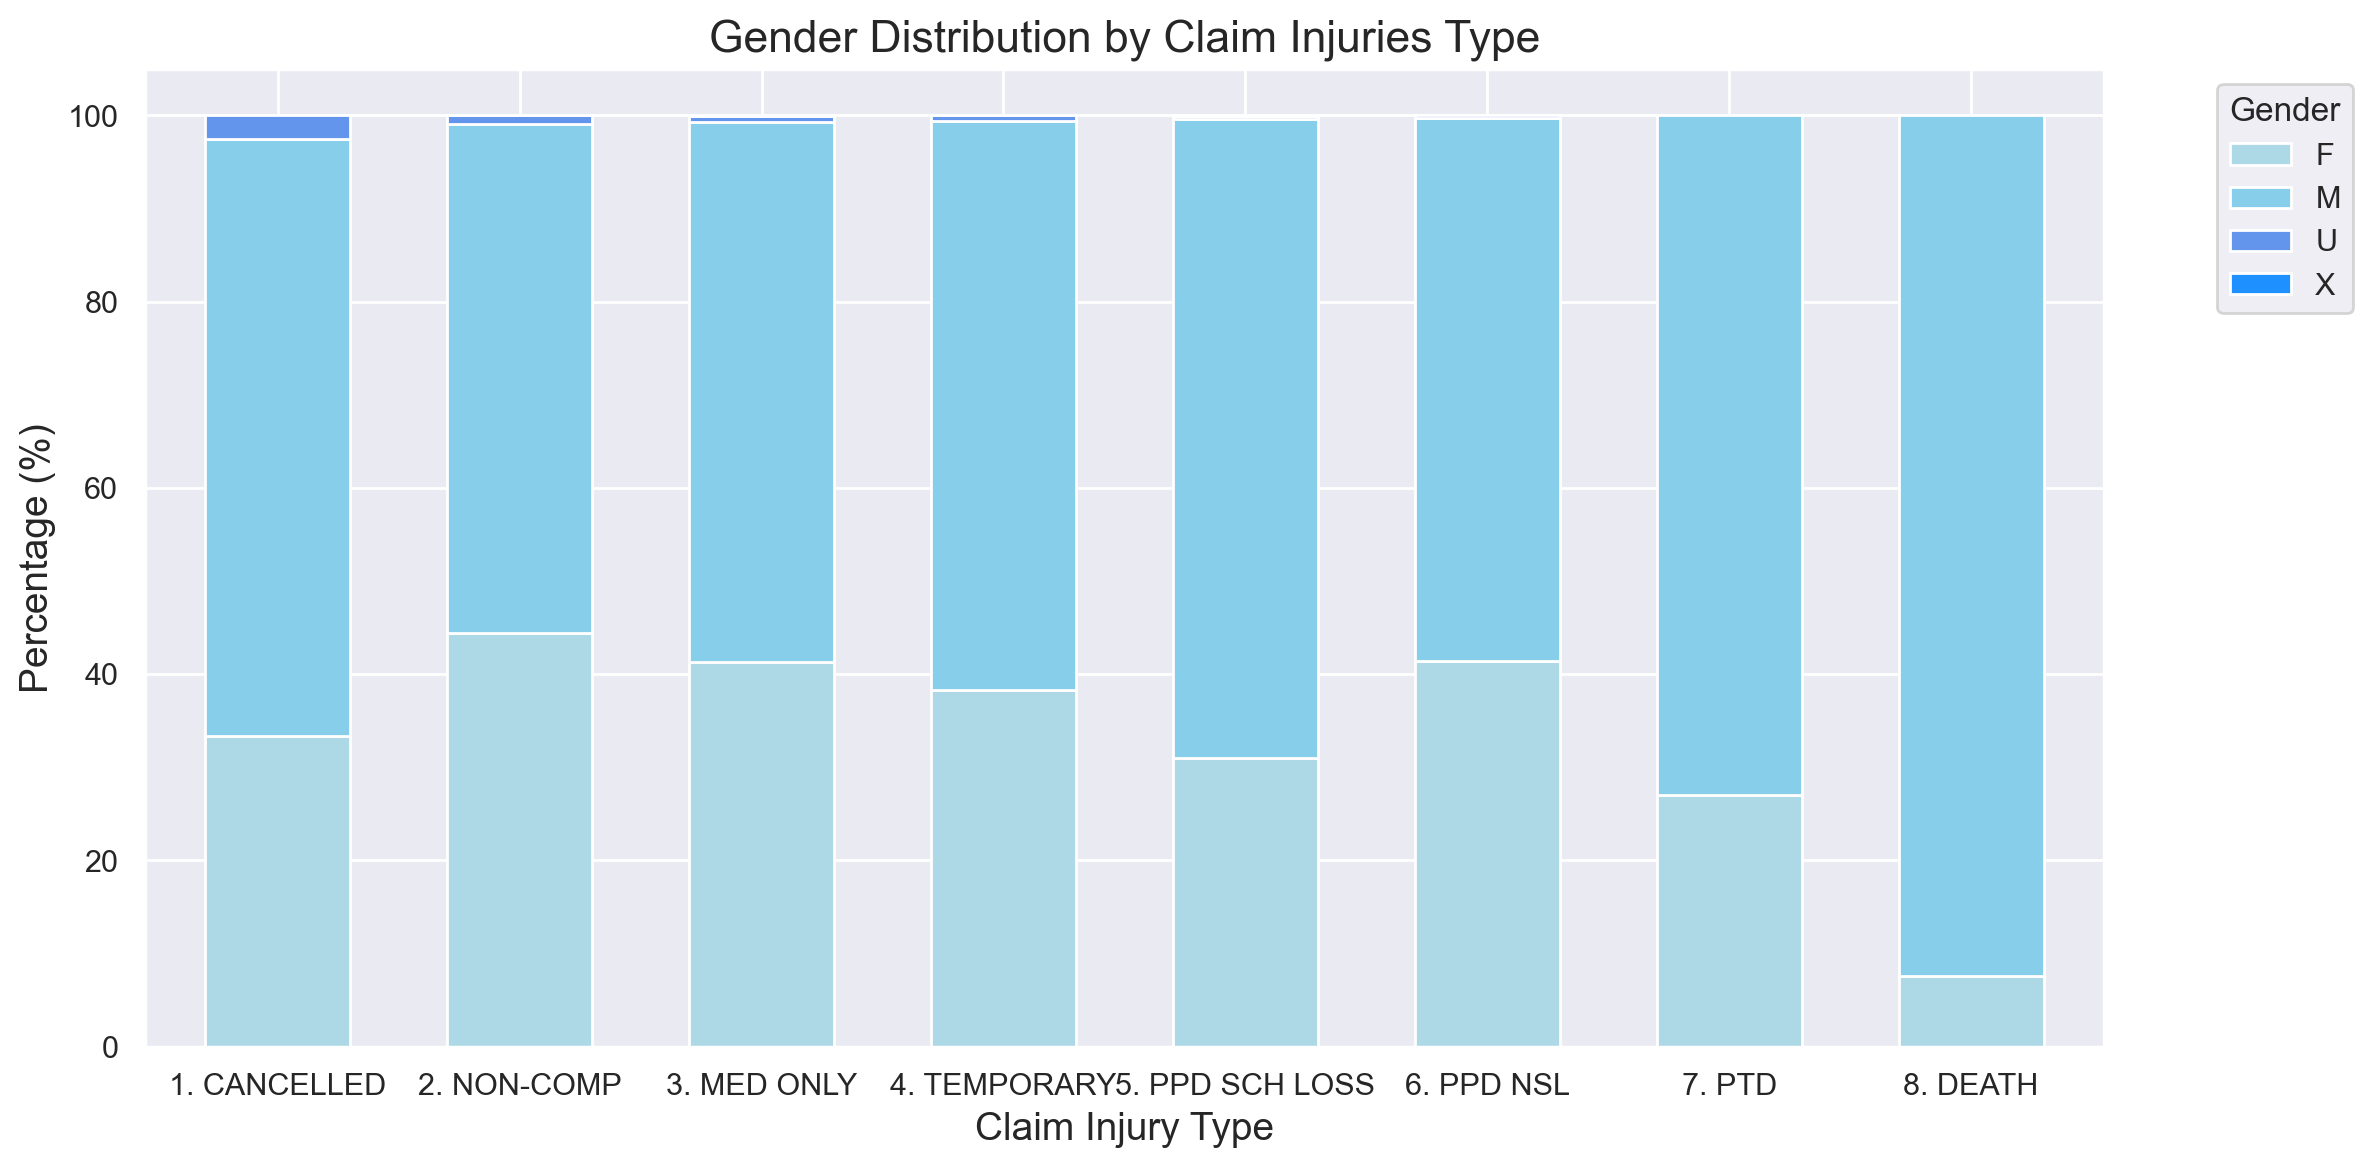

In [588]:
plt.figure(figsize=(14, 6))

injury_gender = pd.crosstab(
    injury_subset['Claim Injury Type'],
    injury_subset['Gender'],
    normalize='index'
) * 100

ax = injury_gender.plot(kind='bar', stacked=True, color=["#ADD8E6", "#87CEEB", "#6495ED", "#1E90FF", "#4169E1", "#00BFFF", "#4682B4", "#5F9EA0"], width=0.6, figsize=(12, 6))
plt.title('Gender Distribution by Claim Injuries Type', fontsize=16)
plt.xlabel('Claim Injury Type', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=0, ha='center')  
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left') 


plt.tight_layout()
plt.show()

**Interpretation**
* In agreement with the previous plot, most of the Claim Injuries Types occur in males
* 'U' has a small presence in the Injury Types, appearing only in the first four categories
* 'X' has no representation
* In '8. DEATH,' the distribution is imbalanced, with most of the cases being male (M)

## **Covid-19 Indicator vs Claim Injury Type**

<Figure size 1400x600 with 0 Axes>

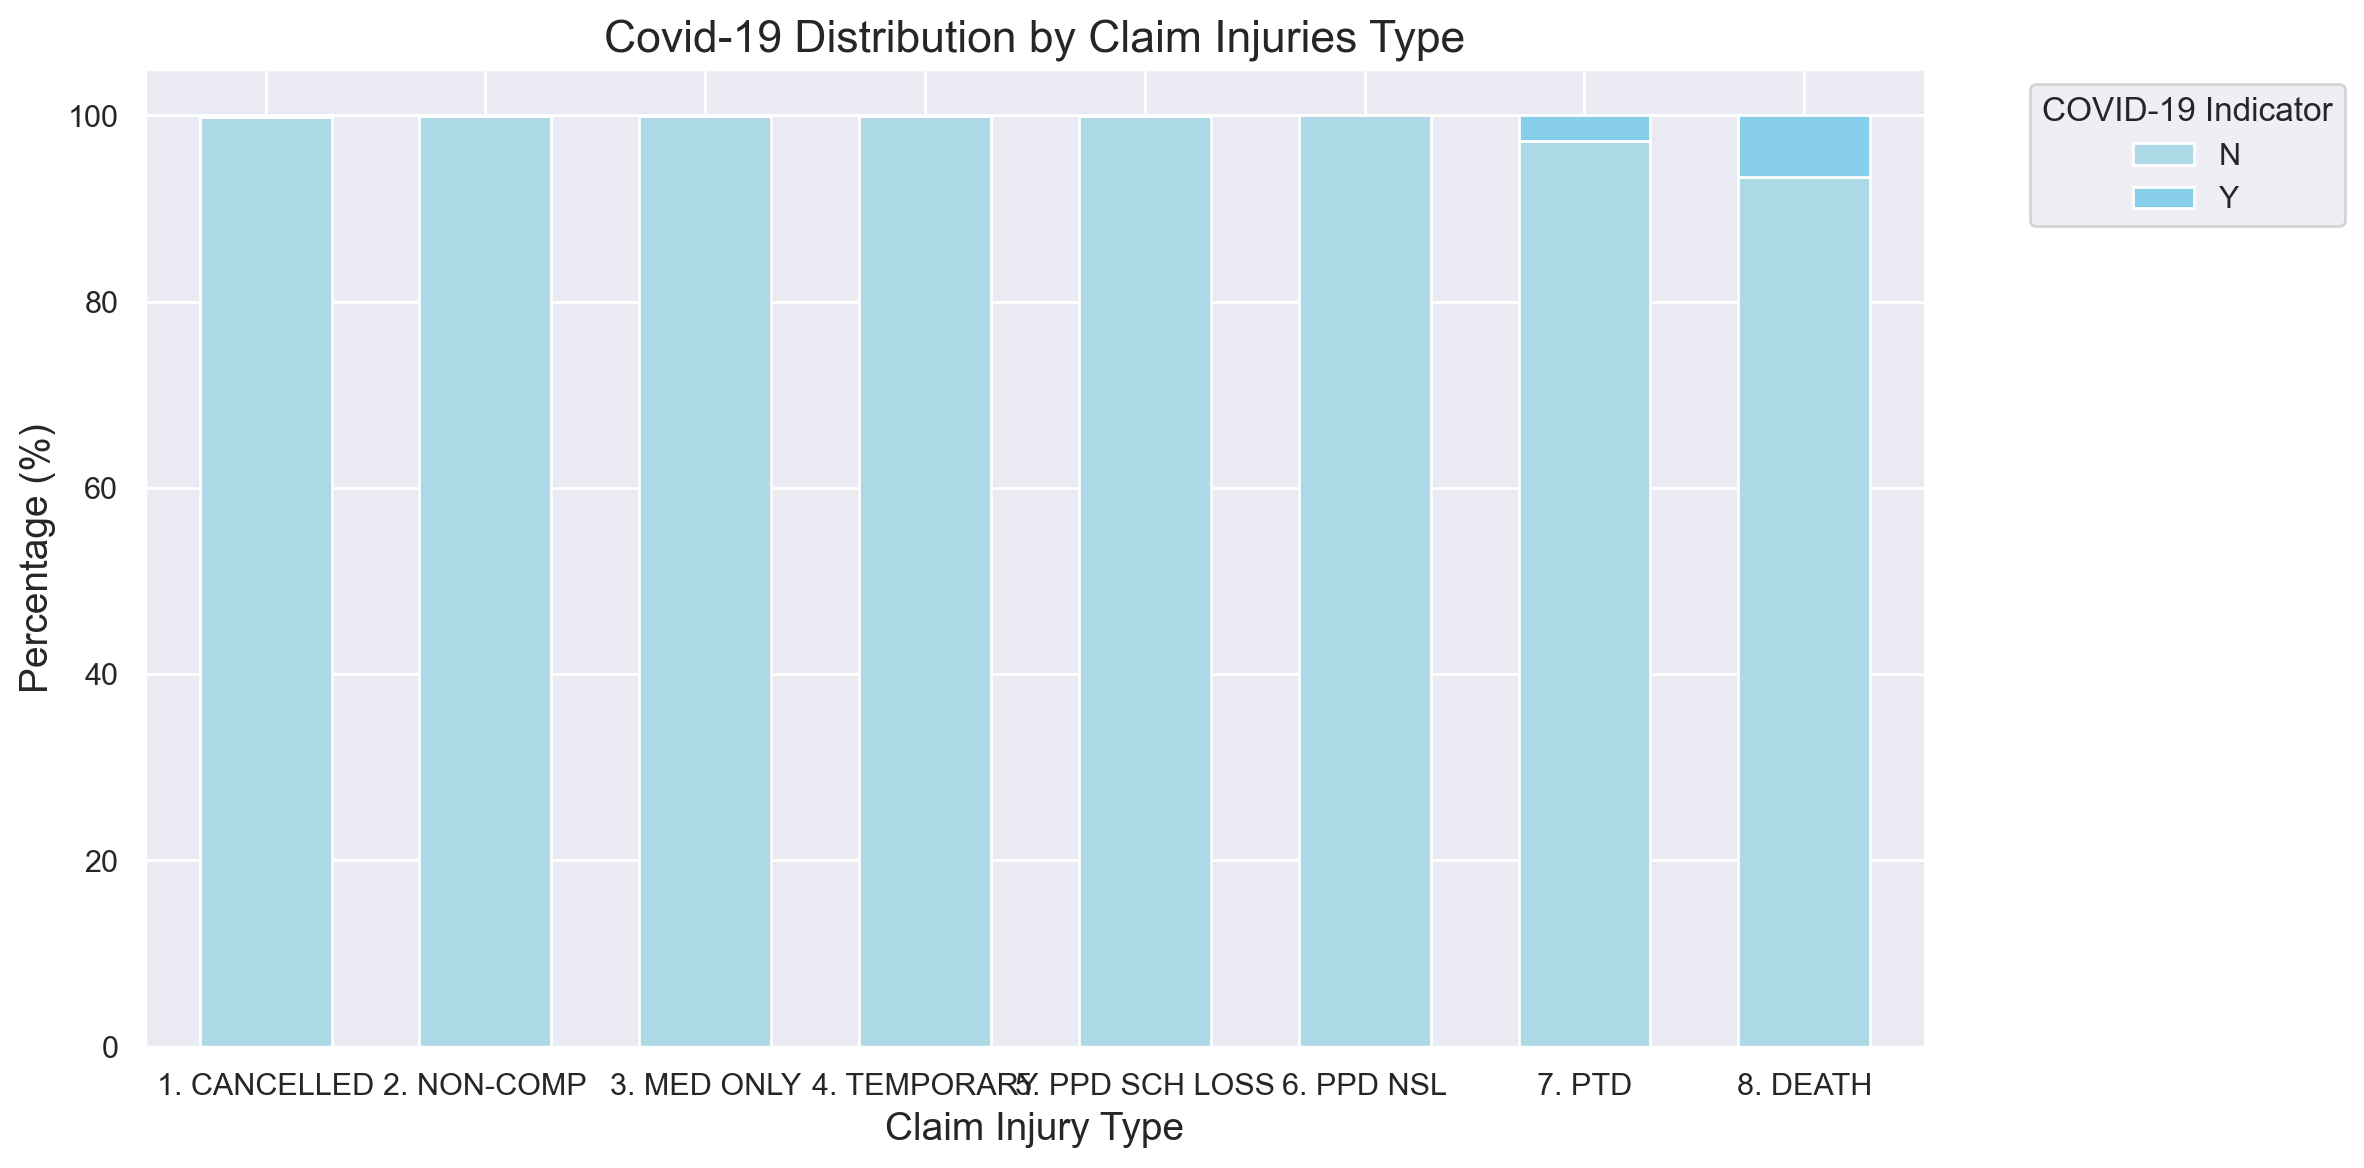

In [590]:
plt.figure(figsize=(14, 6))

injury_covid = pd.crosstab(
    injury_subset['Claim Injury Type'],
    injury_subset['COVID-19 Indicator'],
    normalize='index'
) * 100

ax = injury_covid.plot(kind='bar', stacked=True, color=["#ADD8E6", "#87CEEB", "#6495ED", "#1E90FF", "#4169E1", "#00BFFF", "#4682B4", "#5F9EA0"], width=0.6, figsize=(12, 6))
plt.title('Covid-19 Distribution by Claim Injuries Type', fontsize=16)
plt.xlabel('Claim Injury Type', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=0, ha='center')  
plt.legend(title='COVID-19 Indicator', bbox_to_anchor=(1.05, 1), loc='upper left') 

plt.tight_layout()
plt.show()

**Interpretation:**
* In most of the Injuries Types, the distribution is imbalanced: the majority of cases are not related to COVID-19
* Comparing all cases, the highest percentage of COVID-19 is in 8. DEATH. Could be correlated? We will analyse this later
* Only 7.PTD and 8.DEATH has cases of COVID-19

## **Industry Code Description vs Claim Injury Type**

<Figure size 1400x1000 with 0 Axes>

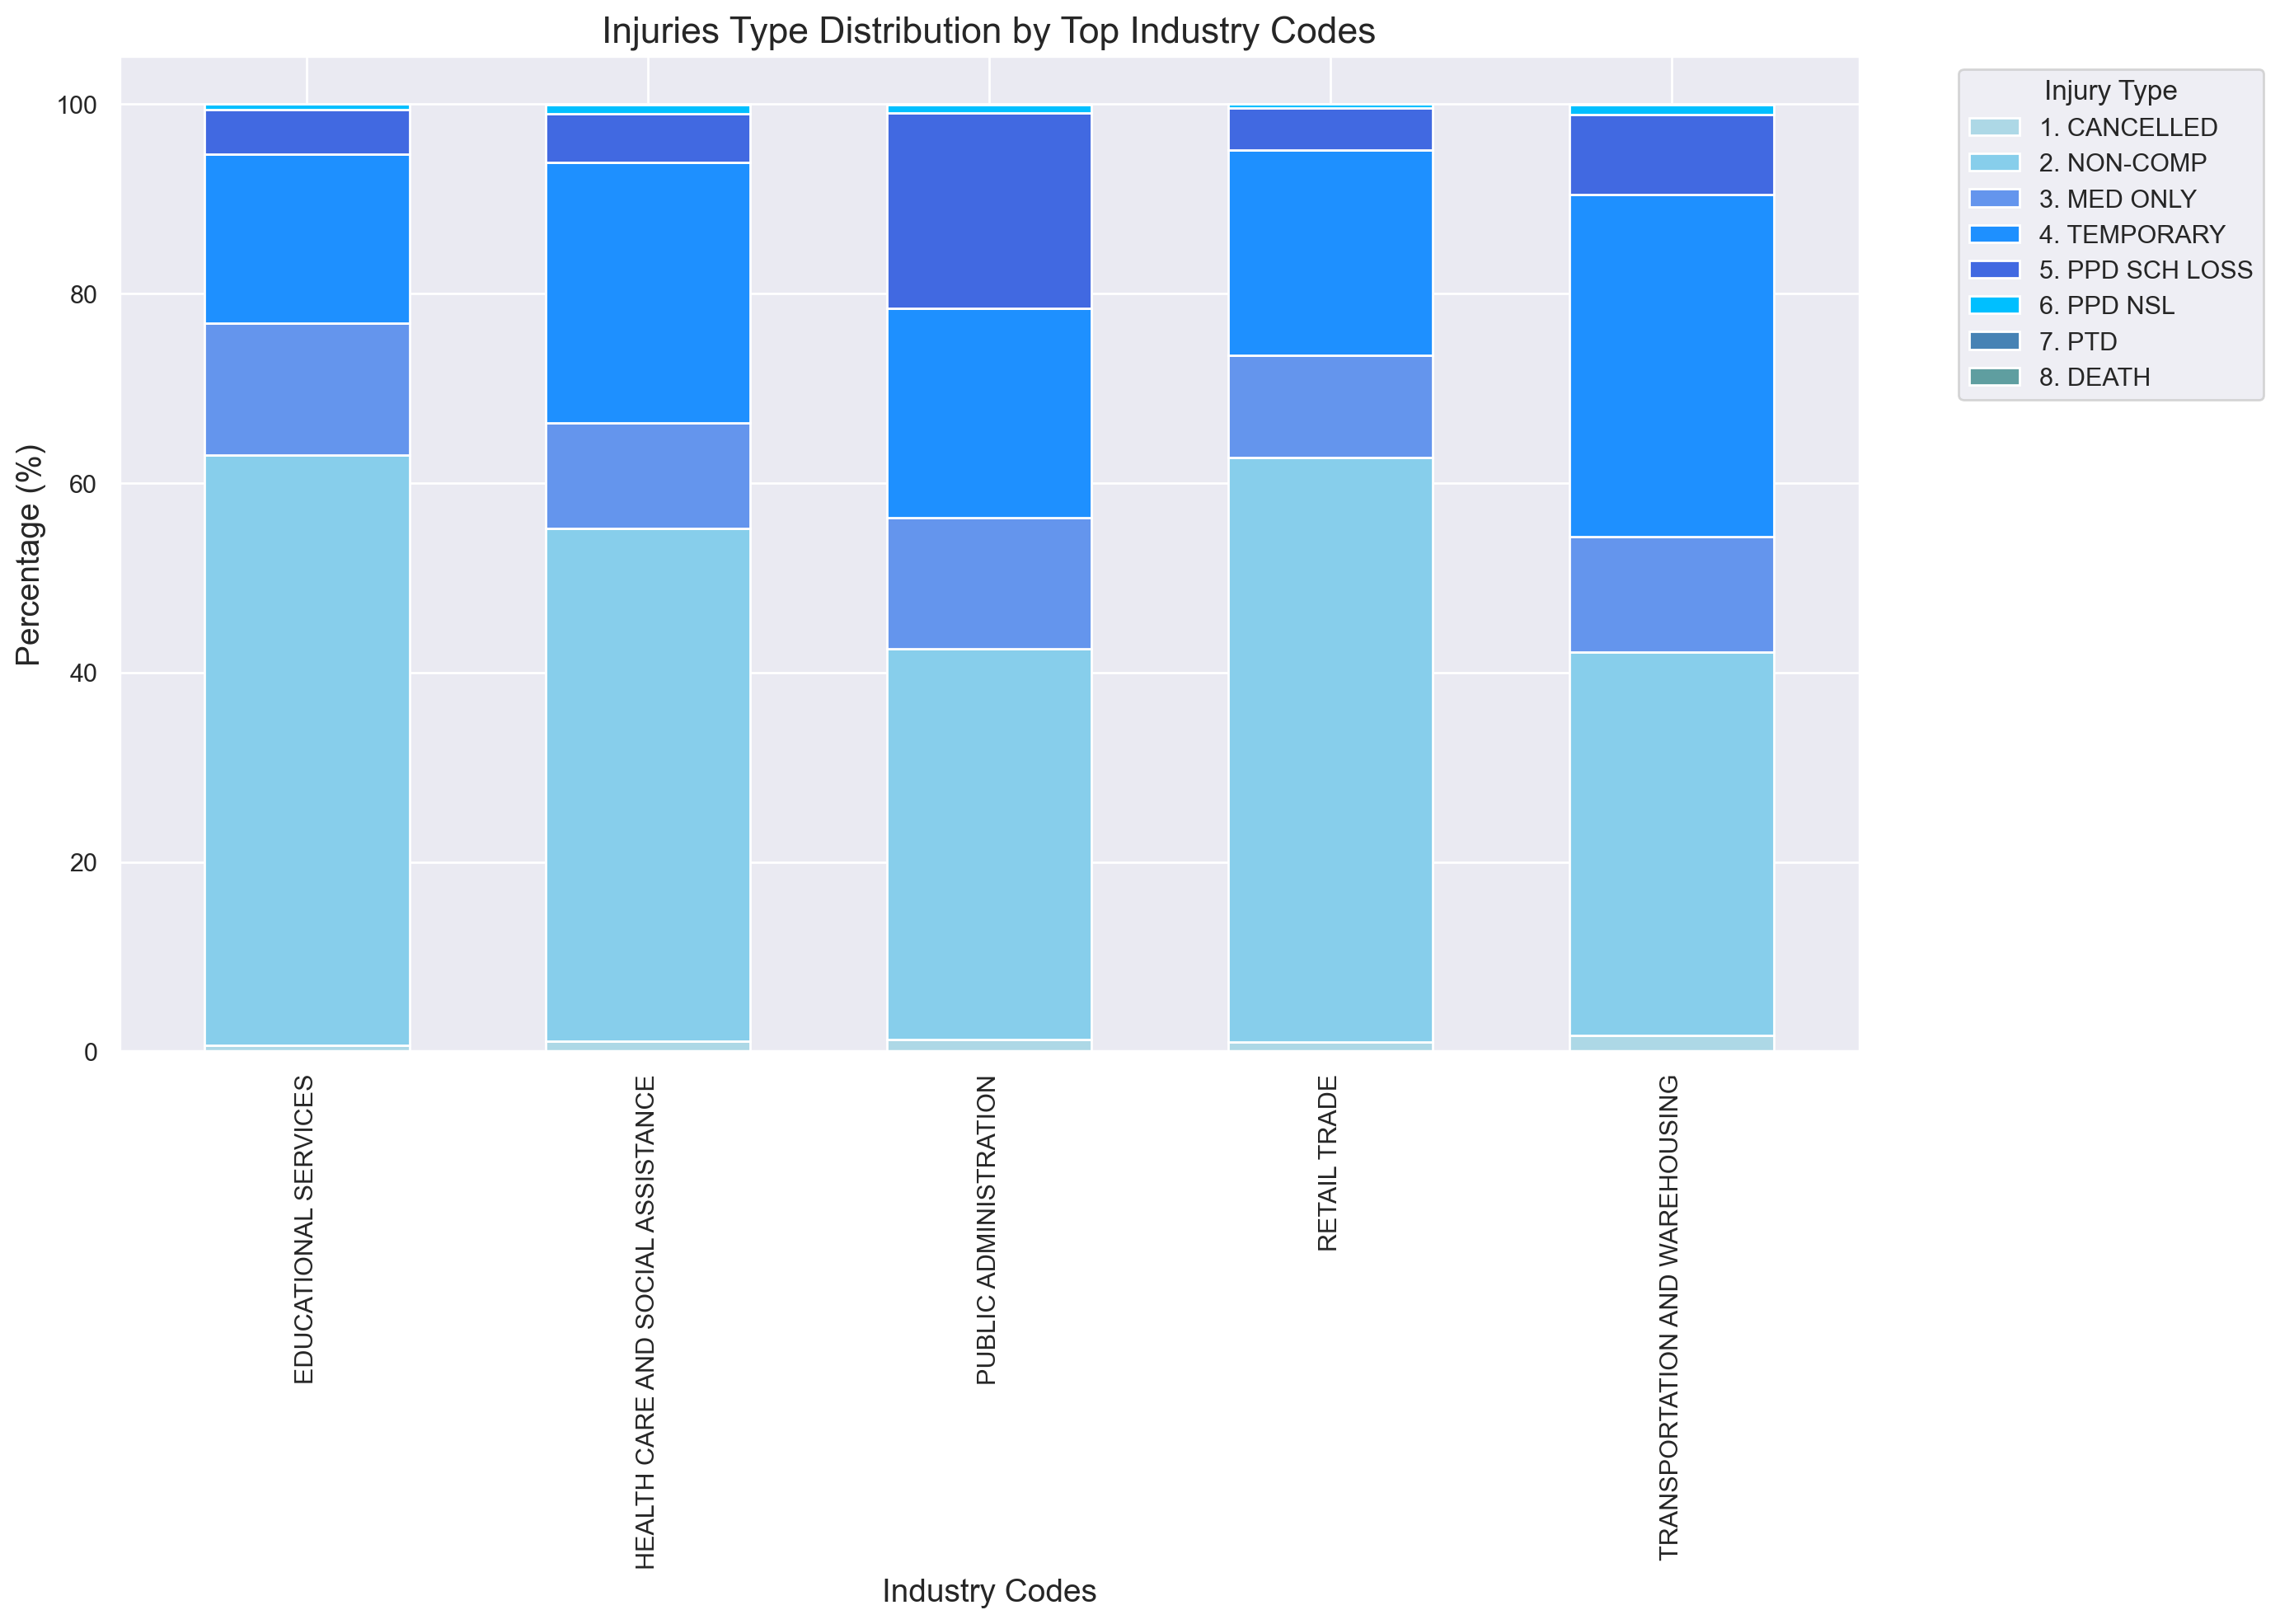

In [592]:
plt.figure(figsize=(14, 10))

top_injuries = df['Industry Code Description'].value_counts().head(5).index

injury_subset = df[
    df['Industry Code Description'].isin(top_injuries)
]

injury_gender = pd.crosstab(
    injury_subset['Industry Code Description'],
    injury_subset['Claim Injury Type'],
    normalize='index'
) * 100

ax = injury_gender.plot(kind='bar', stacked=True, color=["#ADD8E6", "#87CEEB", "#6495ED", "#1E90FF", "#4169E1", "#00BFFF", "#4682B4", "#5F9EA0"], width=0.6, figsize=(14, 10))
plt.title('Injuries Type Distribution by Top Industry Codes', fontsize=16)
plt.xlabel('Industry Codes', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=90, ha='center')
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left') 

plt.tight_layout()
plt.show()

**Interpretation:**
* In most of the Nature of Injuries, the most frequent Claim Type is 7.PTD
* 1. CANCELLED represents a small percentage in Injuries
* In TRANSPORTATION AND WAREHOUSING , 4. TEMPORARY has a significant presence
* 6. PPD NSL has a small percentage in all industry codes
* 3. MED ONLY has approximately the same proportion across all industry codes